# Data Science: Infering and Modeling


<hr/>

## Section 1

## Parameters and Estimates

We need to understand the connection between pools and the probability theory. Let's construct a scenario that we can work, and that is similar to the one that pollsters face.

We will use an urn instead of voters. And because pollsters are competing with other pollsters for media attention, we will imitate that by having our competition with a $25 price.

The challenge is to guess the spread between the proportion of *blue and red balls* in the urn.

<center><img src="images/urn.png" width=100 height=100/></center>

Before making  a prediction, we can take a sample, with replacement, from the urn. To mimic the fact that running pools is expensive, it will cost us $0.10 per bead you sample. So if we sample size is 250 and you win, we'll break even, as we'll have to pay me $25 to collect your $25.

Our entry into the competition can be an interval. If the interval we submit contains the true proportion, we get half what you paid and pass to second phase of the competition.

The second phase of the competition, the entry with the smallest interval is selected as the winner.

The ***dslabs*** package includes a function that shows a random draw from the urn. The code that we can write to see a sample is:

In [1]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library( tidyverse )
library( dslabs )

ds_theme_set()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



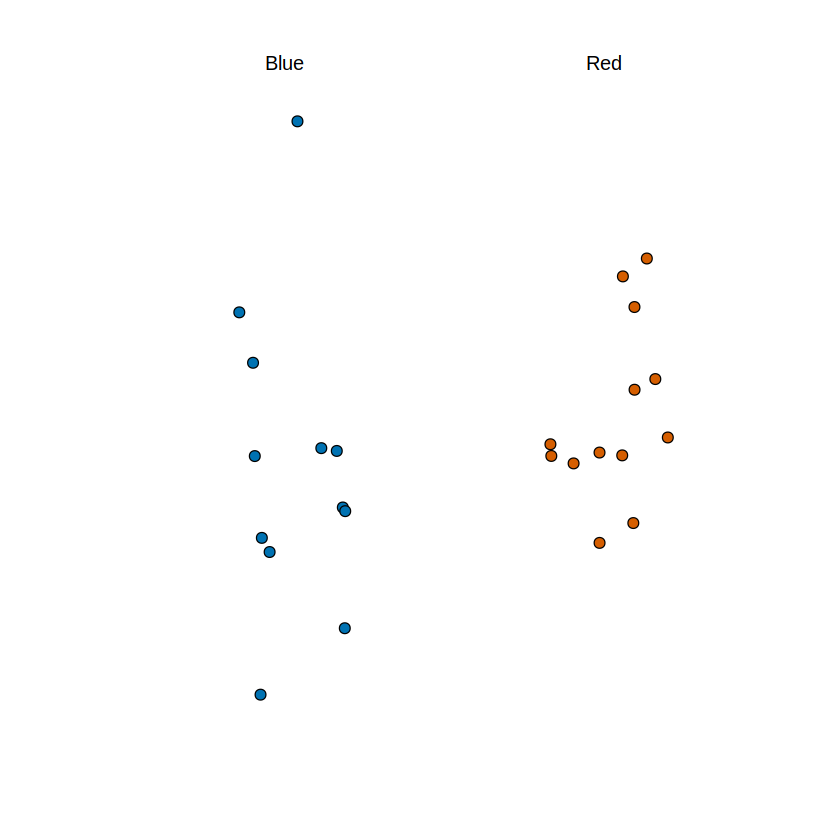

In [5]:
take_poll( 25 )

Now that we know the rules, think about how we would construct our interval. Notice that we have just described a *simple sampling model for opinion polls*. The beads inside urn represent the individuals that will vote on election day. Those that will vote **Republican** are represented with **read beans**, and **Democrats** with **blue beads**, we assume there are no other colors, that there are just two parties.

We want to predict the proportion of blue beads in the urn. Let's call this quantity \quantity, which in turn tell us the proportion of red beads, $1-p$, and the spread, $p - (1-p)$, which simplfies $2p - 1$.

Concepts:

* In statistical textbooks, the beads in the urn are called **the population**. 
* The proportion of blue beads in teh population, p, is called **parameter**. 
* The 25 beads that we saw in an earlier plot that's called a **sample**.
* The task of **statistical inference** is to *predict the parameter*, p, using the observed in the *sample*

Now we can do this with just the 25 observations we showed you?. For example, given that we see 14 red and 11 blue, it is unlikely that *p* is bigger than 0.9 or smaller than 0.1. The proportion red and blue. The proportion of reds and blues will be different every time we run the above code, the *take_poll* function.

But are we ready to predict with certainly that there are more red beads than blue?. Ok, what we want to do is contruct and *estimate of p* using only the information we observe. An *estimate* can be thought of as a *summary of the observed data that we think is informative about the parameter of interes*. In this case, the proportion of blue beads is $12/25 = 0.48$, but as the sample proportion is a *random variable*, if we run the *take_poll(25)* n-times, we will get different answers.

This set of results describing the **distribution of this random variable**,  we'' be able to gain insights into how good this estimate is and how we can make it better.


#### Key points

* the task of statistical inference is to estimate an unknown population parameter using observed data from a *sample*.
* In a sampling model, the collection of elements in the urn is called *population*.
* A *parameter* is a number that summarizes data for an entire population.
* A *sample* is observed data from a subset of the population.
* An *estimate* is a summary of the observed data about a parameter that we believe is informative.
* We want to predit the proportion of the blue beads in the urn, the parameter *p*. The proportion of red beans in the urn is $1 - p$ and the *spread* is $2p - 1$.
* The *sample proportion* is a **random variable**. Sampling gives random results drawn from the population distribution.

### The sample average

Once we have this estimate (previous example), we can easily report an estimate of the spread. But for simplicity, we will illustrate the concept of *statistical inference* for estimating *p*. 

We will use our knowledge of probability to defend our use of the *sample proportion*, and quanitfy how close we think it is from the population proportion *p*. We start by defining the randmo variable *X*, it's going to be 1 if we pick a blue bead at random, and 0 it's red. This implies that we're assuming that the population, the beads in the urn, are a list of 0s and 1s.

If we sample *N-beads*, then the *average* of the draws $X_1$ through $X_N$ is equivalent to the proportion of blue beads in our sample. The average is denoted by

$$\overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N}$$

In general, the statistics textbooks, a bar on top of a symbol means the **average**.

The theory we just learned about the sum of draws becomes useful, because we know the distribution of the sum *N-times X-bar*

$$N\overline{X} = \frac{N(X_1 + X_2 + \ldots + X_N)}{N} = (X_1 + X_2 + \ldots + X_N)$$



For simplicity, let's assume that the draws are independent. After we see each smaple bead, we return it to the urn, it's a sample with replacement. In this case, what do we know about the distribution of the sum of draws?

We know that the expecte value of the sum of draws is $N\overline{X}$ of the values in the urn. We know that the average of the 0s and 1s in the urn must be the proportion *p*, the value we want to estimate. Here we don't know what is in the urn, we know there are blue and red beads, but we don't know how many of each, this is what we're trying to find out.

Just like we use variable to define unknowns in systems of equations. In statistical inference, we define parameteres to define unknown parts of our models. In the urn model we are using to mimic an opinion poll, we do not know the proportion of blue beads in the urn, we define the parameter *p* to represent this quantity.

Note that the ideas presented here, on how we estimate parameters and provide insights into how good these estimates are, extrapolate to many data science tasks.

#### Key points

* Many common data science tasks can be framed as estimating a parameter from a sample.
* We illustrate statistical inference by walking through the process to estimate *p*. We can easily calculate an estimate of the spread, *2p - 1*.
* Consider ramdon variable *X* that is 1 if blue bead is chosen and 0 if a red bead is chosen. The proportion of blue beads in *N-draws* is the **average of the draws** $X_1, X_2, \ldots , X_N$.
* $\overline{X}$ is the *sample average*. In statistics, a bar on top of a symbol denotes the average. $\overline{X}$
  $$\overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N}$$
* The number of blue beads drawn in *N-draws*, $N\overline{X}$, is *N* times the proportion of values in the urn. However, we do not known the true proportion: we are trying to estimate this parameter *p*

### Polling versus forecasting  (*sondeo versus pronóstico*)

Let's make an important clarification related to the practical problem of forecasting the election (pronóstico de elección). If a poll is conducted 4 months before the elecction, it is estimation the *p* for that moment, not for election day. But, note that the *p* for election night might be different since people's opinions fluctuate through time.

The polls provided the night before the election tend to be the mos accurate since opinions don't change that much in a couple of days.

However, **forecasters** try to build tools that model how opinions vary across time and try to predict the election day result, takeing into consideration the fact that opinions fluctuate.

### Properties of our estimate


To understand how good our estimate is, we'll describe the *statistical properties of the random variable* we just defined, ***the sample proportion***.

Using what we have learned, the expected value of the sum *N times $\overline{X}$* is *N times the average of the urn, p*.

$$
\begin{array}{l}
    \overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N} \\
    \\
    N\overline{X} = \frac{N(X_1 + X_2 + \ldots + X_N)}{N} = X_1 + X_2 + \ldots + X_N \\
    \\
    E(N\overline{X}) = N \ast p \implies \frac{E(N\overline{X})}{N} = E(\overline{X}) = p
\end{array}
$$

So dividing by the *non-ramdom constant N* give us that the expected value of the average $\overline{X}$ is *p*.

We also can use what we know about ***standard error***. We know that the *standard error* of the sum is *square root of N times a standard deviation of the values of the urn*.

We learn a formula that tells us that it's:

$$ (1 - 0) \sqrt{p(1 - p)} $$

Because we are dividing by the *sum N*, we arrive at the following formula for the *standard error of the average*:

$$ SE(\overline{X}) = \sqrt{\frac{p(1 - p)}{N} } $$

This result reveals the power of polls. We can make the *standard error* as samll as we want by increasing the sample size *N*. The ***law of large numbers*** tells us that with a large enough poll, our estimate converges to *p*. If we take a large enough poll to make our standard error about 0.01, we'll be quite certain about who will win.



But, how large does the poll have to be for standard error to be this small?. One problem is that we do not know *p*, so we can't actually compute the standard error. Let's assume that *p = 0.51* and make a plot of the standard error versus *sample size N*, here is the graph:

<center><img src="images/standard_error.png" with="350" height="350" /></center>

We can see that it's dropping, we see that would need a poll of over 10,000 people to get the standard error as low as we want it to be. Polls if this size are very expensive and it is rare that they do, between other reasons.

For a *sample size of 1,000*, if we set *p = 0.51*, the standard error is about *0.15*, or *1.5%* points. So even with large polls for close elections, $\overline{X}$ can lead us astray if we don't realize it's a random variable.

#### Key points

* When interpreting values of $\overline{X}$, it is important to remember that $\overline{X}$ is random variable with an expected value and standard error that representes the sample proportion of positive events.
* The expected value of $\overline{X}$ is the parameter of *interest p*: $E(\overline{X}) = p$.
* As the number of draws *N* increases, the standard error of our estimate $\overline{X}$ decreases. The standard error (SE) of the average of $\overline{X}$ over *N* is $SE(\overline{X}) = \sqrt{p(1-p)/N}$
  * In theory, we can get more accurate estimates of *p* by increasing *N*. In practice, there are limits on the size of *N* due to costs.
  * We can also use other random variables equations to determine the expected value of the sum of draws *E(S)* and standard error of the sum of draws *SE(S)*:
    $$
    \begin{array}{l}
        E(S) = Np \\ 
        SE(S) = \sqrt{Np(1-p)}
    \end{array}
    $$

Exercise 1. Polling - expected value of S

We suppose you poll a population in which a proportion *p* of voters are Democrats and *1-p* are Republicans. You sample size is *N=25*. Consider the random variable *S*, which is the **total number of Democrats** in your sample. What is the expected value of this random variable *S*?.

<center>E(S) = Np = 25p</center>

Exercise 2. Polling - standard error of S

Again, consider the random variable *S*, which is the **total number of Democrats** in your sample of 25 voters. The variable *p* describes the proportion of Democrats, whereareas *1-p* describes the proportion of Republicans. What is the standard error of S?.

$$SE(S) = \sqrt{Np(1-p)} = \sqrt{25p(1-p)}$$


Exercise 3. Polling - expected value of $\overline{X}$.

Consider the random variable *S/N*, which is equivalent to the sample average that we have been denoting as $\overline{X}$. The variable *N* represents the size and *p* is the proportion of Democrats in the population. What is the expected value of $\overline{X}$?.
$$ E(\overline{X}) = p$$


Exercise 4. Polling - standard error of $\overline{X}$

What is the standar error of the sample average, $\overline{X}$?.

The variable *N* represents the sample size and *p* is the proportion of Democrats in the population.

$$  SE(\overline{X}) = \sqrt{p(1-p)/N} $$

Exercise 5. *SE* versus *p*

Write a line of code that calculate the standard error (*SE* or *se*) of a sample average when you poll 25 people in the population. Generate a sequence of 100 proportions of Democrats *p* that vary from 0 (no Democrats) to 1 (all Democrats).

Plot *se* versus *p* for the 100 different proportions.

Instructions:

* Use the *seq* function of R to generate a vector of 100 values of *p*, that range from 0 to 1.
* Use the *sqrt* function to generate a vector of standard errors for all values of *p*.
* Use the *plot* function to generate a plot with *p* on the x-axis and *se* on the y-axis.

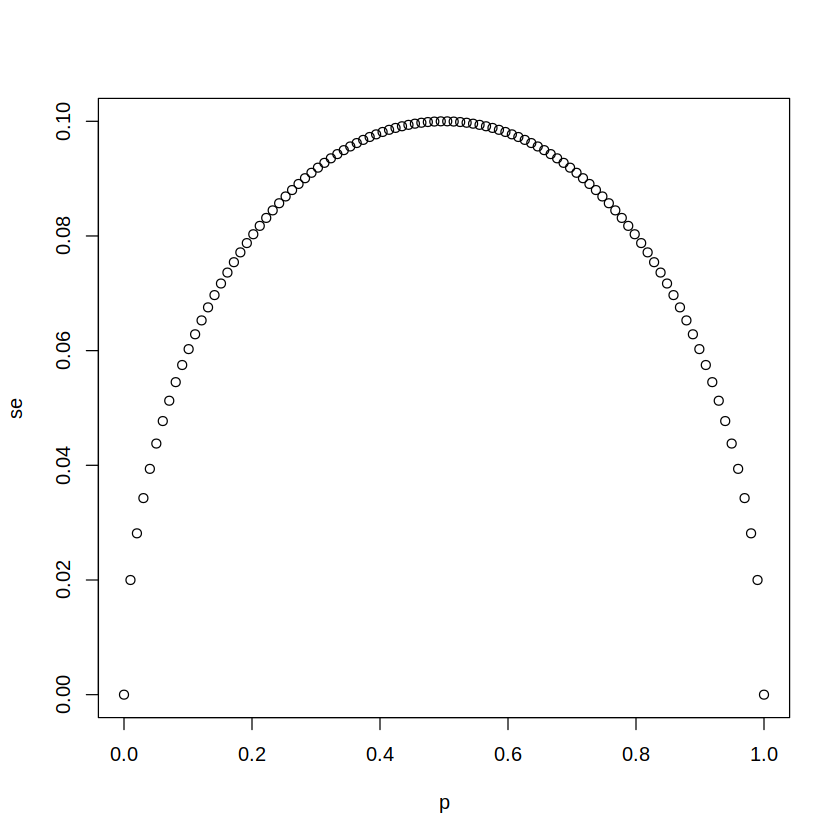

In [2]:
N <- 25                                             # number of people polled
p <- seq( from=0, to=1, length.out=100 )            # sequence of 100 proportions in range 0 to 1.
se <- sqrt(p*(1-p)/N)                                # create se for each sample average.

plot( p, se )

Exercise 6. Multiple plots of *se* versus *p*.

Using the same code as an the previous exercise, create a *for-loop* that generates three plots of *p* versus *se* when the sample sizes equal *N=25*, *N=100*, and *N=1000*.

Instruction:

* the *for-loop* should contain two lines of code to be repeated for three different values of *N*.
  * the first line within the *for-loop* should use the *sqrt* function to generate a vector of standard errors, *se*, for all values of *p*.
  * the second line within the *for-loop* should use the *plot* function to generate a plot with *p* on x-axis and *se* on the y-axis.
* Use the *ylim* argument to keep y-axis limits constant across all three plots. The lower limit should be equalt to 0, and the upper limit should equal 0.1.

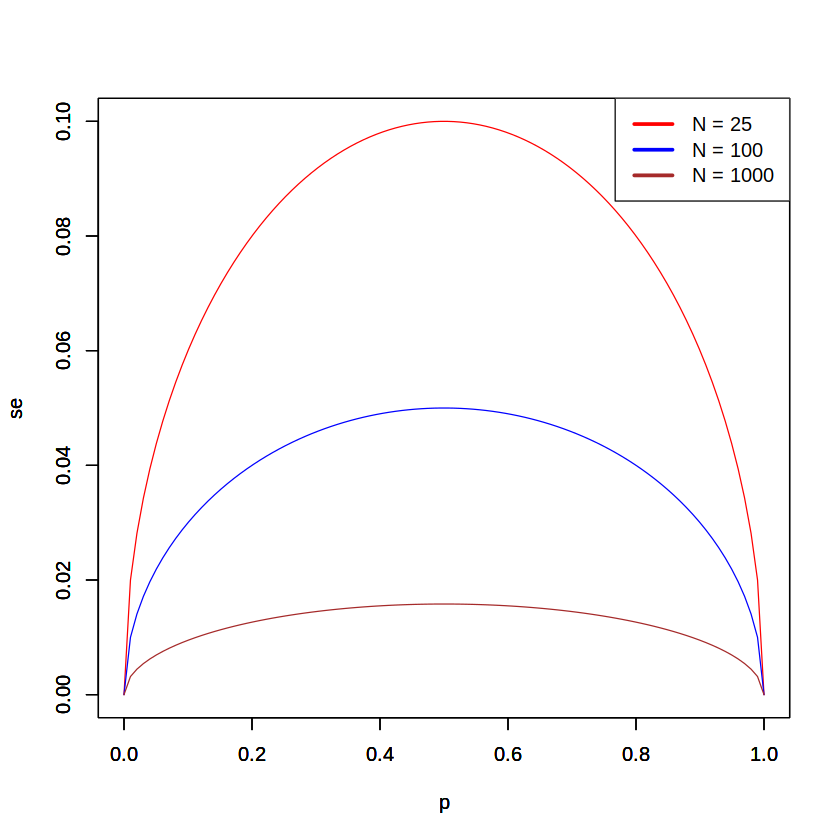

In [19]:
p<- seq( 0, 1, length=100 )
sample_sizes <- c( 25,100,1000 )                            # vector contains the three sample sizes.

nord <- 0
for ( x in sample_sizes ) {
    se <- sqrt( p*(1-p)/x ) 
    if (nord == 0) {
        color = 'red'
        nord <- nord + 1
    } 
    else if (nord == 1) {
        color = 'blue'
        nord <- nord + 1
        par( new=TRUE )
    } else {
        color = 'brown'
        nord <- nord + 1
        par( new=TRUE )
    }
    plot( p, se, type="l", col=color, ylim=c(0,0.1) )
}
legend("topright", legend=c("N = 25","N = 100","N = 1000"), lwd=3, col=c("red","blue","brown") )

Exercise 7. Expected value of *d*.

Our estimate for the difference in proportions of Democrats and Republicans is $d = \overline{X} - (1 - \overline{X})$. Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the expected value of *d*?

$$
\begin{array}{l}
    d = \overline{X} - (1 - \overline{X}) \equiv E[\overline{X} - (1 - \overline{X})] = 2E[\overline{X} - 1] = 2E[\overline{X}] - 1\\
    \\
    E(\overline{X}) = p \\
    \\
    2E[\overline{X}] - 1 = 2p - 1 = p - (1 - p) = d
\end{array}
$$

Exercise 8. Standard error of *d*.

Our estimate for the difference in proportions of Democrats and Republicans is $d = \overline{X} - (1 - \overline{X})$. Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the standard error of *d*?.


$$
\begin{array}{l}
    d \equiv SE[\overline{X} - (1 - \overline{X})] = 2SE[\overline{X}] - 1\\
    \\
    SE(\overline{X}) = \sqrt{p - (1-p)/N} \\
    \\
    2SE[\overline{X}] - 1 = 2\sqrt{p-(1-p)/N} - 1 = d
\end{array}
$$

But, substract 1 does not affect the standard error, the answer correct is $d=2\sqrt{p-(1-p)/N}$

Exercise 9. Standard error of the spread

Say the actual proportion of Democratic voters is *p=0.45*. In this case, the Republican party is winning by a relatively large margin of *d=-0.1*, or a *10\%* margin of victory. What is the standard eror of the spread $2\overline{X} - 1$ in this case?.

Instructions:

* use the *sqrt* function to calculate the standard error of the spread $2\overline{X} - 1$.

In [21]:
N <- 25                                 # number of people polled
p <- 0.45                               # proportion of Democratic voters

se <- 2*sqrt( (p*(1-p))/N )

print( se )

[1] 0.1989975


Exercise 10. Sample size.

So far we have said that the difference between the proportion of Democratic voters and Republican voters is about *10%* adn that the standard error of this spread is about *0.2* when *N=25*. Select the statement that explains why this sample size is sufficient or not.

1. This sample size is sufficient because the expected value of our estimate $2\overline{X} - 1$ is *d* so or prediction will be right on.
2. This sample size is too small because the standard error is larger than the spread.
3. This sample size is sufficient because standard error of about 0.2 is much smaller than the spread of 10%.
4. Without knowing *p*, we have no way of knowing that increasing or sample would actually improve our standard error.

Solution: answer 2.




<hr/>

## Section 2: The Central Limit Theorem (CLT) in Practice

The **Central Limit Theorem** tells us that the *distribution function for a sum of draws ($X_1+X_2+\ldots+X_N$) is approximately **normal***.

We also learned that *when dividing a normlly distributed random variable by a non-random constant, the resulting random variable is also normally distributed*.

$$
\begin{array}{l}
    X \sim N(\mu, \sigma) \\
    \\
    \frac{X}{a} \sim N\left(\frac{\mu}{a},\frac{\sigma}{a}\right)
\end{array}
$$

This implies that the *distribution of* $\overline{X}$ *is approximately **normal*** . In the previous section we determined that the *expected value is p* ($\overline{X}:p$), and the *standard error is the square root of p(1-p) divided by the sample size N*.

$$
\begin{array}{l}
    \overline{X} = p \\
    \\
    \overline{X} = \sqrt{\frac{p(1-p)}{N}}
\end{array}
$$

Now, how does this help us?.

Suppose we want to know what is the probability that we are within one percentage point from *p*?. Basically asking, what's teh probability that the distance between $\overline{X}$ and *p*, the absolute value of $\overline{X} - p$ is less than $0.01$:

$$Pr(|\overline{X} - p| \leq 0.01)$$

We can use what we've learned to see that this is the same as asking, what is the probability of $\overline{X}$ being less than or equal to *p* + *0.01 minus the probability of* $\overline{X}$ *being less than or equal to p - 0.01*.

<center><img src="images/sec02_01.png" width="50%" height="50%" /></center>

Can we compute that probability?. We can use the mathematical trick that we learned in the previous section. WE subtract the expected value and divide by the standard error on both sides of the equation.

$$
\begin{array}{l}
Pr\left(\frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \leq \frac{(p+0.01)-E(\overline{X})}{SE(\overline{X})}\right) - Pr\left( \frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \leq -\frac{(p-0.01)-E(\overline{X})}{SE(\overline{X})} \right) \\
\\
\mathit{Z} = \frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \\
\\
Pr\left(\mathit{Z} \leq \frac{(p+0.01)-E(\overline{X})}{SE(\overline{X})}\right) - Pr\left( \mathit{Z} \leq -\frac{(p-0.01)-E(\overline{X})}{SE(\overline{X})} \right) \\
\\
\\
p = E(\overline{X}) \\
\\
SE(\overline{X}) = \sqrt{\frac{p(1-p)}{N}}\\
\\
Pr\left(\mathit{Z} \leq \frac{0.01}{\sqrt{\frac{p(1-p)}{N}}}\right) - Pr\left( \mathit{Z} \leq -\frac{0.01}{\sqrt{\frac{p(1-p)}{N}}} \right) \\
\end{array}
$$


Ok, now can we compute this probability?. No yet. Our problem is that we don't know *p*. So we can't actually compute the standard error of $\overline{X}$ using just the data. The CLT still works if we use an estimate of the standard error that, instead of *p*, uses $\overline{X}$ in its place, we call this a plug-in estimate (estimación complementaria). Our estimate of the standard error is therefore:

$$
\widehat{SE} = \sqrt{\frac{\overline{X}(1-\overline{X})}{N}}
$$

We can see a *hat on top of SE*, in statistics textbooks, we use a little hat like this to denote **estimates**. This is an estimate of the standard error, not the actual standard error.

Note that, importantly, that this estimate can actually be constructed using the observed data.

Now, let's continue our calculations. But now instead of dividing by the standard error, we're going to divide by this *estimate of the standard error*. Let's compute this estimate of the standard error for the first example that we took, in which we had:

* 12 blue beads
* 13 red beads
* The $\overline{X} = 12/25 = 0.48$.

So to compute the standard error (SE), we simply write this code

In [8]:
X_hat <- 0.48 
se <- sqrt( X_hat * (1 - X_hat) / 25 )
se

[1] 0.09991997

And we get that it's $0.0999199\ldots \approx 0.1$. So now, we can answer the question. We can compute the probability of being as close to *p* as we wanted. We wanted to be 1 percentaje point away. The answer is simply:

In [10]:
pnorm( 0.01/se ) - pnorm( -0.01/se)

[1] 0.07971926

The answer is that the probability of this happening is about 8\%. So there is a **very small chance** that we'll be as close as this to the actual proportion.

It wasn't very useful, but what it's going to do, what we're going to be able to do with the CLT is determine what sample sizes are better. We'll be able to provide a very good estimate and some very informative probabilities.



### Margin of error


So a poll of only 25 people is not really very useful, at least for a close election. Earlier we mentioned the ***margin of error***, which we can now estimate. We can define it because it is simply $2\ast SE$. In our cas it was 2 times *SE*, which is about *0.2*.

In [11]:
2*se

[1] 0.1998399

Why do we multiply by 2?. This is because if you ask what is the probability that we're within 2 stanard errors from *p*, using the same previous equations, we en up with an equation like this one.

$$Pr( |\overline{X}) - p| \leq 2SE(\overline{X}) )$$

$$Pr( \overline{X} \leq p + 2SE(\overline{X}) ) - Pr( \overline{X} \leq - 2SE(\overline{X}) ) $$

This one simplifies out, and we're simply asking what is the probabilitiy of the standar normal distribution that has the expected value 0 and standard error one is within two values from 0, and we know that this is about 95\%.

$$
\begin{array}{l}
Pr( \overline{X} \leq p + 2SE(\overline{X}) ) - Pr( \overline{X} \leq - 2SE(\overline{X}) ) \\
\\
Pr( \mathit{Z} \leq 2SE(\overline{X}/SE(\overline{X})) ) - Pr( \mathit{Z} \leq - 2SE(\overline{X}/SE(\overline{X}))\\
\\
Pr( \mathit{Z} \leq 2 ) - Pr( \mathit{Z} \leq -2 ) 
\end{array}
$$


In [12]:
pnorm(2) - pnorm(-2)

[1] 0.9544997

So there's a $95\%$ chance that $\overline{X}$ will be within 2 standard errors. That's the *margin of error*, in our case, to *p*.

Now why do we use 95\%?, It's somewhat arbitrary, traditionally, that's been used.

In summary, the *Central Limit Theorem* tells us that *our poll based on a sample of just 25 is not very useful*. We don't really learn much when the margin of error is this large. All we can really say is that the popular vote wil not be won by a large margin. This is why pollsters tend to use larger sample sizes.


From the table that we see down, from *RealClearPolitics*, we see that a typical sample size was between 700 and 3,500.

<center><img src="images/general_election.png" width="75%" height="75%" /></center>

To see how this gives us a much more practical result, note that if we had obtained an $\overline{X}$ of $0.48$, but with a sample size of $2,000$, the estimated standard error would have been about $0.01$. So our result is an estimate of $48\%$ blue beads with a margin of error of $2\%$. In this case, the result is much more informative and would make us think that there are more red beads than the blue beads.



### Monte Carlo Simulation for the *CTL*



To create a simulation, we would need to write code like this

In [4]:
B <- 10000 
N <- 1000

X_hat <- replicate( B, {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p, p))
    mean(X)
})

The problem is that we can't run the code we just showed you because we don't know what *p* is. However, we could construct an urn like the one we showed in a previous section and actually run an analog simultaion. It would take a long time because you would be picking beads and counting them, but we could take *10,000* samples, count the beads each time, and keep track of the proportions that you see.

We can use the function *take_poll* with *N=1,000*, but it would still take time because we would to count the beads and enter the results into *R*.

One thing we can do is to pick a value of *p* or several values of *p* and then run a simulations using those. An example, let's set *p = 0.45*, we can simulate one poll of *1,000* beads or people using this simple code:


In [5]:
p <- 0.45 
N <- 1000
X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
X_hat <- mean(X)
X_hat

[1] 0.457

Now we can take that into a *Monte Carlos Simulation*. Do it *10,000* times, each time returning the proportion of blue beads that we get in our sample.

In [10]:
B <- 10000

X_hat <- replicate( B, {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
    mean( X )
})
X_hat

[1] 0.439 0.436 0.469 0.470 0.453 0.460 0.478 0.454 0.486 0.460 0.440 0.481
   [13] 0.456 0.452 0.443 0.439 0.438 0.472 0.444 0.456 0.437 0.478 0.465 0.459
   [25] 0.437 0.454 0.434 0.462 0.435 0.440 0.481 0.440 0.441 0.449 0.452 0.428
   [37] 0.456 0.444 0.451 0.470 0.437 0.462 0.441 0.454 0.463 0.456 0.475 0.428
   [49] 0.468 0.461 0.453 0.430 0.426 0.437 0.447 0.439 0.449 0.437 0.437 0.450
   [61] 0.454 0.455 0.450 0.406 0.455 0.455 0.460 0.452 0.441 0.437 0.458 0.456
   [73] 0.460 0.441 0.438 0.476 0.473 0.482 0.431 0.432 0.454 0.461 0.473 0.439
   [85] 0.439 0.435 0.478 0.436 0.457 0.480 0.448 0.459 0.446 0.439 0.442 0.454
   [97] 0.459 0.464 0.464 0.451 0.454 0.458 0.428 0.484 0.451 0.434 0.462 0.453
  [109] 0.411 0.452 0.457 0.463 0.437 0.451 0.434 0.467 0.446 0.463 0.426 0.446
  [121] 0.459 0.451 0.461 0.441 0.468 0.455 0.425 0.443 0.422 0.435 0.458 0.451
  [133] 0.428 0.471 0.433 0.440 0.464 0.460 0.468 0.463 0.458 0.421 0.461 0.433
  [145] 0.466 0.451 0.477 0.452 0.459 0.482 0.465 0.452 0.463 0.473 0.413 0.447
  [157] 0.478 0.446 0.460 0.450 0.450 0.450 0.461 0.464 0.416 0.470 0.472 0.454
  [169] 0.439 0.432 0.461 0.471 0.446 0.448 0.472 0.477 0.445 0.443 0.446 0.441
  [181] 0.449 0.465 0.474 0.450 0.428 0.440 0.434 0.470 0.453 0.459 0.453 0.447
  [193] 0.448 0.457 0.435 0.474 0.464 0.434 0.458 0.447 0.455 0.444 0.445 0.457
  [205] 0.457 0.431 0.463 0.447 0.461 0.467 0.449 0.453 0.454 0.450 0.434 0.431
  [217] 0.477 0.456 0.459 0.464 0.469 0.436 0.468 0.467 0.471 0.449 0.445 0.475
  [229] 0.443 0.440 0.441 0.436 0.452 0.427 0.441 0.456 0.461 0.462 0.421 0.428
  [241] 0.453 0.438 0.455 0.462 0.433 0.442 0.448 0.464 0.482 0.468 0.449 0.451
  [253] 0.467 0.413 0.457 0.454 0.451 0.444 0.452 0.451 0.454 0.426 0.493 0.447
  [265] 0.446 0.447 0.450 0.443 0.463 0.450 0.462 0.461 0.450 0.447 0.437 0.426
  [277] 0.448 0.444 0.456 0.424 0.450 0.449 0.445 0.433 0.465 0.443 0.456 0.458
  [289] 0.461 0.437 0.455 0.444 0.463 0.449 0.442 0.476 0.471 0.458 0.444 0.464
  [301] 0.464 0.446 0.440 0.444 0.446 0.463 0.473 0.458 0.455 0.434 0.431 0.451
  [313] 0.451 0.454 0.454 0.449 0.416 0.440 0.444 0.465 0.472 0.459 0.463 0.439
  [325] 0.432 0.447 0.432 0.438 0.452 0.451 0.456 0.443 0.439 0.457 0.457 0.470
  [337] 0.469 0.463 0.442 0.461 0.447 0.431 0.409 0.424 0.440 0.449 0.442 0.465
  [349] 0.468 0.458 0.439 0.464 0.438 0.449 0.446 0.482 0.444 0.429 0.454 0.460
  [361] 0.467 0.450 0.445 0.446 0.448 0.475 0.428 0.448 0.446 0.455 0.476 0.460
  [373] 0.445 0.429 0.451 0.431 0.442 0.433 0.454 0.460 0.474 0.441 0.437 0.451
  [385] 0.434 0.422 0.454 0.484 0.468 0.473 0.438 0.460 0.420 0.464 0.463 0.470
  [397] 0.437 0.441 0.435 0.454 0.459 0.451 0.469 0.461 0.459 0.438 0.426 0.458
  [409] 0.460 0.456 0.446 0.424 0.443 0.436 0.432 0.428 0.460 0.413 0.459 0.457
  [421] 0.447 0.448 0.445 0.475 0.445 0.459 0.455 0.468 0.434 0.462 0.453 0.446
  [433] 0.443 0.430 0.440 0.449 0.448 0.448 0.432 0.432 0.455 0.453 0.434 0.470
  [445] 0.425 0.461 0.456 0.476 0.463 0.451 0.461 0.448 0.443 0.431 0.480 0.434
  [457] 0.456 0.440 0.417 0.458 0.458 0.469 0.451 0.457 0.450 0.444 0.441 0.460
  [469] 0.451 0.434 0.439 0.453 0.453 0.429 0.437 0.442 0.452 0.443 0.441 0.430
  [481] 0.431 0.465 0.477 0.408 0.475 0.475 0.463 0.450 0.431 0.445 0.467 0.450
  [493] 0.448 0.455 0.420 0.448 0.446 0.433 0.477 0.473 0.444 0.467 0.460 0.447
  [505] 0.453 0.450 0.476 0.456 0.442 0.440 0.446 0.444 0.459 0.476 0.439 0.435
  [517] 0.482 0.460 0.458 0.442 0.448 0.467 0.465 0.443 0.483 0.457 0.427 0.467
  [529] 0.453 0.474 0.462 0.467 0.450 0.462 0.465 0.451 0.430 0.442 0.445 0.438
  [541] 0.443 0.444 0.461 0.462 0.465 0.444 0.444 0.465 0.442 0.466 0.451 0.449
  [553] 0.442 0.420 0.478 0.461 0.456 0.464 0.450 0.453 0.458 0.419 0.457 0.450
  [565] 0.428 0.459 0.457 0.448 0.446 0.467 0.427 0.462 0.479 0.457 0.450 0.441
  [577] 0.469 0.476 0.498 0.450 0.472 0.463 0.453 0.447 0.463 0.447 0.453 0.475
  [589] 0.468 0.442 0.465 0.431 0.433 0.445 0.422 0.441 0.449 0.471 0.416 0.463
  [6

The theory telss us that $\overline{X}$ has an approximately normal distribution with expected value *0.45* and a standard error of about *1.5\%*. The simulation confirms this.

If we take the mean of $\widehat{X}$ that we created, we indeed get a value about *0.45*.

In [19]:
mean( X_hat )       # mean X_hat
sd( X_hat )         # standard error or deviation X_hat


[1] 0.4499795

[1] 0.01579089

A *histogram* and a *qq plot* of this $\widehat{X}$ data confirms that the normal approximation is accurate as well.

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



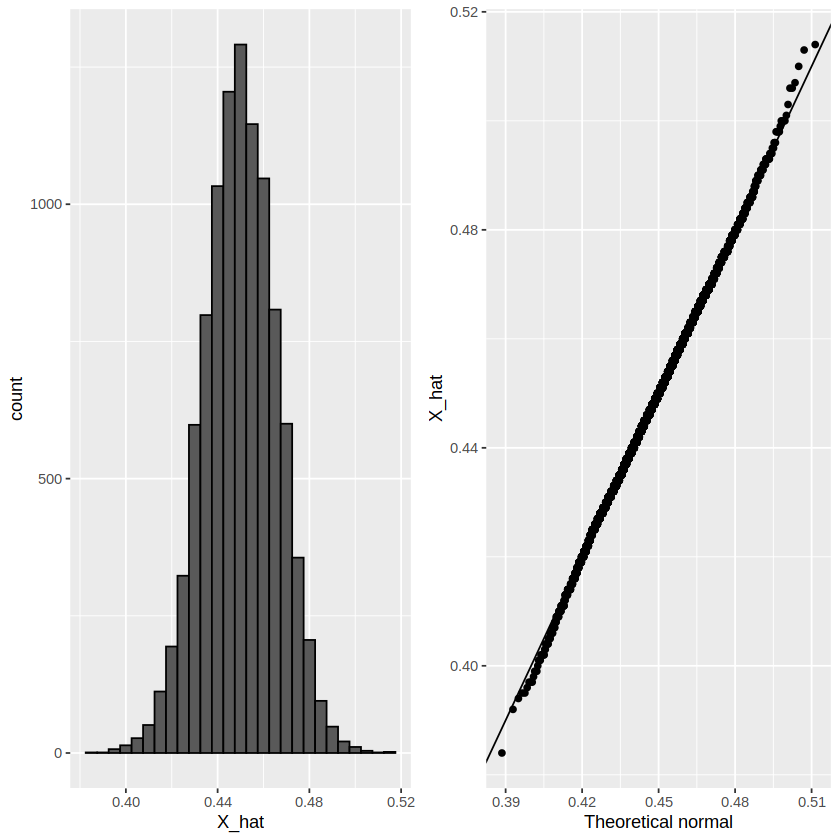

In [24]:
install.packages( "gridExtra" )
library( gridExtra )
library( dplyr )
library( ggplot2 )

p1 <- data.frame( X_hat=X_hat ) %>% ggplot( aes( X_hat ) )  +
    geom_histogram( binwidth=0.005, color="black" )

p2 <- data.frame( X_hat=X_hat ) %>% ggplot( aes( sample=X_hat) ) +
    stat_qq( dparams = list( mean=mean(X_hat), sd=sd(X_hat) ) ) +
    geom_abline() +
    ylab( "X_hat" ) +
    xlab( "Theoretical normal" )

grid.arrange( p1, p2, nrow=1 )

Note that in real life, we would never be able to run such an experiment because we don't know *p*. But we could run it for varios values of *p* and sample sizes *N* and see that the theory does indeed work well for most variables.



### The Spread



The competition is *to predict the spread*, not the *proportion p*. However, because we are assuming there are only two parties, we know that *the spread* is just:

$$p - (1 - p) = 2p - 1$$

So everything we have done can easily be adapted to estimate to *p - 1*. Once we have our estimate, $\overline{X}$, and our estimate of our standard error of $\overline{X}$, we estimate the spread by $2\overline{X} - 1$, just plugging in the $\overline{X}$ where we should have a *p*. And, since we're multiplying a random variable by 2, we know that the standard error goes up by 2, ($2\hat{SE}(\overline{X})$).

Note that substracting the 1 does not add any variability, so it does not affect the standard error.

For our first example, with just the 25 beads, our estimate *p* was *0.48* with a margin of error of *0.2*. This means that our estimate of the spread is *4\%* points, *0.04*, with a margin of error of *40\%*, *0.4*.

Again, not a very useful sample size. But the point is *that once we have an estimate and standard error for p, we have it for the **spread = 2p - 1***.



### Bias: Why not run a very large poll?



Note that for realistic values of *p*, between *0.35* and *0.65* for the popular vote, if we run a very large poll, with say $100,000$ people, theory would tell us that we would predict the election almost frecuently, since the largest possible margin fo error is about *0.3\%*.

Here are the calculations that were used to determin that:

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



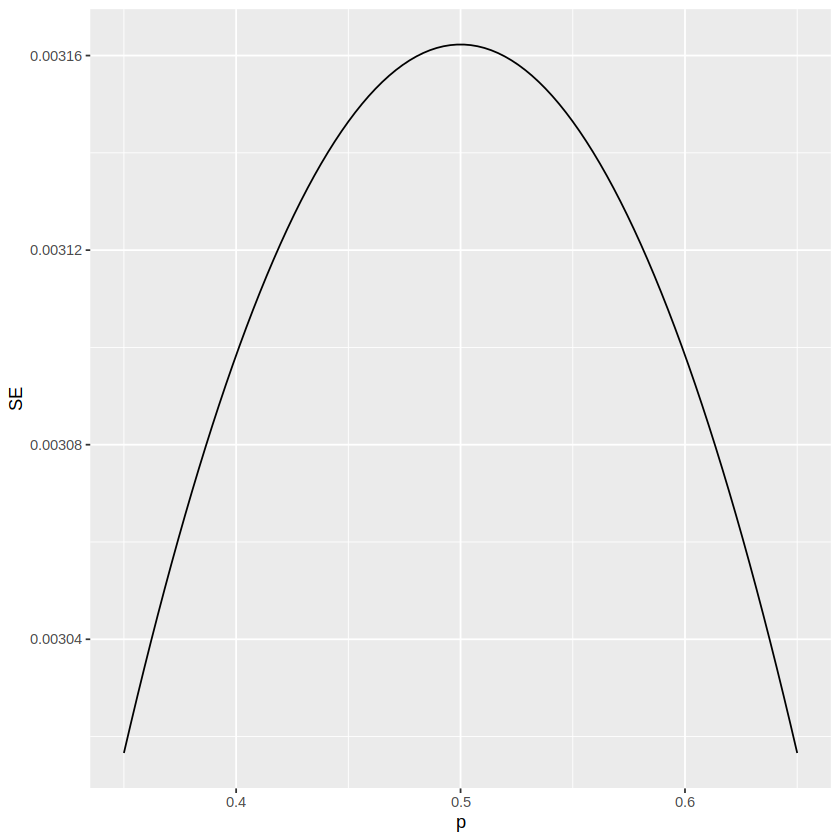

In [1]:
library( tidyverse )

N <- 100000 
p <- seq( 0.35, 0.65, length=100 )
SE <- sapply( p, function(x) 2*sqrt(x*(1-x)/N) )
data.frame( p=p, SE=SE ) %>% ggplot( aes(p,SE) ) + 
            geom_line()

The graph showing us th standard error fro several values of *p*. If we fix *N=100,000*. But running polls with a sample size of *100,000* is very expensive, but a more important reason because there're no pollsters that conducting polls very large, it's that *theory has its limitations*:

* Polling is much more complicated than picking beads from an urn. While the beads are either blue or red, when you ask to the people might lie to you.
* Usually you're conducting these pools by phone, yout might miss people thatn don't have phones.
* They might vote differently than do.
* The most different way an actual poll is from our urn model is that we actually don't know for sure who is in our population and who is not.

We face the following questions.

* How do we know who is going to vote?
* Are we reaching all possible voters?

Even if our margin of error is very small, it may not be exactly right that our expected values is *p*. We call this **bias**. Historically, we observe that polls are *biased*, although not by that much. The typical bias appears to be between *1\%* and *2\%*.

<hr/>

### Exercises



#### Exercise 1: Sample average

Write function called *take_sample* that takes the proportion of Democrats, *p*, and the sample size *N* as arguments and: 

* Returns the sample average of *Democrats (1)* and *Republicans (0)*. 
* Calculate the sample average if the proportion of Democrats equals *0.45* and the sample size is *100*.

**Instructions** 

1. Define a function called *take_sample* that takes *p* and *N* arguments.
2. Use the *sample* function as the first statement in your function to sample *N* elements from a vector of option where Democrats are assigned value *1* and Republicans are assigned value *0*, in that order.
3. Use the *mean* function as the second statement in your function to find the average value of the random sample.

In [10]:
take_sample <- function( p, nsize ) {
    x <- sample( c(0,1), size=nsize, replace=TRUE, prob=c(1-p, p)) # return sample average of Democrats
    average <- mean( x )                                           # calculate the sample average
    return(average)
}

set.seed( 1 )           # to make sure your answer matches the expected result after random sampling
p <- 0.45
N <- 100 

result <- take_sample( p, N )
result

[1] 0.46

Solution explain: The solution to the exercise is a function called take_sample that takes two arguments: p and N.

The function take_sample uses the sample function to randomly select N elements from a vector of options where Democrats are assigned the value '1' and Republicans are assigned the value '0'. The prob argument in the sample function is used to specify the probability of each option. In this case, the probability of selecting a Democrat (1) is p and the probability of selecting a Republican (0) is 1 - p. The replace = TRUE argument means that the same option can be selected more than once.

The mean function is then used to calculate the average value of the randomly selected elements. This is the proportion of Democrats in the sample.

The set.seed function is used to set the seed of R's random number generator, which is useful for reproducibility. The same set of random numbers will be generated each time the code is run.

The variables p and N are defined as the proportion of Democrats in the population and the number of people polled, respectively. The take_sample function is then called with these arguments to determine the sample average of N randomly selected people from a population containing a proportion of Democrats equal to p. The result is printed to the console.

#### Exercise 2: Distribution of errors - 1

Assume the proportion of Democrats in the population *p = 0.45* and that your sample size *N=100* polled voters. The *take_sample* function you defined previously generates our estimate, $\overline{X}$.

* Replicate the random sampling *10,000* times and calculate $p - \overline{X}$ for each random sample. Save these differences as a vector called *errors*.
* Find the *average of errors* and plot a histogram of the distribution.


**Instructions** 

1. The function *take_sample* that you defined in the previous exercise has already been run for your.
2. Use the *replicate* function to replicate subtracting the result of *take_sample* from the value of *p* *10,000* times.
3. Use the *mean* function to calculate the average of the difference between the sample average and actual value of *p*.

In [23]:
p <- 0.45                       # Democrats probability
N <- 100                        # n-samples
B <- 10000                      # times to replicate

set.seed( 1 )
errors <- replicate( B, {
    p - take_sample( p, N )
})
md <- mean( errors )
y <- (md / 100000)
print(y)

[1] -4.9e-10


Solution explication: This solution solves the exercise by following the instructions step by step.

First, it defines p as the proportion of Democrats in the population being polled and N as the number of people polled. These are the parameters that will be used in the take_sample function.

Next, it sets B as the number of times we want to replicate the sampling process. This is the number of times the replicate function will run.

The set.seed function is used to ensure that the random sampling process is reproducible. This means that every time you run the code, you will get the same result.

Then, it creates an object called errors that stores the differences between the actual value of p and the sample average for each replication. This is done by subtracting the result of the take_sample function from p inside the replicate function.

Finally, it calculates the mean of the errors object using the mean function. This gives the average of the differences between the sample average and the actual value of p over all the replications. This value is then printed to the console.

So, this solution correctly implements the instructions of the exercise by replicating the sampling process a large number of times and calculating the average difference between the sample average and the actual value of p

#### Exercise 3: Distribution of errors - 2

In the last exercise, you made a vector of differences between the actual value for *p* and an esimate, $\overline{X}$. We called these differences between the actual and estimated values **errors**.

The *errors* object has already been loaded for you. Use the *hist* function to plot a histogram of the values contained in the vector *errors*. Which statement best desribes the *distribution of errors*?.

**Instructions** 
 Possible answers:

1. The errors are all about 0.05.
2. The errors are all about -0.05.
3. The errors are symmetrically distributed around 0.
4. The errors range from -1 to 1.

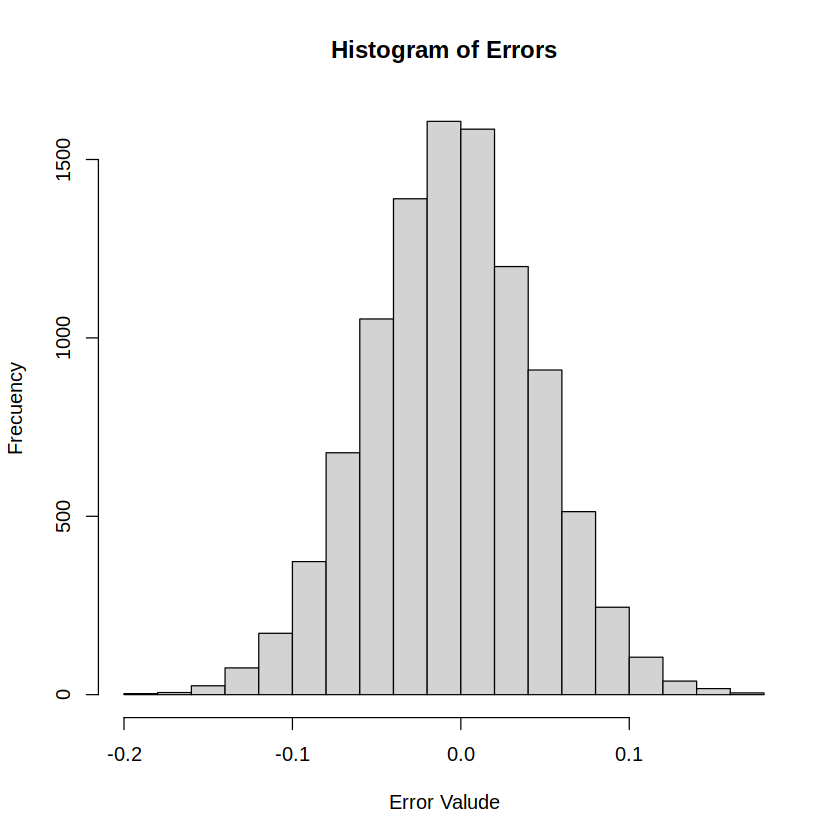

In [15]:
hist( errors, main="Histogram of Errors", xlab="Error Valude", ylab="Frecuency" )

Interpreting the histogram:

1. Symmetry: If the histogram is roughly symmetric, it suggests that the errors are centered around zero, indicating that, on average, your estimates are unbiased.
2. Skewness: If the histogram is skewed to the right (positively skewed), it means that there are more negative errors (underestimates). If it's skewed to the left (negatively skewed), there are more positive errors (overestimates).
3. Spread: The spread of the histogram gives you an idea of how variable the errors are. A wider spread indicates higher variability.
4. Outliers: Look for any extreme values (outliers) in the histogram. Outliers can provide insights into cases where your estimation might be substantially off.

Solution: The mean errors is $-4.9e-05 \approx -0.000049$ then the errors are distributed around 0.


#### Exercise 4: Average size of error

The error $p - \overline{X}$ is a random varible. In practice, the error is not observed because we do not know the actual proportion of Democratic voters, *p*. However, we can describe the size of the error by constructing a simulation.

What is the *average size of the error* if we define the size by taking the absolute value $|p-\overline{X}|$?.

**Instructions**

* Use the sample code to generate *errors*, a vector of $|p-\overline{X}|$.
* Calculate the absolute value of *errors* using the *abs* function.
* Calculate the average of these values using the *mean* function.


In [25]:
p <- 0.45 
N <- 100 
B <- 10000

set.seed( 1 )

errors <- replicate( B, p - take_sample( p,N ) )
mean( abs(errors) )

[1] 0.039267

#### Exercise 5: Standard deviation of the spread

The standard error is related to the typical *size of the error* we mak when predicting. We say *size* because, as we just saw, the errors are centered around 0. In that sense, the typical error is 0. For mathematical reasons related to the *central limit theorem*, we actually use the *standard deviation of errors* rather than the average of the absolute values.

As we have discussed, the standard error is the square root of the average squared distance ($\overline{X}-p)^2$. The ***standard deviation** is defined as the square root of the distance squared*.

Calculate the *standard deviation of the spread*.

**Instructions** 

* Use the sampl code to generate *errors*, a vector of $|p-\overline{X}|$.
* Use $^2$ to square the distances.
* Calculate the average squard distance using the *mean* function.
* Calculate the square root of these values using the *sqrt* function.

In [31]:
p <- 0.45 
N <- 100 
B <- 10000

set.seed( 1 )

errors <- replicate( B, p - take_sample(p,N))

sdev <- sd(errors)
print( paste( "With sd function, Standard Deviation of Errors: ", sdev) )

sq_errors <- errors^2
sdev2 <- sqrt( mean(sq_errors) )
print( paste( "With manual calculus, Standard Deviation(2) of Errors: ", sdev2) )

[1] "With sd function, Standard Deviation of Errors:  0.0495018448369778"
[1] "With manual calculus, Standard Deviation(2) of Errors:  0.0494993939356837"


#### Exercise 6: Estimating the standard error

The theory we just learned tells us what this standard deviation is going to be because it is the standard error of $\overline{X}$.

Estimate the *standard error* given an expected value of *0.45* and a sample size of *100*.

**Instructions** 

* Calculate the standard error using the *sqrt* function.

We know that 
$$\text{standard error} = SE = \sqrt{\frac{p*(1-p)}{N} }$$


In [38]:
p <- 0.45 
N <- 100 

SE <- sqrt((p*(1-p))/N)
print(SE)


[1] 0.04974937


#### Exercise 7: Standard Error of the estimate.

In practice, we don't know *p*, so we construct an estimate of the theoretical prediction based by plugging in $\overline{X}$ for *p*. Calculate the *standard error of the estimate* ($\hat{SE}(\overline{X})$).

**Instructions** 

* Simulate a poll X using the *sample* function.
* When using the sample function, *create a vector using c()* that contains all possible polling options where '1' indicates a Democratic voter and '0' indicates a Republican voter.
* When using the sample function, use replace = TRUE within the sample function to indicate that sampling from the vector should occur with replacement.
* When using the sample function, use prob = within the sample function to indicate the probabilities of selecting either element (0 or 1) within the vector of possibilities.
* Use the *mean* function to calculate the average of the simulated poll, X_bar.
* Calculate the *standard error* of the $\overline{X}$ using the *sqrt* function and print the result.



In [42]:
p <- 0.45 
N <- 100

set.seed( 1 )

X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )

X_bar <- mean(X)

X_med <- (X_bar * (1 - X_bar)) / N
ese <- sqrt( X_med)
print( ese )


[1] 0.04983974


#### Exercise 8: Plotting the standard error

The standard error estimates obtained from the *Monte Carlo Simulation*, the theoretical preciction, and the estimate of the theoretical prediction are all very close, which tells us that the theory is working. This gives us a practical approach to knowing the typical error we will make if we predict *p* with $\hat{X}$. The theoretical result gives us an idea of how large a sample size is required to obtain the precision we need. Earlier we learned that the largest standard errors occur for *p=0.5*.

Create a plot of the largest standard error for *N* ranging from 100 to 5000. Based on this plot, how large does the sample size have to be to have a standard error of about $1\%$?.


Sample size for 1% standard error: 2475.758 


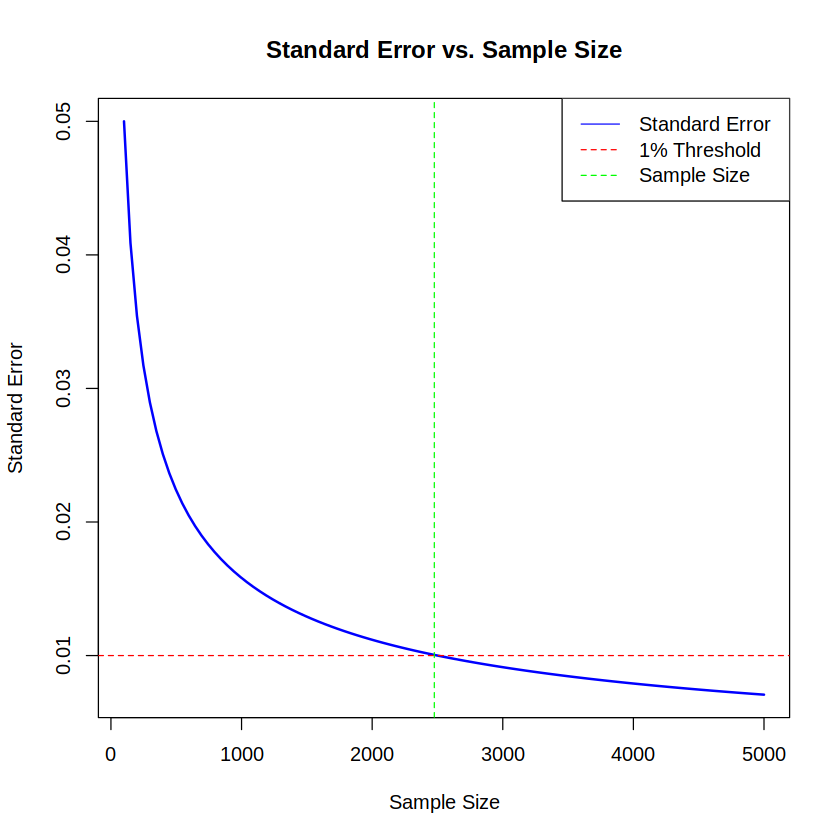

In [47]:
N <- seq( 100, 5000, len=100 )
p <- 0.5 
se <- sqrt(p*(1-p)/N)
#print( paste( "Estandard error: ", se ) )

plot(N, se, type = "l", col = "blue", lwd = 2,
     xlab = "Sample Size", ylab = "Standard Error",
     main = "Standard Error vs. Sample Size")

# Add a horizontal line at y = 0.01 for reference (1%)
abline(h = 0.01, col = "red", lty = 2)

# Identify the sample size where standard error is approximately 1%
index <- which.min(abs(se - 0.01))
abline(v = N[index], col = "green", lty = 2)

# Add a legend
legend("topright", legend = c("Standard Error", "1% Threshold", "Sample Size"), col = c("blue", "red", "green"), lty = c(1, 2, 2))

# Print the sample size where standard error is approximately 1%
cat("Sample size for 1% standard error:", N[index], "\n")

Solution: The sample size must to be **2500**

#### Exercise 9: Distribution of $\hat{X}$

For *N=100*, the central limit theorem tells us that the *distribution of* $\hat{X}$ is \ldots

**Instructions**

* Practically igual to *p*.
* approximately normal with expected value *p* and *standard error* = $\sqrt{p(1-p)/N}$.
* approximately normal with expected value $\overline{X}$ and *standard error* = $\sqrt{\overline{X}(1-\overline{X})/N}$.
* Not a random variable

**Solution**:

approximately normal with expected value *p* and *standard error* = $\sqrt{p(1-p)/N}$.

#### Exercise 10: Distribution of the errors

We calculated a vector *errors* that contained, for each simulated sample, the difference between the actual value *p* and our estimate $\hat{X}$. The errors $\overline{X} - p$ are:

**Instructions** 

* practically equal to 0.
* approximately normal with expected value *p* and *standard error* = $\sqrt{p(1-p)/N}$.
* approximately normal with expected value $\overline{X}$ and *standard error* = $\sqrt{\overline{X}(1-\overline{X})/N}$.
* Not a random variable

**Solution**:


approximately normal with expected value *p* and *standard error* = $\sqrt{p(1-p)/N}$.

#### Exercise 11: Plotting the errors

Make a *qq-plot* of the errors you generated presiously to see if they follow a normal distribution.

**Instructions**

* Run the supplied code.
* Use the *qqnorm* function to produce a *qq-plot* of the errors
* Use the *qqline* function to plot a line showing a normal distribution.


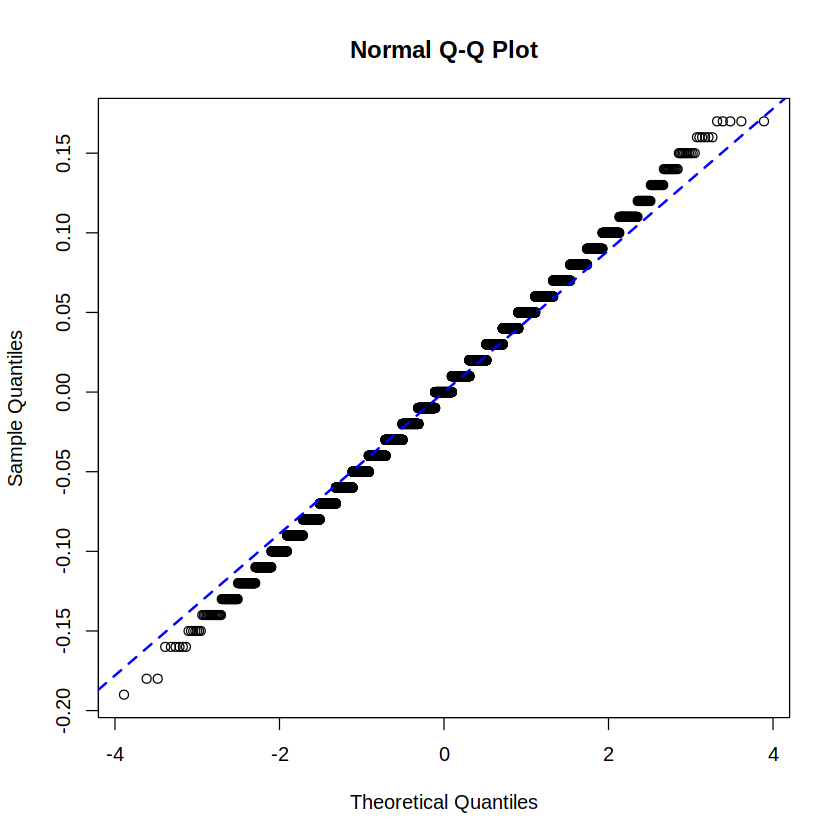

In [50]:
p <- 0.45
N <- 100
B <- 10000
set.seed( 1 )

errors <- replicate( B, p - take_sample( p,N ) ) 

qqnorm( errors )
qqline( errors, col="blue", lwd=2, lty=2 )


#### Exercise 12: Estimating the probability of a specific value of $\overline{X}$.

If *p=0.45* and *N=100*, use the central limit theorem to estimate teh probability that $\overline{X} > 0.5$.

**Instructions**

* Use *pnorm* to define the probability that a value will be greater than *0.5*.

In [53]:
p <- 0.45 
N <- 100

m <- p
sd <- sqrt(p*(1-p)/N)

z_score <- (0.5 - m) /sd 
probability <- 1 - pnorm(z_score)
print(probability)


[1] 0.1574393


#### Exercise 13: Estimating the probability of a specific error size.

Assume you are in a practical situation and you don't know *p*. Take a sample of size *N=100* and obtain a sample average of $\overline{X} = 0.51$.

What is the CLT approximation for the probability that your error size is equal or larger than *0.01*?.

**Instructions**

* Calculate the standard error of the sample using the *sqrt* function.
* Use *pnorm* twice to define the probabilitis that  a value will be less than *-0.01* or greater than *0.01*
* Combine these results to calculate the probability that the size error will be *0.01* or larger.

In [55]:
N <- 100
X_hat <- 0.51 
prob <- 0.01

se_hat <- sqrt( X_hat * (1 - X_hat) / N )

1 - pnorm( prob, 0, se_hat ) + pnorm( (-1*prob), 0, se_hat )

[1] 0.8414493

Explain solution: The solution first defines N as the number of people polled and X_hat as the sample average. These are just initial values that are needed for the calculations.

Next, it calculates the standard error of the sample average (se_hat). The standard error is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It is calculated as the square root of the variance of the sample proportion, which is X_hat*(1-X_hat)/N.

Then, it calculates the probability that the error is 0.01 or larger. This is done by using the pnorm function twice, once for -0.01 and once for 0.01. The pnorm function gives the cumulative distribution function for a specified mean and standard deviation, in this case, 0 and se_hat respectively.

The pnorm function returns the probability that a normally distributed random number will be less than the specified value. So, pnorm(.01, 0, se_hat) gives the probability that a value will be less than 0.01 and pnorm(-0.01, 0, se_hat) gives the probability that a value will be less than -0.01.

Finally, these two probabilities are subtracted from 1 to get the probability that the error size will be 0.01 or larger. This is because the total probability is 1, so subtracting the probabilities of the error being less than 0.01 and greater than -0.01 gives the probability of the error being 0.01 or larger




<hr/>

## Section 3: Confidence Intervals and p-Values



Confidence intervals are a very useful concept. A version of these come from the **ggplot**, geometry **geom_smooth**.

Here's an example using some weather data.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



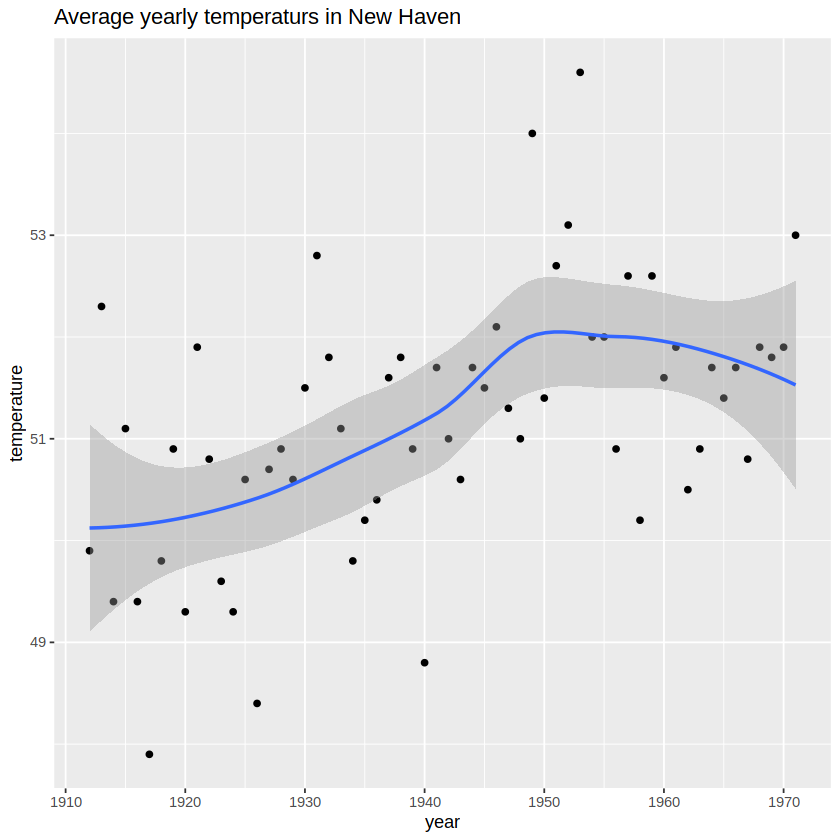

In [4]:
library( tidyverse )
library( ggplot2 )

data( "nhtemp" )
data.frame( year=as.numeric( time(nhtemp) ), temperature=as.numeric(nhtemp)) %>%
    ggplot( aes(year, temperature) ) +
    geom_point() + 
    geom_smooth() + 
    ggtitle( "Average yearly temperaturs in New Haven" )

We will later learn how this curve is formed, but note the shaded area around  the curve. This shaded curve is created using the concept of **confidence intervals**. 

In our competion, we were asked to give an interval. If the interval we submit includes the actual *proportion p*, you get half the money you spent on your poll, back and pass to the next stage of the competition. Onew way to pass the second round of competition, was to report a very large interval, the interval *0 to 1*, this is guaranteed to include *p*; however, with an interval this big, we have not chance of winning the competition.

* If your are an election forecaster, and predict the spread will be between *-100 and 100*, you'll be ridiculed for stating the obvious.
* Even a smaller interval, such as saying that the spread will be between *-10\% and 10\%* will not be considered serious.
* A bold pollster that reports very small intervals, and misses the mark most of the time will not be considered a good pollister.

The smaller the interval we report, the smaller our chance of passing to the second round. We wont to be somewhere in between, *confidence intervals* will help us get there.

We can use the *statistical theory* we have learned to compute, for any given interval, the probability that it includes *p*. Similarly, if we are asked to create an interval with, say, at *95\%* chance of including *p*, we can do that as well. These are called *95\% confidence intervals*.

When pollsters report an estimate and a margin of error, they are reporting a *95\% confidence interval*. 

Let's show hwo this works mathematically:

* We want to know the probability that the interval $[\overline{X} - 2\hat{SE}(\overline{X}), \overline{X} + 2\hat{SE}(\overline{X})]$ is estimated standard error contains the actual proportion of *p*.

1. Note that the start and end of this interval are random variables. Every time that we take a sample, they change. To illustrate this, we're going to run a *Monte Carlo simulation*.

In [9]:
p <- 0.45 
N <- 1000

X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
X_hat <- mean(X)

SE_hat <- sqrt( X_hat * (1 - X_hat) / N )
c( X_hat - (2*SE_hat), X_hat + (2*SE_hat) )


[1] 0.400671 0.463329

Note that the interva we get when we write this code is different from what we get if we run that same code again. If we keep sampling and creating intervals, we will see that this is due to random variation.

2. To determine the probability that the interval includes *p*, we need to compute this probability. By subtracting and dividing the same quantities in all parts of the equation, we get that the equation is equivalent to this.
$$
\begin{array}{l}
Pr( \overline{X} - 2\hat{SE}(\overline{X})\;\leq\; \overline{X} + 2\hat{SE}(\overline{X}))
\\
\\
Pr\left(-2 \leq \frac{\overline{X} - p}{\hat{SE}(\overline{X})} \leq 2\right)
\end{array}
$$


The term in the middle (second equation) is an approximately *normal random variable*, with *expected value 0* and *standard error 1*, which we have been denoting with capital *Z*.
$$Pr(-2 \leq \mathit{Z} \leq 2)$$
So what we have is , what is th probability of a standard normal variable being between *-2 and 2*?, and this is about *95\%*, we have a *95\%* confidence interval.

If we want to have a larger probability, say *99\% confidence interval*, we need to multiply by whatever *Z*, satisfies the following equation $Pr( -z \leq \mathit{Z} \leq z ) = 0.99$. Note that by using the quantity that we get by typing this code. which is about *2.576*, will do it, because by definition the *pnorm* of what we get, when we type *qnomr(0.995)*, is by definition *0.995*.


In [12]:
z <- qnorm( 0.995 )
z

pnorm( qnorm(0.995) )

[1] 2.575829

[1] 0.995

And by symmetry, *pnorm* of *1 - qnorm(0.995)* is *1-0.995*

In [17]:
pnorm( 1-0.995 )


[1] 0.5019947

So now, we compute:

In [16]:
pnorm(z) - pnorm(-z)

[1] 0.99

we get *99\%*, this is what we wanted.

We can use this approach for any **percentile *q***. We use $1-((1-q)/2)$, why this number, because of what we just saw:
$$
\begin{array}{l}
z = 1 - \frac{(1 - q)}{2} 
\\
\\
1 - \frac{1 - q}{2} + \frac{1 - q}{2} = 1 - \frac{2(1-q)}{2} = 1 -1 + q = q
\end{array}
$$


Also note, that to get exactly *0.95*, we use a slightly smaller number than 2. How do we know? We type *qnorm(0.975)* and we see that the value that we should be using to get exactly *95\% confidence interval is 1.96*.

In [19]:
z <- qnorm(0.975)
print( paste( "Confidence interval of 95%: z = ", z ) )

[1] "Confidence interval of 95%: z =  1.95996398454005"


### Visual clarification of *Confidence Intervals*



Recall that to define a confidence interval size *q*, we solve for $z = 1 - \frac{1-q}{2}$. For example, to find a *95\%* confidence interval, we solve for $z = qnorm(0.975)$.

In [31]:
z <- qnorm( 0.975)
print( paste("qnorm(0.975) -> z =", z ) )

z <- qnorm( 0.95)
print( paste("qnorm(0.95)  -> z =", z ) )

[1] "qnorm(0.975) -> z = 1.95996398454005"
[1] "qnorm(0.95)  -> z = 1.64485362695147"


A common source of confusion is why *qnorm(0.975)* is used rather than *qnorm(0.95)* to find a *95\%* confidence interval. This is because the normal distribution is symmetric and our confidence interval should cover the middle *95\%* of the distribution:

<center><img src="images/sec03-01.png" width=300 height=200/></center>

* The upper limit if this *95\%* confidence interval will be $\overline{X} + qnorm(0.975)*\hat{SE}$, which removes the *2.5\%* highest observations.
* The lower limit if this *95\%* confidence interval will be $\overline{X} - qnorm(0.975)*\hat{SE}$, which removes the *2.5\%* lowest observations.

We can run a *Monte Carlo* simulation to confirm that a *95\%* confidence interval includes *p* *95\%* of the time. We will use *between* function to test whether our values falls within our range, this function return *logical value*:

* TRUE indicate that our value is larger than the lower bound and smaller the upper bound.

Now we're going to construct the confidence interval inside de call to replicate. In the last line, we're going to ask, is *p* included in the interval?. We use the *between* function and return true or false.

To compute how often it happended, we compute the *mean of that vector of true and false*.

In [15]:
library( tidyverse )

p <- 0.45 
N <- 1000
B <- 10000

inside <- replicate( B, {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
    X_hat <- mean(X)
    SE_hat <- sqrt( X_hat * (1-X_hat) / N )
    between( p, X_hat - (2*SE_hat), X_hat + (2*SE_hat) )
})
mean( inside )

[1] 0.9545

<center><img src="images/sec03-02.png" /></center>

This plot shows you the first few confidence intervals that were generated in our *Monte Carlo* simulation. We created simulations so we know what *p* is, it's represented with a vertical black line. We can see the *confidence intervals* varying; each time, they fall in slightly different places, this is because they're random variables.

We also know that most of the times, *p* is included inside the confidence interval, but *p* is not moving because is not a random variable.

Also see that, every once in a while, we miss *p*, these cases, confiance intervales, are shonw in red. We should only see about *5\%* of the intervals in red because they're *95\%* confidence intervals.


### The correct language



It is important to remember that it is the *intervals* that are at *random*, not *p*. In the graph, we could see that the *random intervals* that were moving around *p*, while *p* remained fixed, and it was represented with a vertical line.

The 95\% relates to the probability that the random interval falss on top of *p*. 

Saying that *p* has a 95\% chance of being between this and that is technically an incorrect statement, because *p* is not random.

In summary:

* The 95\% confidence intervals **are random**, but ***p* is not random**.
* The **95\% refers to the *probability*** that the random intervals falls on top of *p*.
* Is **technically incorrect** to state that ***p* has a 95\% chance of being in between two values**, its implies *p* is random.



### Power 


Pollsters do not become successful for providing correct confidence intervals, but rather who will win.

When we took a sample of size *N=25*, the confidence interval for the spread was $[-0.44, 0.36]$, this includes *0*.

In [18]:
N <- 25
X_hat <- 0.48 

(2*X_hat - 1) + c(-2,2)*2*sqrt(X_hat*(1-X_hat)/ N )

[1] -0.4396799  0.3596799

If we were pollsters and we were forced to make a declaration about the election, we would have no choice that to say, it's a tossup.

A problem with our poll results, is that given the sample size, and the value of *p*, we would have to sacrifice on the probability of an incorrect call to crate an interval, that does not include 0, an interval that makes a call of who's going win.

The fact that our interval includes 0, it does not mean that this election is close, it only means that we have a small sample size. In statistical textbooks, this is called **lack of power**.

In the context of pools, **power** can be thought of as the **probability of detecting a spread different from 0**. By increasing our sample size, we lower our standard error, and therefore have a much better chance of detecting the direction of the spread.


### p-Values



The **p-Values** are related to *confidence intervals*. Let's consider the blue and red bead example. Suppose that rather than wanting to estimate the spread or the proportion of blue; I'm insterested only in, are there more blue beads than red beads?. Another way to ask that is:

* is *spread = 2p - 1* bigger than *0*?

Suppose we take a random sample of, say, 100 beads, and we observ 52 blue beads. This gives us a spread of *4\%*. This seems to be pointing to there being more blue beads than red beads, because $4\% > 0$.

$$
\text{spread} = 2*\frac{52}{100} - 1 = 0.04 \implies 4\%
$$

However, as data scientists, we need to be skeptical. We know there is chance involved in this process, and we can get a 52 even when the actual spread is 0. The **null hypothesis** is the **skeptic's hypothesis**.

In this case, it would be the spread is 0. We have observed a random variable $2\overline{X} - 1 = 0.04$, and the *p-value* is the answer to the question: how likely is it to see a value this large when the null hypothesis is true? So we write, what's the $Pr(|\overline{X} - 0.5| > 0.02)$?. That's the same as asking, what's the chance that the spread is 4 or more?

The *null hypothesis* is that the spread is 0 or that *p* is a half.

* Under the null hypothesis, we know that this quantity here is a **standard normal**:
  $$
  \sqrt{N}\frac{\overline{X} - 0.5}{\sqrt{ 0.5\ast(1 - 0.5)}}
  $$
  We've taken a *random variable* and divided it by its *standard error* after subtracting its *expected value*.


Using this equation, we can compute the probability which is a *p-value*:
$$
Pr\left(\sqrt{N}\frac{|\overline{X} - 0.5|}{\sqrt{ 0.5\ast(1 - 0.5)}} > \sqrt{N}\frac{0.02}{\sqrt{ 0.5\ast(1 - 0.5)}}  \right)
$$
which reduces to this equation:
$$
Pr\left(\sqrt{N}\frac{|\overline{X} - 0.5|}{0.5} > \mathit{Z}\right)
$$
where $\mathit{Z}$ is a **standard normal**.

Now we can use code to compute this.

In [19]:
N <- 100
z <- sqrt(N)*(0.02/0.5)
print(z)
1 - ( pnorm(z) - pnorm(-z) )

[1] 0.4


[1] 0.6891565

we compute the probability, which is equal to 69\% in this case. This is the **p-Value**, there's actually a large chance of seeing 52 blue beads or more under the *null hypothesis* that there is the same amount of blue beads as red beads.

So the 52 blue beads are not very strong evidence.


#### Another explanation of p-Values


The *p-Value* is the *probability of observing a values as extreme or more extreme than the result given that the **null hypothesis** is true*. In a *normal distribution*, this refers to the probability of observing a *Z-score* whose absolute value is as high or higher than the *Z-score* of interest.

Suppose we want to find the *p-Value* of an observation *2 standard deviations larger than the mean* ($2*\hat{SE}(\overline{X})$), this means we are looking for anything with $|z|\geq 2$.

Graphically, the *p-value* gives the probability of an observation that's least as far away from the mean or further. This plot shows a standard normal distribution, centered at *z = 0*, with a *standard deviation = 1*. The shaded tails are the region of the graph that are $2*\hat{SE}(\overline{X})$ or more away from the mean:

<center><img src="images/sec03-03.png" /></center>

* The right tail can be found with *1 - pnorm(2)*.
* If we want to both tails, we want to find the probability of any observation as far away from the mean or farther, in either direction. The distribution is symetrical, we know that our desired values is just *2\*(1-pnorm(2))*.

Recall that, by default, *pnorm* gives the **CDF** for a normal distribution with a mean $\mu = 0$ and standard deviation $\sigma = 1$. To find *p-values* for a given *z-score*, *z* is a normal distribution, use $2\ast(1-pnorm( z, \mu, \sigma ))$ instead.

<hr/>

### Exercises (Section 3)



#### Exercise 1: Confidence Interval for *p*

For the following exercises we will use actual poll data from the election 2016 election. The exercises will contain *pre-load data from the **dslabs** pacakage*.

In [3]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

In [4]:
data( "polls_us_election_2016" )
View( polls_us_election_2016[1:10, ] )          # show 10 first rows

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA
7,U.S.,2016-11-02,2016-11-06,CBS News/New York Times,A-,1426,lv,45.00,41.00,5.00,NA,45.11649,40.92722,4.341786,NA
8,U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44.00,40.00,6.00,NA,43.58576,40.77325,5.365788,NA
9,New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,8439,lv,46.00,44.00,6.00,NA,44.82594,41.59978,7.870127,NA


* We will use all the national polls that ended within a few weeks before the election.
* Assume there are only two candidates and construct a 95\% confidence interval for the election night proportion *p*.

**Instructions**

* Use *filter* function to subset the data set for the poll data you want. Include polls that ended on or after October 31, 2016 (enddate). Only include polss that took place in the US. Call this filtered object *polls*.
* Use *nrow* to make sure you created a filtered object *polls* that contains the correct number of rows.
* Extract the sample size *N* from the first poll in your subsect object *polls*.
* Convert the percentage of Clinton voters (*rawpoll_clinton*) from the first poll in *polls* to a proportion, *X_hat* ($\hat{X}$). Print this value to the console.
* Find the *standard error* of $\hat{X}$ given *N*. Print this result to the console.
* Calculate the 95\% confidence interval of this estimate using the *qnorm* function.
* Save the lower and upper confidence intervals as an object called *ci*. Save the lower confidence interval first.

We need to use *dplyr::filter* due to the *tydiverse library conflicts* that give errors with *filter* and *lag* functions.

In [5]:
polls <- polls_us_election_2016 %>% filter(enddate >= "2016-10-31" & state == "U.S.") 

nrow( polls )

[1] 70

In [26]:
N <- polls$samplesize[1]            # or N <- head( polls, 1 )[,"samplesize"]
N

[1] 2220

In [27]:
X_hat <- polls$rawpoll_clinton[1]/100
X_hat

[1] 0.47

In [28]:
se_hat <- sqrt( X_hat * (1-X_hat) / N )
se_hat

[1] 0.01059279

In [29]:
ci_lower <- X_hat - qnorm(0.975) * se_hat
ci_upper <- X_hat + qnorm(0.975) * se_hat
ci <- c(ci_lower, ci_upper)
ci

[1] 0.4492385 0.4907615



#### Exercise 2: Pollster results for *p*

Create a new object called *pollster_results* that contains the pollster's name, the end date of the poll, the proportion of voters who declared a vote for Clinton, the standard error of this estimate, and the lower and upper bounds of the confidence interval for the estimate.

**Instructions**

* Use the *mutate* function to define four new columns: *X_hat*, *se_hat*, *lower* and *upper*. Temporarily add these columns to the *polls* object that has already been loaded for your.
* In the *X_hat* column, convert the raw poll results for Clinton to a proportion.
* In the *se_hat* column, calculate the standard error of *X_hat* for each poll using the *sqrt* function.
* In the *lower* column, calculate the lower bound of the 95\% confidence interval using the *qnorm* function.
* In the *upper* column, calculate the upper bound of the 95\% confidence interval using the *qnorm* function.
* Use the *select* function to select the columns from *polls* to save to the new object *pollster_results*.

In [33]:
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA


In [36]:
pollster_results <- polls %>% select("pollster", "enddate") %>%
                        mutate(
                            X_hat = polls$rawpoll_clinton/100,
                            se_hat = sqrt( X_hat * (1-X_hat) / polls$samplesize ),
                            lower = X_hat - qnorm(0.975) * se_hat,
                            upper = X_hat + qnorm(0.975) * se_hat
                        )

#View( pollster_results )


#### Exercise 3: Comparing to actual results *p*

The final tally for the popular vote was Clinton 48.2\% and Trump 45.1\%. Add a column called *hit* to *pollster_results* that states if the confidence interval included the true proportion *p=0.482* or not. What the proportion of confidence invervals include *p*?

**Instructions**

Finish the code to create a new object called *avg_hit* by following these steps

* Use the *mutate* function to define a new variable called *hit*.
* Use logical expressions to determine if each values in *lower* and *upper* span the actual proportion.
* Use the *mean* function to determine the average value in *hit* and summarize the results using *summarize*.

Solution explanation: 

1. The head function is used to examine the first few rows of the pollster_results data frame. This is not necessary for the solution, but it helps to understand the structure of the data.
2. The mutate function is used to add a new column to the pollster_results data frame. This new column is called hit and it is a logical variable. It is TRUE if the actual proportion (0.482) is within the confidence interval (between lower and upper) for each poll, and FALSE otherwise. This is done using the logical expression lower<=0.482 & upper>=0.482.
3. The summarize function is used to calculate the average value of the hit column. This is done using the mean function. The result is a single number that represents the proportion of polls where the confidence interval includes the actual proportion. This result is saved in a new object called avg_hit.

So, the solution is following the instructions of the exercise step by step: it first defines a new variable hit using a logical expression, then it calculates the average value of this variable and summarizes the result.

In [49]:
head( pollster_results )

,pollster,enddate,X_hat,se_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.4700,0.010592790,0.4492385,0.4907615
2,Google Consumer Surveys,2016-11-07,0.3803,0.002978005,0.3744632,0.3861368
3,Ipsos,2016-11-06,0.4200,0.010534681,0.3993524,0.4406476
4,YouGov,2016-11-07,0.4500,0.008204286,0.4339199,0.4660801
5,Gravis Marketing,2016-11-06,0.4700,0.003869218,0.4624165,0.4775835
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.4800,0.013883131,0.4527896,0.5072104


In [50]:
pollster_results <- pollster_results %>% mutate(hit = lower<=0.482 & upper>=0.482)
pollster_results

pollster,enddate,X_hat,se_hat,lower,upper,hit
<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
ABC News/Washington Post,2016-11-06,0.4700,0.010592790,0.4492385,0.4907615,TRUE
Google Consumer Surveys,2016-11-07,0.3803,0.002978005,0.3744632,0.3861368,FALSE
Ipsos,2016-11-06,0.4200,0.010534681,0.3993524,0.4406476,FALSE
YouGov,2016-11-07,0.4500,0.008204286,0.4339199,0.4660801,FALSE
Gravis Marketing,2016-11-06,0.4700,0.003869218,0.4624165,0.4775835,FALSE
Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.4800,0.013883131,0.4527896,0.5072104,TRUE
CBS News/New York Times,2016-11-06,0.4500,0.013174309,0.4241788,0.4758212,FALSE
NBC News/Wall Street Journal,2016-11-05,0.4400,0.013863610,0.4128278,0.4671722,FALSE
IBD/TIPP,2016-11-07,0.4120,0.014793245,0.3830058,0.4409942,FALSE


In [53]:
avg_hit <- pollster_results %>% mutate(hit = lower<=0.482 & upper>=0.482) %>% summarize(mean(hit))
avg_hit

mean(hit)
<dbl>
0.3142857




#### Exercise 4: Theory of confidence intervals

In this confidence intervals are constructed correctly, and the theory holds up, what proportion of confidence intervals should include *p*?

**Instructions**

Possible answers:

* 0.05
* 0.31
* 0.50
* 0.95

**Solution: 0.95**



#### Exercise 5: Confidence intervals for *d*

A much smaller proportion of the polls than expected produce confidence intervals containing *p*. Notice that most polls that fail to include *p* are underestimating. The rationale for this is that undecided voters historically divide evenly between the two main candidates on election day.

In this case, it is more informative to estimate the spread or th difference between the proportion of two candidates *d*, or *0.482 - 0.461 = 0.021* for this election.

Assume that there are only two parties and that *d = 2p - 1*. Construct a 95\% confidence interval for difference in proportions on election night.

**Instructions**

* Use *mutate* function to define a new variable called *d_hat* in *polls* as the proportion of Clinto voters minus the proportion of Trump voters.
* Extract the sample size *N* from the first poll in your subset object *polls*.
* Extract the difference in proportions of voters *d_hat* from the first poll in your subset object *polls*.
* Use the formula above to calculate *p* from *d_hat*. Assing *p* to the variable *X_hat*.
* Find the standard error of the spread given *N*. Save this as *se_hat*.
* Calculate the 95\% confidence interval of this estimate of the difference in proportions, *d_hat*, using the *qnorm* function.
* Save the *lower* and *upper* confidence intervals as an object called *ci*. Save the lower confidence interval first.


In [55]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

data( "polls_us_election_2016" )

**Solution explanation**

1. Uses the mutate function to create a new column d_hat in the polls data frame. This column is calculated as the difference between the proportion of Clinton voters and the proportion of Trump voters. The filter function is used to select only the polls that ended on or after October 31, 2016, and were conducted in the U.S.
2. The sample size N of the first poll in the polls data frame is extracted and stored in a variable. This is done by accessing the samplesize column of polls and selecting the first element.
3. The difference in proportions d_hat from the first poll is extracted and stored in a variable. This is done by accessing the d_hat column of polls and selecting the first element.
4. The proportion of votes for Clinton X_hat is then calculated from d_hat using the given formula.
5. The standard error of the spread se_hat is calculated using the formula provided in the exercise. This involves the square root function sqrt, the proportion of votes for Clinton X_hat, and the sample size N.
6. The qnorm function is used to calculate the 95% confidence interval for the difference in the proportions of voters. The lower and upper confidence intervals are calculated separately and then combined into a vector ci using the c function. The qnorm function is used with the argument 0.975 to get the critical value for a 95% confidence interval.

In [76]:
polls <- polls_us_election_2016 %>% filter( enddate >= "2016-10-31" & state == "U.S." )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA


In [77]:
polls <- polls %>% mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )

polls$d_hat

[1]  0.0400  0.0234  0.0300  0.0400  0.0400  0.0400  0.0400  0.0400 -0.0150
[10]  0.0300  0.0400  0.0600  0.0100  0.0500 -0.0323  0.0320  0.0278  0.0300
[19]  0.0600  0.0200  0.0400  0.0910  0.0150  0.0300  0.0400  0.0400  0.0500
[28]  0.0390 -0.0240  0.0400  0.0050 -0.0100  0.0300  0.0200  0.0000  0.0490
[37]  0.0050  0.0300  0.0090  0.0820  0.0000  0.0500  0.0730 -0.0010 -0.0040
[46] -0.0300  0.0680  0.0500  0.0000  0.0262  0.0333  0.0000  0.0124  0.0600
[55] -0.0475  0.0009  0.0500 -0.0553  0.0056 -0.0540  0.0067  0.0500  0.0100
[64] -0.0351  0.0300 -0.0503  0.0200 -0.0547  0.0200 -0.0362

In [79]:
N <- polls$samplesize[1]            # or N <- head( polls, 1 )[,"samplesize"]

d_hat <- polls$d_hat[1]
d_hat

[1] 0.04

In [80]:
X_hat <- (d_hat + 1) / 2   ## we want to calculated assuming there're only 2 candidates
X_hat

[1] 0.52

Remember that the standard error of the spread *d_hat* will be two times the standard error of *X_hat*.

In [81]:
se_hat <- 2*sqrt( X_hat * (1-X_hat) / N )
se_hat

[1] 0.02120683

The lower bound of the 95\% confidence interval is equal to $\hat{d} - qnorm(0.975) \ast \hat{SE}(\overline{X})$, where $\hat{d}$ is the difference. And the upper bound is equal to $\hat{d} + qnorm(0.975) \ast \hat{SE}(\overline{X})$:

In [84]:
ci <- c(d_hat - qnorm(0.975)*se_hat, d_hat + qnorm(0.975)*se_hat )
ci

[1] -0.001564627  0.081564627



#### Exercise 6: Pollster results for *d*.


Create a new object called *pollster_results* that contains the pollster's name, the end date of the poll, the difference in the proportion of voters who declared a vote either, and the lower and upper bounds of the confidence interval for the estimate.

**Instructions**

* Use the *mutate* function to define four new columns:
  * X_hat: calculate the proportion of voters for Clinton using *d_hat*.
  * se_hat: calculate standard error of the spread for each poll using the *sqrt* function.
  * lower: calculate the lower bound of 95\% confidence interval using the *qnorm* function.
  * upper: calculate the upper bound of 95\% confidence interval using the *qnorm* function.
  Temporary add these columns to the *polls* object that has already been loaded for you.
* Use the *select* function to select:
  * pollster
  * enddate
  * d_hat
  * lower
  * upper
  columns from *polls* to save to the new object *pollster_results*.

In [6]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

data( "polls_us_election_2016" )
polls <- polls_us_election_2016 %>% filter( enddate >= "2016-10-31" & state == "U.S." )

In [8]:

polls <- polls %>%
            mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


In [10]:
N <- polls$samplesize
X_hat <- (polls$d_hat + 1) / 2 
se_hat <- 2*sqrt( X_hat * (1-X_hat) / N )

In [11]:
pollster_results <- polls %>%
                        select( "pollster", "enddate", "d_hat" ) %>%
                        mutate(
                            lower = d_hat - qnorm(0.975)*se_hat,
                            upper = d_hat + qnorm(0.975)*se_hat
                        )
head( pollster_results )

,pollster,enddate,d_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463
2,Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990
3,Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531
4,YouGov,2016-11-07,0.0400,0.007703641,0.07229636
5,Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087




#### Exercise 7: Comparing to actual results - *d*.


What proportion of confidence intervals for the difference between the proportion of voters included *d*, the actual difference in election day?.

**Instructions**

* Use the *mutate* function to define a new variable within *pollster_results* called *hit*.
* Use logical expressions to determine if each values in *lower* and *upper* span the actual difference in proportions of voters.
* Use the *mean* function to determine the average value in *hit* and summarize the results using *summarize* function.
* Save the result of your entire line of code as an object called *avg_hit*.

In [12]:
polls <- polls_us_election_2016 %>% 
            filter( enddate >= "2016-10-31" & state == "U.S." ) %>% 
            mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )
            
pollster_results <- polls %>%
                        select( "pollster", "enddate", "d_hat" ) %>%
                        mutate(
                            lower = d_hat - qnorm(0.975)*se_hat,
                            upper = d_hat + qnorm(0.975)*se_hat
                        )
head( pollster_results )

,pollster,enddate,d_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463
2,Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990
3,Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531
4,YouGov,2016-11-07,0.0400,0.007703641,0.07229636
5,Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087


Add a logical variable called *hit* that indicates whether the actual value (0.021) exists within the confidence interval of each poll. 

Summarize the average *hit* result to determine the proportion of polls with confidence intervals include the actual value. 

Save the result as an object called *avg_hit*.

In [13]:
pollster_results <- pollster_results %>% mutate(hit = lower<=0.021 & upper>=0.021)
head( pollster_results )

,pollster,enddate,d_hat,lower,upper,hit
,<fct>,<date>,<dbl>,<dbl>,<dbl>,<lgl>
1,ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463,TRUE
2,Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990,TRUE
3,Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531,TRUE
4,YouGov,2016-11-07,0.0400,0.007703641,0.07229636,TRUE
5,Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227,FALSE
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087,TRUE


In [14]:
avg_hit <- pollster_results %>% 
                        mutate(hit = lower<=0.021 & upper>=0.021) %>%
                        summarize( mean( hit ) )
avg_hit

mean(hit)
<dbl>
0.7714286




#### Exercise 8: Comparring to actual results by pollster.


Although the proportion of confidence intervals that include the actual difference between the proportion of voters increases substantially, it is still lower that 0.95. In the next chapter, we learn the reason for this.

To motivate our next exercises, calculate the difference between each poll's estimate $\hat{d}$ adn the actual *d=0.021*. Stratify this difference, or error, by pollster in a plot.

**Instructions**

* Define a new varible *errors* that contains the difference between the estimated difference between the proportion of voters and the actual difference on election day, 0.021.
* To create the plot of errors by pollster, add a layer with the funtion *geom_point*. The aesthetic mappings require a definition of the *x-axis* and *y-axis* variables. So the code looks like the example below, but you fill in the variables for *x* and *y*.
* The last line of the example code adjusts the *x-axis* labels so that they are easier to read.

In [32]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

data( "polls_us_election_2016" )
polls <- polls_us_election_2016 %>% filter( enddate >= "2016-10-31" & state == "U.S." )

polls <- polls %>%
            mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


Add variable *error* to the object *polls*:

In [33]:
d <- 0.021

polls <- polls %>%
            mutate( error = (d_hat - d) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,error
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400,0.0190
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234,0.0024
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300,0.0090
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400,0.0190
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400,0.0190
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400,0.0190


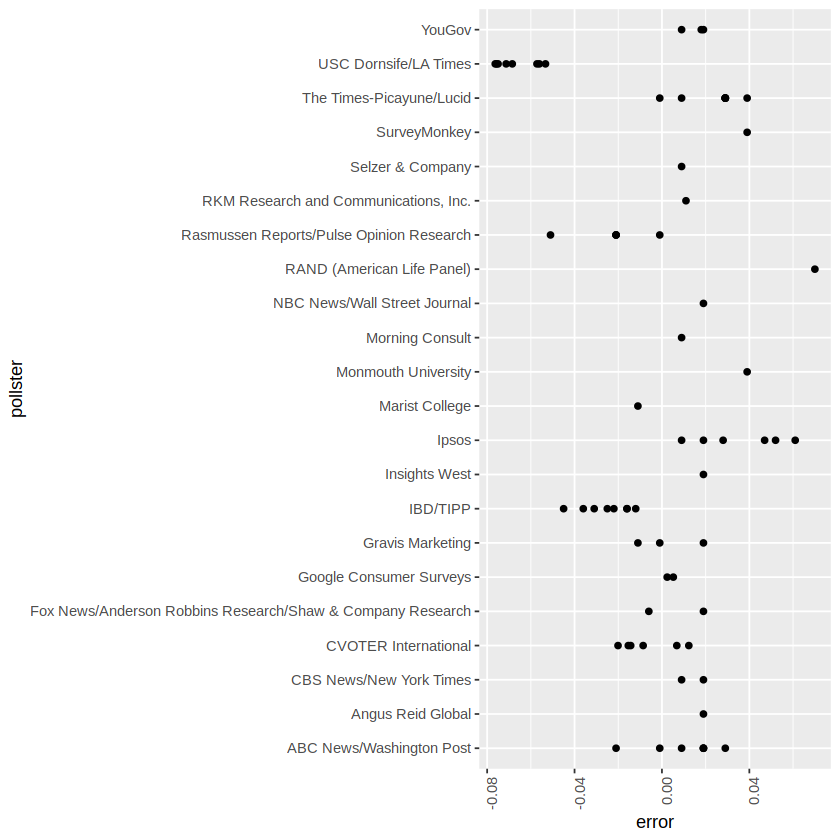

In [21]:
polls %>% ggplot(aes(x = error, y = pollster)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))



#### Exercise 9: Comparring to actual results by pollster - multiple polls


Remake the plot you made for the previous exercise, but only for pollsters that took five or more polls.

You can use *dplyr* tools *group_by* and *n* to group data by a variable of interest and then count the number of observations in the groups. The function *filter* filters data piped into it by your specific condition.

For example:
data %>% group_by( <variable_for_grouping> ) %>% filter( n() >= 5 )

**Instructions**

* Define a new variable *errors* that contains the difference between the estimated difference between the proportion of voters and the actual difference on election day, *0.021*.
* Group the data by pollster using *group_by* function.
* Filter the data by pollsters with 5 or more polls.
* Use **ggplot* to create the plot of errors by pollster.
* Add a layer with the function *geom.point*.

In [37]:
polls <- polls_us_election_2016 %>% filter( enddate >= "2016-10-31" & state == "U.S." )

polls <- polls %>%
            mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


In [38]:
d <- 0.021

polls <- polls %>%
            mutate( error = (d_hat - d) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,error
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400,0.0190
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234,0.0024
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300,0.0090
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400,0.0190
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400,0.0190
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400,0.0190


In [46]:
err_pollster <- polls %>% group_by( error ) %>% filter(n() >= 5)

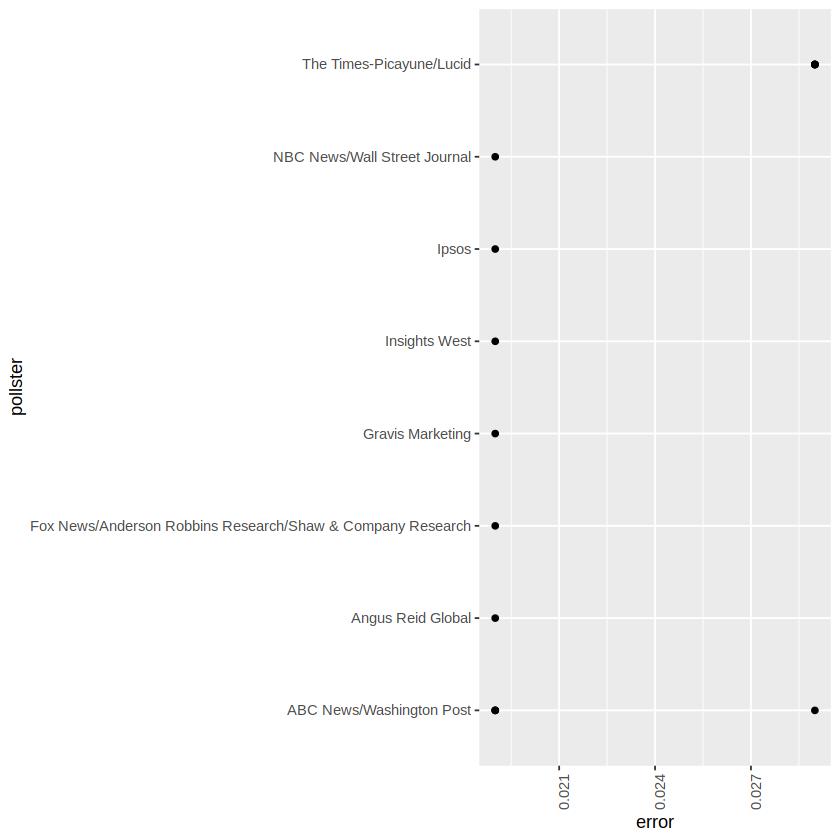

In [47]:
err_pollster %>% ggplot(aes(x = error, y = pollster)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [43]:
polls2 <- polls %>% group_by( error ) %>% mutate( count=n() )
polls2

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,error,count
<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400,0.0190,9
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234,0.0024,1
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300,0.0090,3
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400,0.0190,2
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400,0.0190,9
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400,0.0190,9
U.S.,2016-11-02,2016-11-06,CBS News/New York Times,A-,1426,lv,45.00,41.00,5.00,NA,45.11649,40.92722,4.341786,NA,0.0400,0.0190,2
U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44.00,40.00,6.00,NA,43.58576,40.77325,5.365788,NA,0.0400,0.0190,9
U.S.,2016-11-04,2016-11-07,IBD/TIPP,A-,1107,lv,41.20,42.70,7.10,NA,42.92745,42.23545,6.316175,NA,-0.0150,-0.0360,1


The next code is the same that *polls %>% group_by( error ) %>% filter(n() >= 5)*

In [44]:
polls2 %>% filter( count >= 5 )

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,error,count
<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47,43,4,NA,45.20163,41.72430,4.626221,NA,0.04,0.019,9
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47,43,3,NA,46.84089,42.33184,3.726098,NA,0.04,0.019,9
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48,44,3,NA,49.02208,43.95631,3.057876,NA,0.04,0.019,9
U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44,40,6,NA,43.58576,40.77325,5.365788,NA,0.04,0.019,9
U.S.,2016-11-01,2016-11-04,Angus Reid Global,A-,1151,lv,48,44,6,NA,47.57171,43.68125,5.556625,NA,0.04,0.019,9
U.S.,2016-11-05,2016-11-07,The Times-Picayune/Lucid,NA,2521,lv,45,40,5,NA,45.13966,42.26495,3.679914,NA,0.05,0.029,6
U.S.,2016-11-04,2016-11-07,Insights West,NA,940,lv,49,45,4,NA,49.14547,45.12675,4.253578,NA,0.04,0.019,9
U.S.,2016-11-02,2016-11-05,ABC News/Washington Post,A+,1937,lv,47,43,4,NA,45.28374,41.76419,4.635295,NA,0.04,0.019,9
U.S.,2016-10-31,2016-11-04,Ipsos,A-,2244,lv,43,39,6,NA,43.12950,38.96855,6.757478,NA,0.04,0.019,9




<hr/>

## Section 4: Statistical Models


### Poll Aggregators

In the 2012 president election, Barack Obama won the electoral college and he won the popular vote by a margin of 3.9\%. Let's go back to the week before the election, before we knew this outcome.

**Nate Silver** was giving Obama a 90\% change of winning. Yet, none of the individual polls were nearly that sure. How is Mr. Silver so confident? We're going to use a Monte Carlo simulation to illustrate what Nate Silver saw and other pundits did not.

* We're going to generate results for 12 polls taken the week before the election. 
* We're going to mimic the sample sizes from actual polls.
* We're going to construct and report 95\% confidence intervals for each of these 12 polls.

We're going to generate the data using the actual outcome, 3.9\%, so *d*, the *difference*, *spread* is *0.039*. The sample sizes were selected to mimic regular polls.

We're also going to define *p* (proportion of Democrats), the *spread plus 1 divided by 2*. Then we're going to use the *sapply* function to construct the confidence intervals.

*sapply* function is used when we want to apply a function to each element of a list, vector, or data frame and obtain a **vector** instead a *list* as result.

In [8]:
my_packages <- c( "dslabs", "tidyverse", "ggplot2" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )
library( ggplot2 )

d <- 0.039 
Ns <- c( 1298, 533, 1342, 897, 774, 254, 812, 324, 1291, 1056, 2172, 516 )
p <- (d + 1) / 2

confidence_intervals <- sapply( Ns, function(N) {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
    X_hat <- mean( X )
    SE_hat <- sqrt( X_hat*(1-X_hat) / N )
    2*c(X_hat, X_hat - 2*SE_hat, X_hat + 2*SE_hat) - 1
})


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



* For each sample size for each poll, we're going to generate a *sample*.
* Then we're going to compute the proportion of people voting for Obama *X_hat* ($\hat{X}$).
* Construct and *standard error*, *SE_hat* ($\hat{SE}$).
* And, then return the estimate *X_hat* as well as the beginning and end of the confidence interval.

We're going to do this and then we're going to generate a **data frame** that has all the results. Here are the results of the 12 polls that we generated with the Monte Carlo simulation.

The *t()* function represents to **transpose a data matrix**.

In [9]:
polls <- data.frame( poll=1:ncol( confidence_intervals ),
            t( confidence_intervals ),
            sample_size=Ns
            )
names( polls ) <- c("poll", "estimate", "low", "high", "sample_size" )
polls

poll,estimate,low,high,sample_size
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.035439137,-0.020038730,0.09091700,1298
2,-0.005628518,-0.092256762,0.08099973,533
3,0.023845007,-0.030734578,0.07842459,1342
4,0.070234114,0.003620963,0.13684726,897
5,-0.012919897,-0.084802412,0.05896262,774
6,0.078740157,-0.046361375,0.20384169,254
7,0.000000000,-0.070186241,0.07018624,812
8,-0.049382716,-0.160358264,0.06159283,324
9,0.062742060,0.007188695,0.11829543,1291


In [17]:
#ggplot( polls, aes( poll, estimate )) + geom_point() + geom_errorbar( aes(ymin=low, ymax=high) )

<center><img src="images/sec04-01.png"/></center>

Not surprisingly, all 12 polls report confidence intervals that include the election nigth result, which is shown with the dashed line.

However, all 12 poll intervals include 0, which is shown with a solid black line. 

Now we're going to describe how pundits are missing an key insight. Poll aggregators, such as Nate Silve, realize that by combining the results of different polls. By doing this, effectively we're conducting a poll with a huge sample size. As a result, we can report a smaller 95\% confidence interval, and therefore a more precise prediction.

Although as aggregators we do not have access to the raw poll data, we can use mathematics to reconstruct what we would have obtained had we made on large poll with, in this case, *11,269 people*, participants.

Basically we construct an estimate of the spread with a weighted average in the following way.

In [18]:
sum( polls$sample_size )

[1] 11269

Once we have an estimate of *d*, we can construct an estimate for the proportion voting for Obama, which we can then us to estimate the standar error.

In [25]:
d_hat <- polls %>%
    summarize(avg = sum(estimate*sample_size) / sum(sample_size)) %>%
    .$avg

p_hat <- (1+d_hat) / 2
moe <- 2*1.96*sqrt( p_hat*(1-p_hat) / sum( polls$sample_size ) )
print(p_hat)
print(moe)
round( d_hat*100, 1 )
round( moe*100, 1 )

[1] 0.5152187
[1] 0.01845492


[1] 3

[1] 1.8

Thus, using the weighted average, we can predict that the spread will be **3.1\%** plus or minus **1.8\%**, which not only includes the actual result, but is quite far from including 0.

Once we combine the 12 polls, we become quite certain that Obabma will win the popular vote.

<center><img src="images/sec04-02.png" /></center>

In this figure, you can see, in red, the interval that was created using combined polls. Nate Silve and other aggregators us the same approach to predict the electoral college.

However, that this was just a simulation, the actual data science exercise of forecasting elections is much more complicated and it involves stadistical modeling.



### Pollsters and Multilevel Models

We're going to explain how pollsters fit multilevel models to public poll data and use this to forecast election results. How we already saw, in the 2008 and 2012 US presidential elections, Nate Silver used this approach to make an almost perfect prediction and silenced the pundits (expertos).

Since 2008 election, other organizations have started their own election forecasting groups that, like Nate Silver, aggregate polling data and use statistical models to make predictions.

In 2016, forecasters greatly understimated Trump's chances of winning the election. The *Princeton Election Consortium* gave Trump less than 1\% chance of winning the election, while the *Huffington Post* gave him a 2\% chance.

In contrast, *FiveThirtyEight* had Trump's  chances of winning at 29\%.

By understanding statistical models, and how these forecasters use them, we will start to understand how this happend. We will start by looking at the prediction for the popular vote. 

*FiveThirtyEight* predicted a 3.6\% advantage for Clinton. Their interval, their prediction interval, included the acutal result of 2.1\%, 48.2\% for Clinton compared to 46.1\% for Trump.

Next, we're going to look at actual public polling data from the 2016 US presidential election to show how models are motivated and built to produce these predictions.


### Poll Data and Pollster Bias

We use public polling data organized by *FiveThirtyEight* for the 2016 presidential election. The data is included as part of the *dslabs pacakage*. We load these data as:

In [1]:
my_packages <- c( "dslabs", "tidyverse", "ggplot2" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )
library( ggplot2 )


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
data( polls_us_election_2016 )
t( t(names( polls_us_election_2016 ) ) )

state
startdate
enddate
pollster
grade
samplesize
population
rawpoll_clinton
rawpoll_trump
rawpoll_johnson
rawpoll_mcmullin


The table includes results for national polls, as well as state polls, taken in the year before the election.

We will filter the data to include national polls that happened during the week before the election. We also remove polls that *FiveThirtyEight* has determined not be reliable, and they have graded them with a *B* or less. Some polls have not been graded, and we're going to leave these in. The code to filter as we just described is:


In [7]:
polls <- polls_us_election_2016 %>%
            filter( state=="U.S." & 
                    enddate >= "2016-10-31" & 
                    ( grade %in% c("A+","A","A-","B+" ) | is.na(grade) ) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.0,43.0,4.0,NA,45.20163,41.72430,4.626221,NA
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.0,39.0,6.0,NA,42.02638,38.81620,6.844734,NA
3,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.0,44.0,3.0,NA,49.02208,43.95631,3.057876,NA
4,U.S.,2016-11-02,2016-11-06,CBS News/New York Times,A-,1426,lv,45.0,41.0,5.0,NA,45.11649,40.92722,4.341786,NA
5,U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44.0,40.0,6.0,NA,43.58576,40.77325,5.365788,NA
6,U.S.,2016-11-04,2016-11-07,IBD/TIPP,A-,1107,lv,41.2,42.7,7.1,NA,42.92745,42.23545,6.316175,NA


We also add a *spread estimate*; the *spread* is what we're really interested in estimating. So, we type this code to get the *spread* in proportions.

In [8]:
polls <- polls %>%
            mutate( spread=rawpoll_clinton/100 - rawpoll_trump/100 )
head( polls, 3 )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47,43,4,NA,45.20163,41.72430,4.626221,NA,0.04
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42,39,6,NA,42.02638,38.81620,6.844734,NA,0.03
3,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48,44,3,NA,49.02208,43.95631,3.057876,NA,0.04


For our purpose, we will assume that there are only two parties, and call *p* the proportion voting for Clinton, and *1-p* the proportion voting for Trump.

We're interested in the spread, which we've shown is *2p-1*. Let's call this spread as *d*. We have several estimates of this spread from the different polls; the theory tells us that these estimates are a *random variables* with *probability distribution*, that is approximately **normal**. 

The *expected value is* the election night *spread*, *d*. And the *standard error* is $2\sqrt{p\ast(1-p)/N}$. Assuming tnat the urn model we described earlier are usful models, we can use this information to construct a confidence interval based on the *aggregated data*. The *estimated spread* is now computed like this because now the sample size is the *sum of all the sample sizes*.

In [9]:
d_hat <- polls %>% 
            summarize( d_hat=sum(spread * samplesize) / sum(samplesize) ) %>%
            .$d_hat
print( d_hat )                  # spread

[1] 0.01426264


And if we use this, we get a *standard error*, typing this code, that then leads us to a *margin of error (moe)* of $0.0066$.

In [10]:
p_hat <- (d_hat + 1) / 2
moe <- 1.96 * 2 * sqrt( p_hat*(1-p_hat)/sum(polls$samplesize) )
moe

[1] 0.006623178

So, if we were going to use this data, we would report a *spread* of *1.43\%* with a *margin of error* of *0.66\%*.

On election night, we find out that the actual percentage is *2.1\%*, which is outsider of the *95\%* confidential interval. So, what happened?. A histogram of the reported spreads shows another problem.

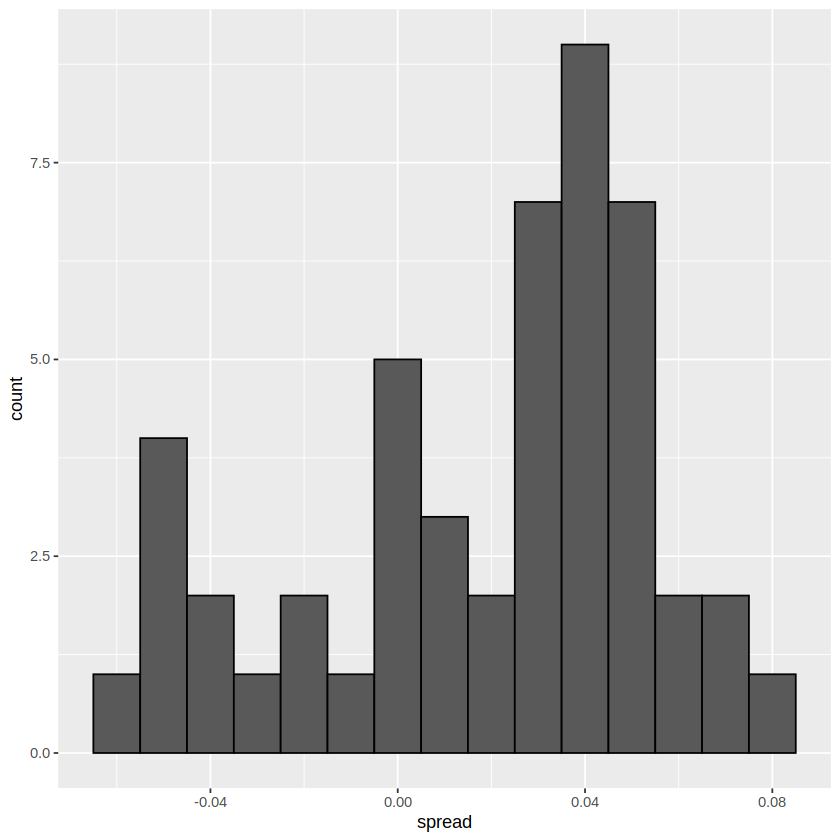

In [11]:
polls %>% ggplot( aes( spread) ) + geom_histogram( color="black", binwidth=.01 )

The data does not appear to be normally distributed, and the standard error appears to be larger than *0.0066*. The theory is not quite working here.

To see why, notice that various pollsters are involved, and some are taking several polls a week. Here's a table showing you how many polls each pollster took that las week.

In [12]:
polls %>% group_by( pollster ) %>% summarize( n() )

pollster,n()
<fct>,<int>
ABC News/Washington Post,7
Angus Reid Global,1
CBS News/New York Times,2
Fox News/Anderson Robbins Research/Shaw & Company Research,2
IBD/TIPP,8
Insights West,1
Ipsos,6
Marist College,1
Monmouth University,1


Let's visualize the data for the pollsters that are regularly polling. We write this piece of code that first filters for only pollsters that polled more than 6 times.

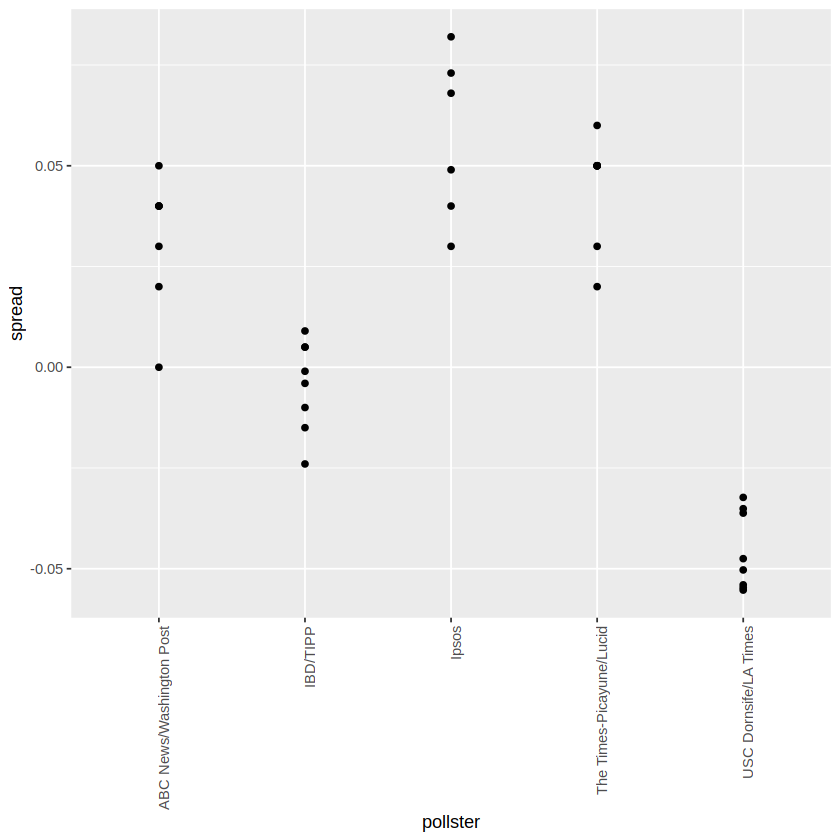

In [13]:
polls %>% group_by( pollster ) %>%
    filter( n() >= 6 ) %>%
    ggplot( aes( pollster, spread ) ) + geom_point() + 
    theme( axis.text.x=element_text( angle=90, hjust=1 ) )

This plot reveals an unexpected result. The *standard error*, predicted by theory for each poll. All the polls should have the same expected value, the actual spread, the spread we will see on election night.

FiveThirtyEight refers to these differences as *house effects*, we can also call them **pollster bias**.

For each pollster, let's collect their last reported result before the election, we use this piece of code:

In [14]:
one_poll_per_pollster <- polls %>% 
                            group_by( pollster ) %>%
                            filter( enddate==max(enddate) ) %>%
                            ungroup()
one_poll_per_pollster

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.0,NA,45.20163,41.72430,4.626221,NA,0.0400
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.0,NA,42.02638,38.81620,6.844734,NA,0.0300
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.0,NA,49.02208,43.95631,3.057876,NA,0.0400
U.S.,2016-11-02,2016-11-06,CBS News/New York Times,A-,1426,lv,45.00,41.00,5.0,NA,45.11649,40.92722,4.341786,NA,0.0400
U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44.00,40.00,6.0,NA,43.58576,40.77325,5.365788,NA,0.0400
U.S.,2016-11-04,2016-11-07,IBD/TIPP,A-,1107,lv,41.20,42.70,7.1,NA,42.92745,42.23545,6.316175,NA,-0.0150
U.S.,2016-11-04,2016-11-06,Selzer & Company,A+,799,lv,44.00,41.00,4.0,NA,44.21714,40.57082,4.068708,NA,0.0300
U.S.,2016-11-01,2016-11-04,Angus Reid Global,A-,1151,lv,48.00,44.00,6.0,NA,47.57171,43.68125,5.556625,NA,0.0400
U.S.,2016-11-03,2016-11-06,Monmouth University,A+,748,lv,50.00,44.00,4.0,NA,48.86765,43.39600,4.838600,NA,0.0600


The histogram of the data for these pollsters:

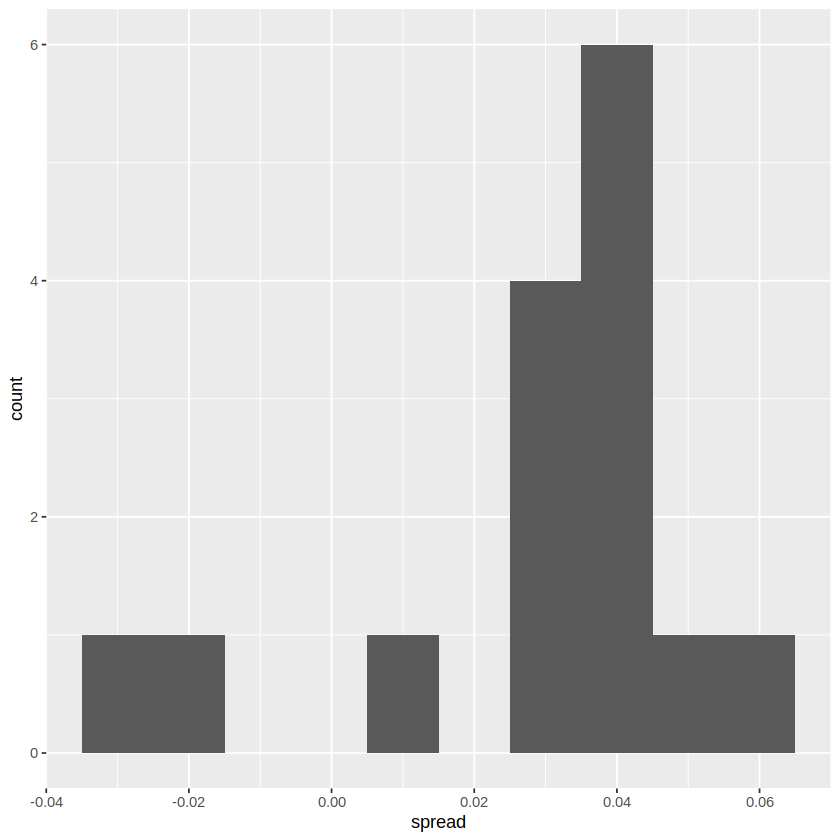

In [15]:
one_poll_per_pollster %>%
    ggplot( aes(spread) ) + geom_histogram( binwidth=0.01 )

In the previous sections, we saw that using the *urn model theory*  to combine these results might not be appropiate due to the pollster effect. Instead, we will model this spread data directly.

The new model can also be thought of as an urn model, although the connection to the urn idea is not as direct. Rather than having beads with zeros and ones inside the urn, now the urn contains poll results from all possible pollsterss.

* We assume that the *expected value* of our urn is the *actual spread*, which call *d = 2p-1*.
* Our run does not contain 0 and 1, but continuous numbers between *-1* and *1*, the *standard deviation* of the urn is no longer that $\sqrt{p(1-p)}$. 
* Now the *standard error* for our average includes the pollster-to-pollster variability. Our new urn also includes the sample varibility from the polling. In statistics textbooks, the Greek symbol $\sigma$ is used to represent this parameter, the *standard deviation*.

Now in summary, we have two unknown parameters:

* the *expected value d*, what we want to estimate.
* the *standard deviation*, $\sigma$.

Let's call to the observed values as $X_1,\ldots,X_N$, as a random sample from the urn. The **CLT** sitll works for the average of these values because it's an average of *independent random variables*.

For a large enough sample size *N*, the probability distribution of the sample average, which we'll call *X_bar*, is approximately normal, with expected value *d* and standard deviation $\sigma/\sqrt{N}$.

If we are willing to consider *N=15* large enough, we can use this to construct a confidence interval. A problem is that we don't know $\sigma$, but the theory tells us that we can estimate the urn model $\sigma$, the unobserved $\sigma$, with the sample standard deviation, which is defined like this with this mathematical formula.

$$
s = \sqrt{\frac{1}{N-1}\sum^N_{i=1}(X_i-\overline{X})^2}
$$

This makes $\sigma$ a better estimate of $\sigma$ than if we just divided by *N*.

Now the *sd* function in *R* computes the sample standard deviation.

In [17]:
sd( one_poll_per_pollster$spread )

[1] 0.02419369

So we can compute it for our data here with this sample line. And we get that it's *0.024*. Now we are ready to form a confidence interval based on our new *data-driven model*. We simply use the *central limit theorem* and create a *confidence interval* using this code:

In [18]:
results <- one_poll_per_pollster %>%
                summarize( avg=mean(spread), se=sd(spread)/sqrt( length(spread) ) ) %>%
                mutate( start=avg - 1.96*se, end=avg + 1.96*se )
round( results*100, 1 )

avg,se,start,end
<dbl>,<dbl>,<dbl>,<dbl>
2.9,0.6,1.7,4.1


That's our 95\% confidence interval using now our data-driven model.

Now, are we now ready to declare a probability of Clinton winning as the pollsters do? Not yet. In our model, *d* is a fixed parameter, so we can't talk about probabilities. To provide probabilities, we'll need to learn something new. We're going to have to learn about ***Bayesian statistics***.




### Exercises Section 4 


#### Exercise 1: Heights revisited 


We have been using *urn models* to motivate the use of probability models. However, most data science applications are not related to data obtained from urns. More common are data that com from individuals. Probability plays a role because the data come from a random sample. The random sample is taken from a population and the urn serves as an anlogy for the population.

Let's revisit the heights dataset. For now, consider *x* to be the heights fo all males in the dataset. Mathematically speaking, *x* is our population. Using the urn analogy, we have an urn with the values of *x* in it.

**Instructions**

* Execute the lines of code that create a vector *x* that contains heights for all males in the population.
* Calculate the *average* of *x*.
* Calculate the *standard deviation* of *x*.

Load the *dslabs* package and data containded in *heights*

In [1]:
my_packages <- c( "dslabs", "tidyverse", "ggplot2" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )
library( ggplot2 )

data( heights )
head( heights, 5 )

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,sex,height
,<fct>,<dbl>
1,Male,75
2,Male,70
3,Male,68
4,Male,74
5,Male,61


Make a vector (*x*) of heights from all males in the population

In [2]:
x <- heights %>%
        filter( sex=="Male") %>%
        .$height

Calculate the population average. Print this value

In [3]:
X_hat <- mean( x )
print( X_hat )

[1] 69.31475


Calculate the population standard deviation. Print this value.

In [4]:
s <- sd( x )
s

[1] 3.611024



#### Exercise 2: Sample the population of heights 


Call the population average computed above $\mu$ and the standar deviation $\sigma$. Now take a sample of size 50, with replacement, and construct an estimate for $\mu$ and $\sigma$.

**Instructions**

* Use the *sample* function to sample *N* values from *x*.
* Calculate the *mean* of the sample hights.
* Calculate the *standard deviation* of the sample hights.

The vector of all male hights in our population, *x*, has already been loaded. You can examine the first six elements using *head*.

In [5]:
head( x )               # or head( x, 6 )

[1] 75 70 68 74 61 67

Use the *set.seed(1)* to make sure your answer matches the expected result after random sampling.

In [6]:
set.seed( 1 )

Define *X* as random sample from our population *x*

In [7]:
X <- sample( x, size=50, replace=TRUE )

Calculate the sample average and standard deviation. Print these values to the console

In [8]:
mu <- mean( X )
mu

sig <- sd( X )
sig

[1] 70.47293

[1] 3.426742



#### Exercise 3: Sample and Population Averages

What does the CLT tell us about the smple average and how it is related to $\mu$, the population average?.

**Instructions**

* It is identical to $\mu$
* It is a random variable with expected value $\mu$ and standard error $\sigma/\sqrt{N}$
* It is a random variable with expected value $\mu$ and standard error $\mu$
* It understimates $\mu$.

**Solution**:

It is a random variable with expected value $\mu$ and standard error $\sigma/\sqrt{N}$



#### Exercise 4: Confidence Interval Calculation.

We will use $\overline{X}$ as our **estimate** of the heights in the population from our sample size *N*. We know from previous exercises that the **standard estimate of our error**, $\overline{X} - \mu$, is $\sigma/\sqrt{N}$.

Construct a 95\% confidence interval for $\mu$.

**Instructions**

* Use the *sd* and *sqrt* functions to define the *stanadard error* **se**.
* Calculate the 95\% confidence intervals using the *qnorm* function. Save the lower and the upper confidence interval to a variable called **ci**.

The vector of all male heights in our population `x` has already been loaded for you. You can examine the first six elements using *head(x)*

In [9]:
head(x)

[1] 75 70 68 74 61 67

Use the *set.seed* function to make sure your answer matches the expected result after random sampling

In [10]:
set.seed(1)

Define *N* as the number of people measured, and *X* as a random sample from our population *x*.

In [11]:
N <- 50
X <- sample( x, N, replace=TRUE )

Define *se* as standard error of the estimate. Print this value of the console.

In [17]:
se <- sd(X)/sqrt(N)
se

[1] 0.4846145

In [19]:

ci <- c(mean(X) - qnorm(0.975)*se, mean(X) + qnorm(0.975)*se)

**Solution**: 

The solution first uses the head function to display the first six elements of the vector *x*, which contains the heights of all males in the dataset.

The *set.seed* function is used to ensure that the random sampling process is reproducible. This means that every time you run the code, you will get the same random sample.

The variable *N* is defined as *50*, which represents the number of people measured.

The *sample* function is used to draw a random sample of size *N* from the population *x*. The argument *replace = TRUE* means that the sampling is done with replacement, which means that the same individual can be selected more than once.

The *standard error* se is calculated by *dividing the standard deviation of the sample X by the square root of N*. The standard error is a measure of the statistical accuracy of an estimate, in this case, the mean height of the sample.

The *qnorm* function is used to calculate the 95% confidence interval for the population mean. The argument 0.975 is used because *the confidence interval is symmetric around the mean*, so you *want to exclude 2.5% of the distribution on each side (100% - 2.5% - 2.5% = 95%)*. The *qnorm* function *returns the z-score* that corresponds to the given percentile of the normal distribution.

The *confidence interval ci* is calculated by *subtracting and adding the product of the z-score and the standard error from the sample mean*. This gives the range of values that you can be 95% confident contains the true population mean.



#### Exercise 5: Monte Carlo Simulation for Heights

Now run a *Monte Carlo simulation* in which you compute *10,000* confidence intervals as you have just done. What proportion fo these intevals include $\mu$?.

**Instructions**

* Use the *replicate* function to replicate the sample code for *B=10000* simultaions. Save the results of the replicated code should complete the following steps: 
  1. Use the *sample* function to sample *N* values from *x*.
  2. Create an object called *interval* that contains the 95\% confidence interval for each of the samples. Use the same formula you used in the previous exercise to calculate this interval.
  3. Use the *between* function to determine if $\mu$ is contained within the confidence interval of that simulation.
* Finally, use the *mean* function to determine the proportion of results in *res* that contain $\mu$.


In [6]:
my_packages <- c( "dslabs", "tidyverse", "ggplot2" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )
library( ggplot2 )

data( heights )
head( heights, 5 )

x <- heights %>%
        filter( sex=="Male") %>%
        .$height

,sex,height
,<fct>,<dbl>
1,Male,75
2,Male,70
3,Male,68
4,Male,74
5,Male,61


1. Define *mu* ($\mu$) as the population average

In [7]:
mu <- mean( X )
print( paste( "population averge (mu): ", mu ) )

[1] "population averge (mu):  69.7733754645669"


2. Use the *set.seed(1)*.

In [8]:
set.seed( 1 )

Define *N* as the number of people measured

In [9]:
N <- 50

3. Define *B* as the number of times to run the model

In [10]:
B <- 10000

4. Define an object **res** that contains a logical vector for simulated intervals that contain *mu*.

In [13]:
res <- replicate( B, {
    X <- sample( x, N, replace=TRUE)
    interval <- mean(X) + c(-1,1)*qnorm(0.975)*sd(X)/sqrt(N) 
    between(mu, interval[1], interval[2] )
})
mean( res )

[1] 0.8569



#### Exercise 6: Visualizing Polling Bias

In this section, we used visualization to motivate the presence of pollster bias in election polls. Here we will examine that bias more rigorously. 

Let's consider two pollsters that conducted daily polls and look at national polls for the month before election. 

Is there a poll bias? Make a plot of the spreads for each poll.

**Instructions**

* Use *ggplot* to plot the spread for each of the two pollsters.
* Define the *x* and *y* axes using *aes()* within the *ggplot* function.
* Use *geom_boxplot* to make a boxplot of the data.
* Use *geom_point* to add data points to the plot.


In [14]:
my_packages <- c( "dslabs", "tidyverse", "ggplot2" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )
library( ggplot2 )

data( "polls_us_election_2016" )

These lines filter for the polls we want and calculate the *spread*.

In [35]:
polls <- polls_us_election_2016 %>%
                filter( pollster %in% 
                    c("Rasmussen Reports/Pulse Opinion Research", "The Times-Picayune/Lucid") &
                    enddate >= "2016-10-15" &
                    state == "U.S." ) %>%
                mutate( spread = rawpoll_clinton/100 - rawpoll_trump/100)


Make a **boxplot** with points of the *spread* for ach pollster.

notch went outside hinges. Try setting notch=FALSE.



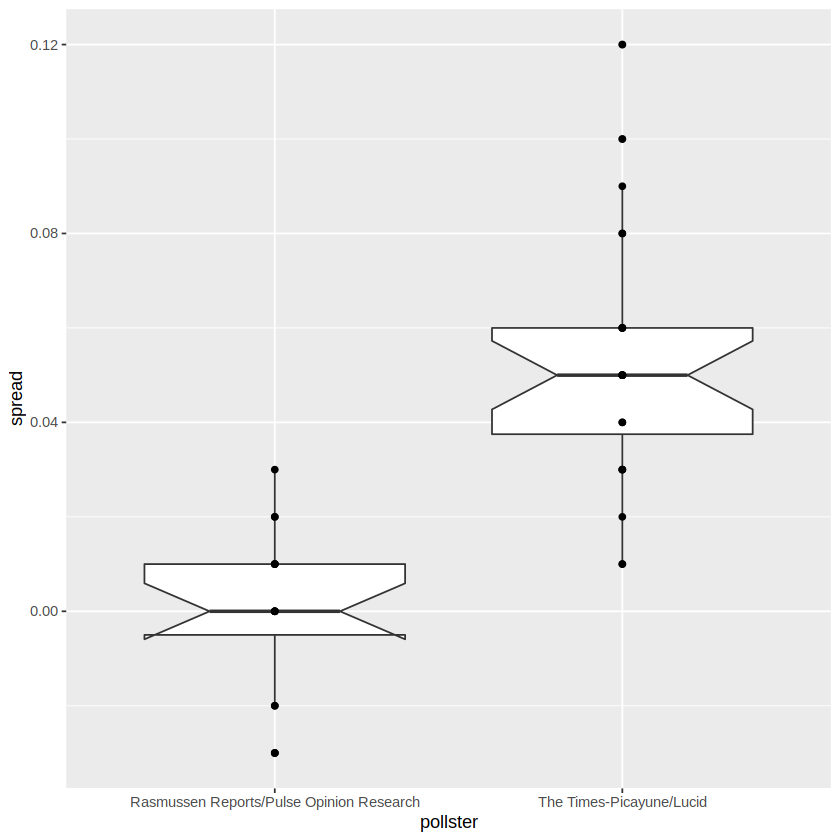

In [37]:
polls %>% ggplot( aes(pollster, spread) ) + 
            geom_boxplot(notch=TRUE) +
            geom_point()


**Solution explanation**

The solution first filters the data to include only the two pollsters specified in the exercise, "Rasmussen Reports/Pulse Opinion Research" and "The Times-Picayune/Lucid". It also filters the data to include only the polls that ended on or after October 15, 2016, and only the polls that were conducted in the U.S.

Then, it calculates the spread of each poll by subtracting the percentage of votes for Trump from the percentage of votes for Clinton. This is done using the mutate() function, which adds a new column to the data frame. The spread is calculated as rawpoll_clinton/100 - rawpoll_trump/100.

Next, the solution uses ggplot() to create a plot. The aes() function is used to define the x- and y-axes. The x-axis represents the pollster, and the y-axis represents the spread.

The geom_boxplot() function is then used to create a boxplot for each pollster. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Finally, the geom_point() function is used to add individual data points to the plot. This can help to visualize the distribution of the data and identify any outliers.





#### Exercise 7: Defining Pollster Bias

The data do seem to suggest there is a difference between the pollsters. However, these data are subject to varibility. Perhaps the differences we observe are due to chance. Under the urn model, both pollsters should have the same expected value: the election day difference, *d*.

We will model the observed data $Y_{ij}$ in the following way:

$$Y_{ij} = d + b_i + \epsilon_{ij}$$

with *i = 1,2* indexing the two pollsters, $b_i$ the bias for pollster *i*, and $\epsilon_{ij}$ poll to poll chance variability. We assume the $\epsilon$ are independent from each other, have expected value 0 and standard deviation $\sigma_i$ regardless of *j*.

Which of the following statements best reflects what we need to know to determine if our data fit the urn model?.

**Instructions**

* Is $\epsilon_{ij} = 0$?
* How close are $Y_{ij}$ to  *d*?
* Is $b_1\neq b_2$?
* Are $b_1 = 0$ and $b_2 = 0$.

**Solution**

$b_1\neq b_2$




#### Exercise 8: Derive Expected Value

We modelled the observed data $Y_{ij}$ as: $Y_{ij} = d + b_i + \epsilon_{ij}$. On the right side of this model, only $\epsilon_{ij}$ is a random variable. The other two values are constants.

What is the expected value of $Y_{ij}$?.

**Instructions**

* d + $b_1$ 
* $b_1 + \epsilon_{ij}$
* d
* d + $b_1 + \epsilon_{ij}$


**Solution** 

The expected value of the poll-to-poll variance is zero, and $b_1$ is a constant, then the solution is $d + b_1$.





#### Exercise 9: Expected value and estandard error of poll 1.

Suppose we define $\overline{Y_1}$ as the average of poll results from the first poll and $\sigma_1$ as the standard deviation of the first poll.

What is the expected value and standard error of $\overline{Y_1}$?.

**Instructions**

* The expected value is $d + b_1$, and the standard error is $\sigma_1$.
* The expected value is $d$, and the standard error is $\sigma_1/\sqrt{N_1}$.
* The expected value is $d + b_1$, and the standard error is $\sigma_1/\sqrt{N_1}$.
* The expected value is $d$, and the standard error is $\sigma_1 + \sqrt{N_1}$.


**Solution** 

The expected value includes the poll bias ($b_1$).

The expected value is $d + b_1$, and the standard error is $\sigma_1/\sqrt{N_1}$.




#### Exercise 10: Expected value and estandard error of poll 2.

Suppose we define $\overline{Y_2}$ as the average of poll results from the second poll and $\sigma_2$ as the standard deviation of the second poll.

What is the expected value and standard error of $\overline{Y_2}$?.

**Instructions**

* The expected value is $d + b_2$, and the standard error is $\sigma_2$.
* The expected value is $d$, and the standard error is $\sigma_2/\sqrt{N_2}$.
* The expected value is $d + b_2$, and the standard error is $\sigma_2/\sqrt{N_2}$.
* The expected value is $d$, and the standard error is $\sigma_2 + \sqrt{N_2}$.


**Solution** 

The expected value includes the poll bias ($b_2$).

The expected value is $d + b_2$, and the standard error is $\sigma_2/\sqrt{N_2}$.




#### Exercise 11: Difference in Expected values between polls.

Using what we learned by answering the previous questions,

What is the expected Value of $\overline{Y_2} - \overline{Y_1}$? 

**Instructions**

* $(b_2 - b_1)^2$
* $b_2 - b_1 / \sqrt{(N)}$
* $b_2 + b_1$
* $b_2 - b_1$


**Solution** 

$$\overline{Y_2}-\overline{Y_1} = d-b_2 - (d-b_1) = b_2-b_1$$



#### Exercise 12: Standard error of the difference between polls

Using what we learned by answering the previous questions,

What is the standard error of $\overline{Y_2} - \overline{Y_1}$? 

**Instructions**

* $\sqrt{\sigma^2_2/N_2 + \sigma^2_1/N_1}$
* $\sqrt{\sigma_2/N_2 + \sigma_1/N_1}$
* $\sigma^2_2/N_2 + \sigma^2_1/N_1$
* $\sigma_2/N_2 + \sigma_1/N_1$


**Solution** 

$$SE(\overline{Y_2}-\overline{Y_1}) = \sqrt{SE(\overline{Y_2})^2 + SE(\overline{Y_2})^2} = \sqrt{\frac{\sigma^2_2}{N_2} + \frac{\sigma^2_1}{N_1} }$$



#### Exercise 13: Compute the estimates

The answer to the previous question depends on $\sigma_1$ and $\sigma_2$, which we don't know. We learned that we can estimate these values using the sample standard deviation.

Compute the estimates of $\sigma_1$ and $\sigma_2$.

**Instructions**

* group the data by pollster.
* Summarize the standard deviation of the spreads for each of the two pollsters. Name the standard deviation as **s**.
* Store the pollster names and standard deviation of the spreads ($\sigma$) in an object called **sigma**.


In [1]:
my_packages <- c( "dslabs", "tidyverse", "ggplot2" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )
library( ggplot2 )

data( "polls_us_election_2016" )

polls <- polls_us_election_2016 %>%
                filter( pollster %in% 
                    c("Rasmussen Reports/Pulse Opinion Research", "The Times-Picayune/Lucid") &
                    enddate >= "2016-10-15" &
                    state == "U.S." ) %>%
                mutate( spread = rawpoll_clinton/100 - rawpoll_trump/100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [39]:
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-05,2016-11-07,The Times-Picayune/Lucid,NA,2521,lv,45,40,5,NA,45.13966,42.26495,3.679914,NA,0.05
2,U.S.,2016-11-02,2016-11-06,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,45,43,4,NA,45.56041,43.13745,4.418502,NA,0.02
3,U.S.,2016-11-01,2016-11-03,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,44,44,4,NA,44.66353,44.28981,4.331246,NA,0.00
4,U.S.,2016-11-04,2016-11-06,The Times-Picayune/Lucid,NA,2584,lv,45,40,5,NA,45.22830,42.30433,3.770880,NA,0.05
5,U.S.,2016-10-31,2016-11-02,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,42,45,4,NA,42.67626,45.41689,4.239500,NA,-0.03
6,U.S.,2016-11-03,2016-11-05,The Times-Picayune/Lucid,NA,2526,lv,45,40,5,NA,45.31041,42.34422,3.779955,NA,0.05


Create an object called **sigma** that contains a column for **pollster** and a column for *s*, the standard deviation of the spread.

The *group_by(pollster)* function is used to group the data by the pollster column. This means that the subsequent operations will be performed separately for each unique pollster.

The *summarize( s = sd(spread) )* function is then used to calculate the standadr deviation of the *spread* column for each group. The standard deviation is a measure of the amount of variation or dispersion in a set of values. The result is stored in a new column named *s*.

Finally, the result of these operations is stored in an object called **sigma**. This object contains a column for the pollster and a column for the standard deviation of the spread for each pollster.

The *sigma* object is then printed to the console to display the results. This shows the pollster names and the corresponding standard deviation of the spreads.

In [40]:
sigma <- polls %>%
            group_by(pollster) %>%
            summarize( s=sd(spread) )

sigma

pollster,s
<fct>,<dbl>
Rasmussen Reports/Pulse Opinion Research,0.01768945
The Times-Picayune/Lucid,0.02678078




#### Exercise 14: Probability Distribution of the Spread.

What does the *Central Limit Theorem* thell us about the distribution of the differences between the pollster averages, $\overline{Y}_2 - \overline{Y}_1$?.

**Instructions**

* The CLT cannot tell us anything because this difference is not the average of a sample.
* Because $Y_{ij}$ are approximately normal, the averages are normal too.
* If we assume $N_2$ and $N_1$ are large enough, $\overline{Y}_2$ and $\overline{Y}_1$, and their difference, are approximately normal.
* These data do not contain vectors of 1 and 1, so the CLT does not apply.


**Solution**

The probability distribution of a sample average $\overline{X}$ is approximately normal, with expected value $\mu$ and standard error $\frac{\sigma}{\sqrt{N}}$

we assume $N_2$ and $N_1$ are large enough, $\overline{Y}_2$ and $\overline{Y}_1$, and their difference, are approximately normal.



#### Exercise 15: Calculate the 95\% Confidence Interval of the Spreads

We have a constructed a random variable that has expected values $b_2-b_1$, the pollster bias difference. If our model holds, then this random variable has an approximately normal distribution. The standard error of this random variable depends on $\sigma_1$ and $\sigma_2$, but we can use the sample standard deviations we computed earlier.

We have everything we need to answer our initial question: *is $b_2-b_1$ differente from 0?*.

Construct a 95\% confidence interval for the difference $b_2$ and $b_1$. Does this interval contain zero?.

**Instructions**

* Create an object called **res** that summarizes the average, standard deviation, and number of polls for the two pollsters.
  * use pipes *\%>\%* to pass the data *polls* on to functions that will group by pollster and summarize the average *spreads*, *standard deviation*, and *number of polls per pollster*.
  * Calculate the estimate by subtracting the average spreads. Save this estimate to a variable called *estimate*.
* Store the *standard error* of the estimates as a variable called **se_hat**. Print this value to the console.
* Calculate the 95\% confidence interval of the spreads using the *qnorm* function. Save the lower and upper confidence interval to a variable called **ci**.

**Solution: code explaintaion** 

The solution first uses the group_by function to group the data by pollster. Then, it uses the summarize function to calculate the average spread (avg), standard deviation (s), and number of polls (N) for each pollster. This is stored in the res object.

Next, the solution calculates the estimate, which is the difference between the average spreads of the two pollsters. This is done by subtracting the average spread of the first pollster (res\$avg[1]) from the average spread of the second pollster (res\$avg[2]). The result is stored in the estimate variable.

The standard error of the estimate is then calculated. This is done by taking the square root of the sum of the squares of the standard deviations divided by the number of polls for each pollster. The result is stored in the se_hat variable.

Finally, the solution calculates the 95% confidence interval of the spreads. This is done by subtracting and adding the product of the standard error and the 97.5th percentile of the standard normal distribution (obtained using the qnorm function) from the estimate. The lower and upper confidence intervals are stored in the ci variable

In [41]:
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-05,2016-11-07,The Times-Picayune/Lucid,NA,2521,lv,45,40,5,NA,45.13966,42.26495,3.679914,NA,0.05
2,U.S.,2016-11-02,2016-11-06,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,45,43,4,NA,45.56041,43.13745,4.418502,NA,0.02
3,U.S.,2016-11-01,2016-11-03,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,44,44,4,NA,44.66353,44.28981,4.331246,NA,0.00
4,U.S.,2016-11-04,2016-11-06,The Times-Picayune/Lucid,NA,2584,lv,45,40,5,NA,45.22830,42.30433,3.770880,NA,0.05
5,U.S.,2016-10-31,2016-11-02,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,42,45,4,NA,42.67626,45.41689,4.239500,NA,-0.03
6,U.S.,2016-11-03,2016-11-05,The Times-Picayune/Lucid,NA,2526,lv,45,40,5,NA,45.31041,42.34422,3.779955,NA,0.05


In [50]:
res <- polls %>%
        group_by( pollster ) %>%
        summarize( avg=mean(spread), s=sd(spread), N=n() )
res

estimate <- res$avg[2] - res$avg[1]
print( paste( "                          Estimate = ", estimate ) )

se_hat <- sqrt( res$s[2]^2/res$N[2] + res$s[1]^2/res$N[1] )
print( paste( "                    Standard Error = ", se_hat ) )

ci <- c( estimate-qnorm(0.975)*se_hat, estimate+qnorm(0.975)*se_hat )
print( paste( "Confidence Interval of the spreads = (", ci[1], "," , ci[2], ")" ) )

pollster,avg,s,N
<fct>,<dbl>,<dbl>,<int>
Rasmussen Reports/Pulse Opinion Research,0.00062500,0.01768945,16
The Times-Picayune/Lucid,0.05291667,0.02678078,24


[1] "                          Estimate =  0.0522916666666667"
[1] "                    Standard Error =  0.0070314328344452"
[1] "Confidence Interval of the spreads = ( 0.0385103115514417 , 0.0660730217818916 )"




#### Exercise 16: Calculate the *P-value*

The confidence interval tells us there is relatively strong pollster effect resulting in a difference of about 5\%. Random variability does not seem to explain it.

Compute a *p-value* to relay the fact that chance does not explain the observed pollster effect.

**Instructions**

* Use the *pnorm* function to calculate the probability that  random value is larger than the observed ratio of estimate to the standard error.
* Multiply the probability by 2, because this is the two-tailed test.


We made and object **res** to summarize:

* the average, 
* standard deviation
* number of polls for the two pollsters.

In [3]:
res <- polls %>%
        group_by( pollster ) %>%
        summarize( avg=mean(spread), s=sd(spread), N=n() )
res

pollster,avg,s,N
<fct>,<dbl>,<dbl>,<int>
Rasmussen Reports/Pulse Opinion Research,0.00062500,0.01768945,16
The Times-Picayune/Lucid,0.05291667,0.02678078,24


The variables *estimate* and *se_hat* contain the *spread estimates* and *standard error*, respectively.

In [6]:
estimate <- res$avg[2] - res$avg[1] 
se_hat <- sqrt( res$s[2]^2/res$N[2] + res$s[1]^2/res$N[1] )

print( paste("                  Mean Estimate: ", estimate) )
print( paste("Standar Erorr estimate (se_hat): ", se_hat) )

[1] "                  Mean Estimate:  0.0522916666666667"
[1] "Standar Erorr estimate (se_hat):  0.0070314328344452"


In [8]:
p_value <- 2*(1-pnorm(estimate/se_hat, 0, 1))
print( paste("P-value: ", p_value) )

[1] "P-value:  1.03028696685215e-13"




#### Exercise 17: Comparing Within-Poll and Between-Poll Variability

We compute statistic called the **t-statistic** by dividing our estimate of $b_2-b_1$ by its *estimated standard error*:

$$\frac{\overline{Y}_2 - \overline{Y}_1}{\sqrt{ \frac{s^2_2}{N_2} + \frac{s^2_1}{N_1} }} $$

Later we learn will learn of another approximation for the distribution of this statistic for values of $N_2$ and $N_1$ that aren't large enough for the **CLT**.

Note that our data has more than two pollstrs. We can also test for pollster effect using all pollsters, not just two. The idea is to compare the varibility across polls to variability within polls.

We can constructu statistics to test for effects and approximate their distribution. The area of statistics that does this is called **Analysis of Variance** or **ANOVA**. We do not cover it here, but *ANOVA* provides a very useful set of tools to answer questions such as: is there a pollster effect?

Compute the average and standard deviation for each pollster and examine the variability across th averages and how it compares to the variability within the pollsters, summarize by the standard deviation.

**Instructions**

* Group the *polls* data by pollster.
* Summarize the avergage and standard deviation of the spreads for each pollster.
* Crate an object called **var** that constains three columns:
  * pollster
  * mean spread
  * standard deviation
* Be sure to name the column for mean *avg* and the column for standard deviation *s*.

Execute the following lines of code to filter the polling data and calculate the *spread*. With *n()* we can filter the data by pollsters with 5 or more polls.

The *ungroup()* function is always used after the *group()* command after performing calculations. If you forget to *ungroup* data, future data management will likely produce errors. **Always *ungroup* when you've finished with your calculations**.

In [11]:
polls <- polls_us_election_2016 %>% 
  filter(enddate >= "2016-10-15" &
           state == "U.S.") %>%
  group_by(pollster) %>%
  filter(n() >= 5) %>% 
  mutate(spread = rawpoll_clinton/100 - rawpoll_trump/100) %>%
  ungroup()

Create an object **var** that contains: pollster, mean spread, and standard deviation

In [13]:
var <- polls %>%
        group_by(pollster) %>%
        summarize( avg=mean(spread), s=sd(spread) )
var


pollster,avg,s
<fct>,<dbl>,<dbl>
ABC News/Washington Post,0.037333333,0.033904628
CVOTER International,0.027895455,0.017975499
Google Consumer Surveys,0.030280000,0.018476390
Gravis Marketing,0.016000000,0.015165751
IBD/TIPP,0.001047619,0.016832933
Ipsos,0.055272727,0.019464698
Morning Consult,0.041428571,0.014638501
Rasmussen Reports/Pulse Opinion Research,0.000625000,0.017689451
The Times-Picayune/Lucid,0.052916667,0.026780779




<hr/>

## Section 5: Bayesian Statistics


### Bayesian Statistics

As we discussed, in the *urn model*, *p* is a **fixed parameter**, and it does not make sense to talk about the probability of *p* being this or that.

With *Bayesian statistics* we assume it is in **fact random**, and then it makes sense to talk about probability.

Forecasters also use models to describe variability at different levels. For example:

* sampling variability (variabilidad de muestreo)
* pollster to pollster variability
* day to day variability
* election to election varibility

On of the most successful approaches used to describe these different levels of varibility are called **hierarchical models**. This models describe:

* variability at different levels
* incorpore all these levels into  a model for *estimating **p***.


### Bayes' Theorem



We start by reviewing *Bayes' theorem* using a *hypotetical cystic-fibrosis* test as an example.

Suppose a test for *cystic fibrosis* has an acurracy of 99\%. We will use the follogin notation to represent this.

$$\text{Prob}(+|D=1) = 0.99\;,\; \text{Prob}(-|D=0) = 0.99$$

We have written that the:
* *probability of a positive test given* that you *have the disease (D)* is equals 1, is **0.99**. 
* *probability of a negative test given* that you don't have the disease, *D* is equals 0, is **0.99**.

Suppose we select a random person and they test positive. What is the probability that they have the disease($\text{Prob}(D=1|+)$?. We write this as the *probability of D equals 1* given the test was positive.

The cystic fibrosis rate is *1 in 3,900* which implies that the probability that *D* is equals 1 is *0.00025*.

To answer this question, we'll use *Bayes' theorem*, which in general tells us that the *probability of event A happening given that event B happening is equal to the probability of them both happening divided by the probability of B happening*. That is express as:

$$Pr(A|B) = \frac{Pr(A\;\text{and}\;B)}{Pr(B)}$$

The numerator is split using the *multiplication rule*:

$$Pr(A|B) = \frac{Pr(B|A)Pr(A)}{Pr(B)}$$

This is going to be useful because sometimes we know the probability of A given B and not the probability of B given A.


Here is the *Bayes' theorem equation* applied to our *cystic-fibrosis* example:
$$
\begin{equation*}
    \begin{split}
    Pr(D=1|+) &= \frac{Pr(+|D=1)Pr(D=1)}{Pr(+)} \\
    &= \frac{Pr(+|D=1)\ast Pr(D=1)}{Pr(+|D=1)\ast Pr(D=1) + Pr(+|D=0)\ast Pr(D=0)}
    \end{split}
\end{equation*}
$$

The probability of *D=1* given a positive test is what we want to know. What we do know is the probability of a positive test given *D=1*.

<center><img src="images/sec05-01.png" width="60%" height="60%"/></center>

We also know the probability of a positive test given *D=0*. So now using *Baye's formula* we write out the equation. And we end up with a large fraction that includes quantiles that we know. And now we're going to plug in the values:

$$
\begin{equation*}
    \begin{split}
    Pr(D=1|+) &= \frac{Pr(+|D=1)Pr(D=1)}{Pr(+)} \\
    &= \frac{Pr(+|D=1)\ast Pr(D=1)}{Pr(+|D=1)\ast Pr(D=1) + Pr(+|D=0)\ast Pr(D=0)}\\
    &= \frac{0.99 \ast Pr(D=1)}{0.99\ast Pr(D=1) + Pr(+|D=0)\ast Pr(D=0)}\\
    &= \frac{0.99 \ast 0.00025}{0.99\ast 0.00025 + Pr(+|D=0)\ast Pr(D=0)}\\
    &= \frac{0.99 \ast 0.00025}{0.99\ast 0.00025 + 0.01\ast Pr(D=0)}\\
    &= \frac{0.99 \ast 0.00025}{0.99\ast 0.00025 + 0.01\ast 0.99975}\\
    &= 0.02
    \end{split}
\end{equation*}
$$

And now we have that probability is **0.02**, only a **2\% chance**. This say that despite the test having 99\% accuracy, the probability of having the disease given a positive test is only 2\%.

This may appera counterintuitive to some. But we're going to see how it makes sense. The reason this is the case is because we have to factor in the very rare probability, that a person chosen at random has the desease.

To illustrate this, we can use a Monte Carlo simulation. The following simulation is meant to help you visualize *Bayes' theorem*. We start:

* randomly selecting 100,000 people, *N=100,000*.
* disease in question has a 1:3,900 prevalence, so we set the prevalence to be **0.00025*.

In [1]:
prev <- 0.00025 
N <- 100000
outcome <- sample( c("Disease", "Healthy"), N, replace=TRUE, prob=c(prev, 1-prev) )

In [8]:
N_D <- sum( outcome == "Disease" )              # number with disease
N_H <- sum( outcome == "Healthy" )              # number healthy
print( paste("Disease: " ,  N_D) )
print( paste("Healthy: " ,  N_H) )

[1] "Disease:  35"
[1] "Healthy:  99965"


In [6]:
# for each person, randomly determine if thest is + or -
accuracy <- 0.99
test <- vector( "character", N )
test[outcome == "Disease"] <- sample( c("+","-"), N_D, replace=TRUE, prob=c(accuracy,1-accuracy) )
test[outcome == "Healthy"] <- sample( c("-","+"), N_H, replace=TRUE, prob=c(accuracy,1-accuracy) )

In [7]:
table( outcome, test )

         test
outcome       -     +
  Disease     2    33
  Healthy 98961  1004




#### Bayes in practice


We're going to show you a baseball example. Jose Iglesias is a professional baseball player. In April 2013, he had been to *bat 20 times* and he had *nine hits*, which is an *average of 0.450 ($\frac{9}{20}$)*. This average of *0.450* means Jose had been successful *45\%* of the times he had batted, which is rather high historically speaking, that no one has finished a season with an average of *0.400* or more since Ted Williams did it in 1941.

To illustrate the way hierarchical models are powerful, we will try to predict Jose's batting average at the end of the season.

* In a typical season, players have about **500** at bats.

With the techinique we have learned up to now, referred to as *frequentist statistics*, the best we can do is provide a *confidence interval*. We can think of outcomes for hitting as a *binomial with a success rate of p*. 

If the success rate is indeed *0.450*, the *standard error* of just *20 at bats* can be computed as:

$$\sqrt{ \frac{ 0.450(1-0.450)}{20} } = 0.111$$

We can use this construct a 95\% confidence interval, which will be from *0.228* to *0.672*. This prediction has two problems:

1. It's very large, so it's not very useful.
2. It's centered at *0.450*, which implies that our best guess is that this relatively unknown player will break Ted Williams' longstanding record.

If you follow baseball, the last statement will seem wrogn. You're implicitly using the hierarchical model that factors in information from years of following baseball.

How we can quantity this intuition? 

Let's explore the distribution of batting averages for all players with more than *500 at bats* during seasons 2010, 2011, and 2012.
Here are the histrograms.
   <center><img src="images/sec05-02.png" width="600" height="300" /></center>
Note that the average player had an *average* of *0.275*, and *standard deviation* of the population of all these players was *0.027*. So we can see already that *0.450* would be quit an anormaly, since it is over six standard deviations away from the average.

#### Key points



* The techniques we have used up until now are referred to as *frequentist statistics* as they consider only the *frecuency outcomes* in a dataset and do not include any outside information.
* Frequenctist statistics can have problems when sample sizes are small and whn the data are extreme compared to historical results.
* Bayesian statistics allow prior knowleged to modify observed results, which alters our conclusions about event probabilities.



## Hierearchical Model



This model provides a mathematical description of *how we come to see the observation* of *0.450*:

1. we pick a player at random with an instrinsic ability, summarize by the proportion of times they will actually be successful (*p*).
2. we see 20 random outcomes with success probability *p*.

We use a model to represent two levels of variabitlity in our data. 

1. Each player is assigned a natural ability to hit a birth, you can think of it that way. We will use a symbol, *p*, to represent this ability.
   You can think of *p* as a batting average you would have converged to if this particular player batted over and over and over and oever again.
   
   Based on the plots, we assume that *p* has a normal distribution. If we just pick a player at random, the random variable *p* will have a normal distribution.
   
   We also know that:
   * *expected value* is about *0.270*
   * *standard error* is *0.027*
  
2. This leve of variability has to do with luck. Regardless of how good or bad a playes is, sometimes you have bad luck, and sometimes you have good luck when you're batting. At each at bat, this player has a probability of success, *p*.

    If we add up these successes and failures as 0's and 1's, then the **CLT** tells us that the observed average, let's call it *Y*, has a normal distribution will *expected value* *p* and *standard error* square root of *p* times 1 minus *p*, divided by *N*, *N* is a number of a bats.

Statistical textbooks will write the model like this, we are going to use a *tilde* to denote the distribution of something:

$$p \; \sim\; N(\mu,\tau)$$

describes reandomness in picking a player. This random variable has a distribution that is normal with respected value $\mu$ and standard error $\tau$.


Now we describe the distribution at the next level. So the distribution of the observed batting *average Y*, given that this player *has a talent p*, is also normally distributed with *expected value p* and a *standard error $\sigma$*.

$$Y\, |\, p\;\sim\, N(p,\sigma)$$

this describes the randomness in the performance of this particular player.

In our case:

* $\mu = 0.270$.
* $\tau= 0.027$.
* $\sigma^2 = p(1-p)/N$

Because there are two levels, we call these hierarchical models:

1. The player to player ability. In a *Bayesian framework* this level is called **prior distribution**
2. The variability due to luck when batting. In a *Bayesian framework* is called the **sampling distribution**.

Now, let's use this model for *Jose's data*. Supposse we want to predict *his innate ability in the form of his true batting average p*. This would be the hierarchical model for our data.

* $p\,\sim\,N(0.275, 0.027)$
* $Y\,|\,p\,\sim\,N(p,0.111)$, we don't know what *p* is, we're trying to estimate it.

We now are ready to compute what is called a *posterior distribution* to summarize our prediction of *p*. What Bayesian statistics lets us do is compute the probability distribution of *p* given that we have observed data *Y*, **posterior distribution**.

There is a continuous version of *Bayes' rule* that lets us compute the posterior distribution in case like this, where the distribution is continuous distribution. We can use this to derivate a posterior probability function for *p*, assuming that we have observed *Y* equals, for example, little *y*.

In our case, we can show that this posterior distribution follows a normal distribution with expected value given by this formula.

$$
\begin{equation*}
    \begin{split}
    E(p\,|\,y) &= B\mu + (1 - B)Y \\
    &= \mu + (1 - B)(Y - \mu) \\
    B &= \frac{\sigma^2}{\sigma^2 + \tau^2}
    \end{split}
\end{equation*}
$$

Note that this is a weighted average between $\mu$, average for all baseball players, and *Y*, what we have observed for Jose. So:

* If $B=1$. So *B*, the weight, is going to be closer to 1 when $\sigma$ is large. And, when is $\sigma$ large?. $\sigma$ is large when the *variance*, when the *standard error*, of our observed data is large. When **we don't trust our observed data** too much, $\sigma$ is large; so we make *B=1*. This would mean that we're just saying Jose is just an average player, so we're going to predit $\mu$.
* If $B=0$. If the $\sigma$ is very very small, this means that **we really do trust our data Y**, and we would be saying forget the past and predict *Y*, we're going to predict that Jose is what he is, what we've observed. His average is **0.450**. *B* is somewhere in the middle, so we get something in the middle. This weighted average is sometimes referred to as *shrinking*, because it shrinks the observed *Y* towards a prior mean, which in this case is $\mu$. We shink the observed data towards what the average player is, $\mu$.

In the case of *Jose Iglesias* we can fill in those numbers and get that the expected value for the posterior distribution is 0.285:

$$
\begin{equation*}
    \begin{split}
    E(p\,|\,Y = 0.450) &= B\ast 0.275 + (1 - B)\ast 0.450 \\
    &= 0.275 + (1 - B)(0.450 - 0.275) \\
    B &= \frac{0.111^2}{0.111^2 + 0.027^2} = 0.944 \\
    \\
    \\
    E(p\,|\,Y = 0.450) &\approx 0.285
    \end{split}
\end{equation*}
$$

The expected value for *p*, 0.285, it's a number between the 0.450 that we saw and the 0.270 that we've seen historically for the average player.

The standard error can also be computed. We used mathematics to do this. This is the formula for the **standard error** of the **posterior distribution**.

$$
SE(p\,|\,Y)^2 = \frac{1}{1/\sigma^2 + 1/\tau^2} = \frac{1}{1/0.111^2 + 1/0.027^2} = 0.00069
$$

The **standard deviation** is $\sqrt{0.00069} = 0.026$.


So we started with a **frequentist** 95\% confidence interval, that ignored data from other players from the past, and simply summarized Jose's data as $0.450 \pm 0.220$.

Then we use a **Bayesian approach** that incorporated data from the past, from other players, and obtained a **posterior probability**.

We should point out that this is actually referred to as *an empirical Bayesian approach*. In a *tradicional Bayesian approach*, we simply state the prior. In an *empirical Bayesian approach*, we use data to contruct the prior.

Using the posterior distribution, we can report what is called a 95\% credible interval. This is a region centered at the expected value with a 95\% chance of ocurring. Remember that *p* is now random, so we can talk about the chances of *p* happening, falling here or falling there.

In our case, we can construct this by adding twice the standard error to the expected value of the posterior distribution:
$$E(p\,|\,Y)\,\pm\, 2SE(p\,|\,Y)\; \implies\; 0.285\,\pm\,0.052$$

Note that the Bayesian approach is giving us a prediction that is much lower than the 0.450.



The Bayesian credible interval suggest that if anoterh team that is ignoring past data is impressed by the 450, the 0.450 observation, we should consider trading Jose as the probably overvalue, if we trust our new predicion that is predicting that the will be just slightly above average.

The *Red Sox* traded Jose Iglesias to the *Detroit Tigers* in July 2013. Let's look at his batting average for the next five months.

<center><img src="images/sec05-03.png" width=250 height=150/></center>



If we take April out, his batting average for the rest of the season was *0.293*. The *Bayesian credible interval* provided a much more precise prediction.




### Exercises Section 5


#### Exercise 1: Statistics in the Courtroom



In 1999 in England Sally Clark was found guilty of the murder of two of her sons. Both infants were found dead in the morning, one in 1996 and another in 1998, and she claimed the cause of death was sudden infant death syndrome (SIDS). No evidence against her was the testimony of Professor Sir Roy Meadow, who testified that the chances of two infants dying of SIDS was 1 in 8,500 and the calculating that the chance of two SIDS cases was $8,500 x 8,500 \approx 73$ million.

Based on what we've learned throught this course, which statement best describe a potential flaw in Sir Meadow's reasoning?

**Possible answers**

* Sir Meadow assumed the second death was independent of the first son being affected, thereby ignoring possible genetic causes.
* There is no flaw. The multiplicative rule always applies in this way: *Pr(A and B) = Pr(A)Pr(B)*.
* Sir Meadow should have added the probabilities: *Pr(A and B) = Pr(A) + Pr(B)*.
* The rate of SIDS is too low to perform these types of statistics.

**Solution**

**There is no flaw. The multiplicative rule always applies in this way**



#### Exercise 2: Recalculating the SIDS statistics


Let's assume that there is in fact a genetic component to SIDS and the probability of *Pr(second case of SIDS | firts case of SIDS) = 1/100*, is much higher than 1 in 8,500.

What is th probability of both of Sally Clark's sons dying of SIDS?

**Instructions** 

* Calculate the probability of both sons dying to SIDS.
* The multiplicative rule applies here.

In [1]:
Pr_1 <- 1 / 8500                        # define the probability of the first son dying of SIDS
Pr_2 <- 1 / 100                         # define the probability of the second son dying of SIDS

Pr_1 * Pr_2

[1] 1.176471e-06

The solution calculates the probability of both sons dying of SIDS by multiplying the individual probabilities of each son dying of SIDS.

In the code, Pr_1 is defined as the probability of the first son dying of SIDS, which is 1 out of 8500. This is represented as 1/8500 in the code.

Similarly, Pr_2 is defined as the probability of the second son dying of SIDS, which is 1 out of 100. This is represented as 1/100 in the code.

The probability of both sons dying of SIDS is calculated by multiplying Pr_1 and Pr_2. This is because in probability theory, the probability of two independent events both occurring is the product of the probabilities of each event occurring individually.

The result of this multiplication is printed to the console. This is the solution to the exercise.



#### Exercise 3: Bayes' Rule in the Courtroom


Many press reports stated that the expert claimed the probability of Sally Clark being innocent as 1 in 73 million. Perhaps the jury and judge also interpreted the testimony this way. This probability can be written like this:

<center>Pr(mother is murderer | two children found dead with no evidence of harm)</center>

**Possible answers**

* $\frac{ \text{Pr(two children found dead with no evidence of harm)Pr(mother is a murderer)} }{\text{Pr(two children found dead with no evidence of harm)}}$
* Pr(two children found dead with no evidence of harm)Pr(mother is a murderer)
* $\frac{ \text{Pr(two children found dead with no evidence of harm | mother is a murderer)Pr(mother is a murderer)} }{\text{Pr(two children found dead with no evidence of harm)}}$
* 1/8500

**Solution**

$\frac{ \text{Pr(two children found dead with no evidence of harm | mother is a murderer)Pr(mother is a murderer)} }{\text{Pr(two children found dead with no evidence of harm)}}$



#### Exercise 4: Calculate the probability


Assume that the probability of a murderer finding a way to kill her two children without leaving evidence of physical harm is:

<center>Pr(two children found dead with no evidence of harm | mother is murderer) = 0.50</center>

Assume that the murder rate among mothers is 1 in 1,000,000, *Pr(mother is a murderer) = 1/1000000*.

According to Baye's ruel, what is the probability of:

<center>Pr(mother is a murderer | two children found dead with no evidence of harm)</center>

**Instructions** 

* Use Bayes's rule to calculate the probability that the mother is a murderer, considering the rates of murdering mothers in the population, the probability that two siblings die of SIDS, and the probability that a murderer kills children without leaving evidence of physical harm.
* Print your result to the console.


In [2]:
Pr <- 1/8500
Pr <- 1/100

Pr_B <- Pr_1 * Pr_2                 # probability of both sons dying of SIDS
Pr_A <- 1/1000000                   # rate of mothers that are murderers
Pr_BA<- 0.50                        # probability that two children die without evidence of harm, given mother is a murderer

Define *Pr_AB* as the probability that a mother is murderer, given that two children died with no evidence of physical harm. Print this value.

$$Pr(AB) = \frac{ \text{prob two children die without evidence of harm} \ast \text{rate mothers that are murderers} }{ \text{probabilty both sons dying of SIDS} }$$

In [3]:
Pr_AB <- (Pr_BA * Pr_A)/Pr_B 
print( Pr_AB )

[1] 0.425




#### Exercise 5: Misuse of Statistics in the Courts


After Sally Clark was found guilty, the *Royal Statistical Society* issued a statement saying that there was **«no statistical basis»** for the expert's claim. They expressed concern at the **«misuse of statistics in the courts»**. Eventually, Sally Clark was acquitted in June 2003.

In addition to misuing the multiplicativ rule as we saw earlier, *what else did Sir Meadow miss?*.

**Possible answers**

* He made an arithmetic  error in forgetting to divide by the rate of SIDS in siblings.
* He did not take into account how rare it is for a mother to murder her children.
* He mixed up the numerator and denominator of Bayes' rule.
* He did not take into account murder rates in the population.

**Solution**

He did not take into account how rare it is for a mother to murder her children.



#### Exercise 6: Misuse of Statistics in the Courts


Florida is one of the most closely watched states in the U.S. election because it has many electoral votes and the election is generally close. Create a table with the poll spread results from Florida taken during the last days before the election using the sample code.

The **CLT** tells us that the average of these spreads is approximately normal. Calculate a spread average and provide an estimate of the standard error.

**Instruction**

* Calculate the average of the spreads. Call this average **avg** in the final table.
* Calculate an estimate of the standard error of the spreads. Call this standard error **se** in the final table.
* Use the **mean** and **sd** functions nested within **summarize** to find the average and standard deviation of the grouped *spread* data.
* Save your results in an object called **results**.

In [2]:
# load libraries
my_packages <- c( "dslabs", "dplyr" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( dplyr )
library( dslabs )

data( "polls_us_election_2016" )

Create an object **polls** that contains the spread of predictions for each candidate in Florida during the last polling days.

In [3]:
polls <- polls_us_election_2016 %>%
            filter( state=="Florida" & enddate >= "2016-11-04" ) %>%
            mutate( spread = rawpoll_clinton/100 - rawpoll_trump/100)
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Florida,2016-11-03,2016-11-06,Quinnipiac University,A-,884,lv,46.00,45.00,2.00,NA,46.44315,43.93999,2.098310,NA,0.0100
2,Florida,2016-11-02,2016-11-04,YouGov,B,1188,rv,45.00,45.00,NA,NA,47.07455,46.99468,NA,NA,0.0000
3,Florida,2016-11-01,2016-11-07,SurveyMonkey,C-,4092,lv,47.00,45.00,4.00,NA,45.59190,44.32744,1.692430,NA,0.0200
4,Florida,2016-11-06,2016-11-06,Trafalgar Group,C,1100,lv,46.13,49.72,2.43,NA,45.75904,46.82230,3.495849,NA,-0.0359
5,Florida,2016-11-05,2016-11-06,Opinion Savvy/InsiderAdvantage,C-,843,lv,48.40,46.40,3.00,NA,47.37976,45.68637,2.721857,NA,0.0200
6,Florida,2016-11-02,2016-11-06,Rasmussen Reports/Pulse Opinion Research,C+,525,lv,47.00,45.00,2.00,NA,47.55885,45.13673,2.418502,NA,0.0200


Create an object called **results** that has two columns containing the *average spread (**avg**)* and the *standard error (**se**)*. Print the results to the console.

In [4]:
results <- polls %>%
            summarize( avg=mean(spread), se=sd(spread)/sqrt(n()) )
results

avg,se
<dbl>,<dbl>
0.004154545,0.007218692




#### Exercise 7: The Prior Distribution


Assume a Bayesian model sets the prior distribution for Florida's election night *spread d* to be normal with *expected value $\mu$* and *standard deviation $\tau$*.

What are the interpretations of $\mu\;\text{ and }\;\tau$?.

**Possible answers**

* $\mu\;\text{ and }\;\tau$ are arbitrary numbers that let us make probability statements about *d*.
* $\mu\;\text{ and }\;\tau$ summarize what we would predict for Florida before seeing any polls.
* $\mu\;\text{ and }\;\tau$ summarize what we want to be true. We therefore set $\mu\;\text{ at 0.10 and }\;\tau\,\text{ at 0.01}$.
* The choice of prior has no effect on the Bayesian analysis.

**Solution**

$\mu\;\text{ and }\;\tau$ summarize what we would predict for Florida before seeing any polls.



#### Exercise 8: Estimate the Posterior Distribution


The **CLT** tells us that our *estimate of the spread*, $\hat{d}$, has a normal distribution with *expected value d* and *standard deviation $\sigma$*, which we calculated in a previous exercise.

Use the formula for the posterior distribution to calculate the expected value of the posterior distribution if we set:

* $\mu = 0$
* $\tau = 0.01$

**Instructions** 

* Define  $\mu\;\text{ and }\;\tau$.
* Identify which elements stored in the object **results** represnte $\sigma$ and *Y*.
* Estimate **B** using $\sigma$ and $\tau$.
* Estimate the posterior distribution using **B**, $\mu\, ,\text{ and }\, Y$.

Show the **results** object an examine *avg* and *se* of the spread. Next define $\mu\,\text{ and }\, \tau$

In [12]:
results

mu <- 0 
tau <- 0.01

print( paste("Values of \u03BC = ", mu, " and \u03C4 = ", tau) )

avg,se
<dbl>,<dbl>
0.004154545,0.007218692


[1] "Values of μ =  0  and τ =  0.01"


Define a variable called **sigma** that contains the standard error and a variable called **Y** that contains the average in object **results**.

In [17]:
sigma <- results$se
Y <- results$avg

Define a variable **B** using *sigma* and $\tau$. Print this value to the console.

In [18]:
B <- sigma^2 / (sigma^2 + tau^2)
B

[1] 0.342579

Calculate the expected value of the posterior distribution: $\mu + (1 - B) \ast (Y - \mu)$

In [20]:
mu + (1 - B) * (Y - mu)

[1] 0.002731286



#### Exercise 9: Standard Error of the Posterior Distribution


Compute the standard error of the posterior distribution.

**Instructions**

* Using the variables we have defined so far, calculate the standard error of the posterior distribution.
* Print this value to the console.

In [22]:
se <- sqrt( 1 / (1/sigma^2 + 1/tau^2) )
se

[1] 0.005853024



#### Exercise 10: Construct a credible interval


Using the fact that the posterior distribution is normal, create an interval that has a 95\% of occurring centered at the posterior expected value. Note that we call these credible intervals.

**Instructions** 

* Calculate the 95\% credible intervals using the *qnorm* function.
* Save the lower and upper confidence intervals as an object called **ci**. Save the lower confidence interfal first.

In [7]:
mu      <- 0
tau     <- 0.01
sigma   <- results$se
Y       <- results$avg
B       <- sigma^2 / (sigma^2 + tau^2)
se      <- sqrt( 1/(1/sigma^2 + 1/tau^2) )

Construct the 95\% credible interval. Save the lower and then the upper confidence interval to a variable called **ci**.

In [8]:
est <- B*mu + (1-B)*Y           # espected value of posterior distribution
est 

ci <- c( est - qnorm(0.975) * se, est + qnorm(0.975)*se )
ci

[1] 0.002731286

[1] -0.008740432  0.014203003



#### Exercise 11: Odds of Winning Florida

According to this analysis, what was the probability that Trump wins Florida?.

**Instructions** 

* using **pnorm** function, calculate the probability that the spread in Florida was less than 0.


In [11]:
exp_value <- est
exp_value

[1] 0.002731286

Using the standard error of the posterior distribution, the variable **se**. Now using **pnorm** function, calculate the probability that the actual spread was less than 0 (Trump's favor). Print this value.

In [13]:
pnorm( 0, exp_value, se )

[1] 0.3203769



#### Exercise 12: Change the Priors

We had set the prior variance to $\tau$ to *0.01*, reflecting that these races are often close. Change the prior variance to include values ranging from **0.005** to **0.05**, and observe how the probability of Trump winning Florida changes by making a plot.

**Instructions** 

* Create a vector of values of $\tau$'s by executing the sample code.
* Create a function using **function(){}** called **p_calc** that takes the value $\tau$ as the only argument, then calculates **B** from $\tau$ and **sigma**, and then calculates the probability of Trump winning, as we did in the previous exercise.
* Apply your *p_calc* function across all the values of $\tau$'s.
* Use the **plot** function to plot $\tau$ on the x-axis and the new probabilities on the y-axis.

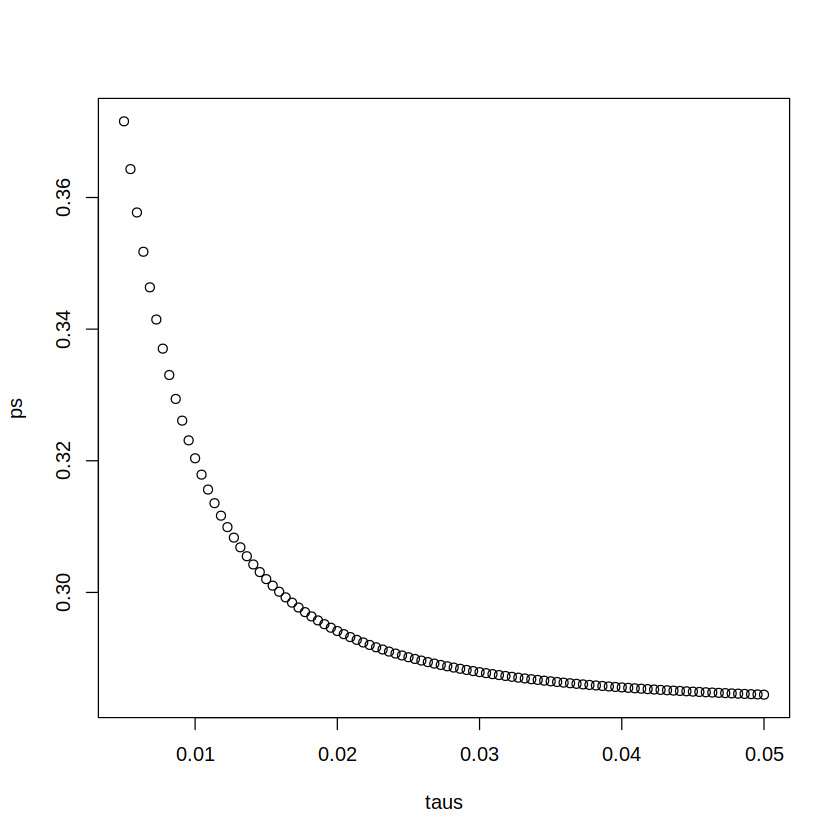

In [16]:
# define a variable tau's as different values of tau.
taus <- seq( 0.005, 0.05, len=100 )

# create a function p_calc
p_calc <- function( tau ){
    B <- sigma^2 /(sigma^2 + tau^2)
    se <- sqrt( 1/(1/sigma^2 + 1/tau^2) )
    exp_value <- B*mu + (1-B)*Y
    pnorm( 0, exp_value, se )
}

# create a vector called ps to apply the function pcalc across taus
ps <- p_calc( taus )

# plot taus on the x-axis and ps on the y-axis
plot( taus, ps )



<hr/>

## Section 6: Election Forecasting




Pollsters tend to make probabilistic statements about the result of the election. We show that for the 2016 election, *FiveThirtyEight* gave Clinton 81.4\% chance of winning the popular vote, and that happened. To do this, they used the *Bayesian approach*.

We assume a *hierarchical model* similar to the one we used to predict the performance of a baseball player. In this case, we write it like this:

* $d\,\sim\,N(\mu, \tau)$ describes our best guess had we not seen any polling data. *d*, the *spread*, is going to be assumed to come from a **normal distribution** with **expected value** $\mu$, and **standard error** $\tau$.
* $\overline{X}\,|\,d\,\sim\,N(d,\sigma)$ describes randomness due to sampling and the pollster effect. Once we collect data for a given *spread* and compute an **average**, we have that this is going to be *normally distributed* with **expected value** *d* and **standard error** $\sigma$.

A popular approach is to use what are called **fundamentals**, which are based on properties about the current economy and other factors that historically appear to have an effect in favor or againts an incumbent party. We don't use those here.

Instead we'll simply set $\mu\,=\,0$ which is interpreted as a model that simply does not provide any information on who will win. For *standard deviation*, we will use recent historical data that shows the winner of the popular vote has an *average spread* of about 3.5\% ($\tau\,=\,0.035$).

Now we can use the formulas for the **posterior distribution** for the parameter *d* that we previously learned to report the proobability of *d* being bigger than 0 given the observed poll data.

With the next code, we compute:

* *posterior mean*.
* *posterior standard error*.

In [3]:
# load libraries
my_packages <- c( "dslabs", "dplyr" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( dplyr )
library( dslabs )

data( "polls_us_election_2016" )

polls <- polls_us_election_2016 %>%
            filter(state == "U.S." & enddate >= "2016-10-31" &
                    (grade %in% c("A+", "A", "A-", "B+") | is.na(grade))) %>%
            mutate(spread = rawpoll_clinton/100 - rawpoll_trump/100)

one_poll_per_pollster <- polls %>% group_by(pollster) %>%
                            filter(enddate == max(enddate)) %>%
                            ungroup()

results <- one_poll_per_pollster %>%
            summarize( avg=mean(spread), se=sd(spread)/sqrt(length(spread)) ) %>%
            mutate( start=avg-1.96*se, end=avg+1.96*se )
results

avg,se,start,end
<dbl>,<dbl>,<dbl>,<dbl>
0.02898,0.006246784,0.0167363,0.0412237


In [3]:
mu <- 0 
tau <- 0.035
sigma <- results$se 
Y <- results$avg 
B <- sigma^2 / (sigma^2 + tau^2)

posterior_mean <- B*mu + (1-B)*Y 
posterior_se <- sqrt( 1/(1/sigma^2 + 1/tau^2) )

posterior_mean
posterior_se

[1] 0.02808534

[1] 0.006149604

We use the fact that the *posterior distribution* is also **normal**. So one thing we can do is report what is called a **credible interval**.  The *posterior mean* minus 1.96 times the *posterior standadr error* to the *posterior mean* plus 1.96 times the *posterior standard error* give us *interval that has a 95\% chance of occurring*.

The interval is now random. Here is that interval an this goes from  1.6% (0.016) to 4% (0.040).

In [4]:
posterior_mean + c( -1.96, 1.96 )*posterior_se

[1] 0.01603212 0.04013857

Now more interesting is to report the probability that *d* is bigger than 0, that we can compute using **pnorm**.

In [5]:
1 - pnorm( 0, posterior_mean, posterior_se )

[1] 0.9999975

This gives us a probability of almost 1 (0.9999 or 99.999\%). That's the probability that we're going to report for Clinton winning the popular vote.

This seems to be a little bit too overconfident. Also it is not agreement with *FiveThirtyEight's* 81.4\%. What explains this difference?

After elections are over, one can look at the difference between the pollsters' predictions and the actual results.

An important observation that our model does not account for is that it is common to see what is called a **general bias** that affects many pollsters in the same way. There is no good explanation for this; but we do observe it in historical data. One election the average of polls favors Democrats by 2\%. The next election they favor Republicans with 1\%. Than next there's no bias, then the next Republicans are favored are 3\%, and so on.

In 2016, the polls were biased in favor of the Democrats by about 1\% or 2\%. Althooug we now know this bias, before the election we had no way of knowing it.



### Mathematical representations of models



Suppose we are collecting data from one pollster, and we assume there's no general bias. The pollster collects several polls with a *sample size of N*. So we observe several measurements of the spread. Let's call it $X_1,\ldots,X_j$. 

The theory tells us that these random varibles have *expected value d*, and *standard error 2 times the square root of times 1 minus p divided by N* ($2\sqrt{p(1-p)/N}$).

We can represent this model mathematically like this:
$$X_j\,=\,d + \epsilon_j$$
where $\epsilon_j$ is called an **error term**. We use the *Greek latter epsilon* ($\epsilon$), that is the *Greek letter* for *e*, which is the first letter of **error**. With the index *j* we represent the different polls. And we define $\epsilon_j$ to be the *random variable that explains the poll to poll varibility* introduced by sampling error.


If *d = 2.1* and the sample size for these polls was, say, 2,000 we could simulate six data points from a model using this simple code.

In [6]:
J <- 6                  # number of polls
N <- 2000               # sample size
d <- 0.021              # expected value
p <- (d+1)/2            # probability
X <- d + rnorm( J, 0, 2*sqrt(p*(1-p)/N) )
X

[1] 0.0262578107 0.0254911797 0.0156984674 0.0179272179 0.0008949443
[6] 0.0466607562

Now, suppose we have six data points from five different pollsters. To represent this, we now need two indices, one for pollster and one for the polls each pollster takes. We're going to use $X_{i,j}$, with *i* representing the pollster and *j* representing the *jth* poll from a given pollster.

If we apply the same model, we would then write $X_{ij}$ equals *d* plus the *sampling error*.

$$X_{i,j}\,=\,d + \epsilon{i,j}$$

To simulate data, we now have to use a *loop*.


In [7]:
I <- 5 
J <- 6 
N <- 2000
X <- sapply( 1:I, function(i) {
    d + rnorm( J, 0, 2*sqrt(p*(1-p)/N) )
})
X

0.04637847,0.009798161,-0.005391443,0.028057182,0.014676407
0.01097092,0.079457059,0.004534961,0.053491558,0.001532668
0.02335050,0.027953575,0.013445634,0.038434180,0.027704807
0.02314476,0.016588586,0.059017422,0.028137555,0.022636070
0.04620471,0.047684537,0.013239041,0.030502092,0.036343718
0.01992808,-0.003710788,0.061829357,-0.003896172,0.029508560


This creates data for five different pollsters.

<center><img src="images/sec05-04.png" width=500 height=250></center>

Here is the simulated data. it does not really seem to capture an important feature of the actual data, which we can see here. The model does not account for pollster to pollster variability.

To fix this, we add a new term for the pollster effect. We're going to use $h_i$ to represent the *house effect for the ith pollster*. So now, the model looks like this.

$$X_{i,j}\,=\,d + h_i + \epsilon{i,j}$$

To simulate data for a specific pollster, we now need to draw an $h_i$ for each pollster and then add the *epsilons*. We can do this using this simulation.


In [8]:
I <- 5 
J <- 6 
N <- 2000
d <- 0.021
p <- (d + 1)/2
h <- rnorm( I, 0, 0.025 )
h

X <- sapply( 1:I, function(i) {
    d + h[i] + rnorm( J, 0, 2*sqrt(p*(1-p)/N) )
})
X

[1]  0.01500353  0.03514507  0.01322464 -0.01935901  0.02017788

0.001585256,0.06212937,0.026332184,0.005060288,0.01025887
0.033869672,0.06305544,-0.003116758,-0.010268670,0.05588482
0.038740917,0.08556959,0.009237930,0.006970236,0.02747253
0.033428492,0.05703497,0.022694281,-0.028355993,0.03274626
0.029850994,0.03579507,0.024292807,-0.012470152,0.04468324
0.035486699,0.08455959,0.023936530,0.001709308,0.05827599


<center><img src="images/sec05-05.png" width=500 heigh=250></center>

The simulated data now looks much more like the actual data, where each pollster has its own center. Note that $h_i$ is common to all the observed spreads from a specific pollster. Different pollsters have a different $h_i$, which explains why we can see the groups of points shfit up and down from pollster to pollster.

In the model, we assume the *average house effect* is 0.

We think that for every pollster that's biased in favor of one party, there's another that is favored in favor of the other, so it all averages out.

Historically, we see that every election has a general bias affecting all polls, as we said earlier. But if we were to collect historical data, we will see that the average of polls misses by more than models like the one we showed would predict.

To see this, we would take for each election year the average of polls and compare it to the actual value. We would see differences with standard deviations of between 2\% and 3\%. To incorporate this into the model, we can add yet another term that accounts for this general bias variability. So the model looks like this.

$$X_{i,j}\,=\,d + b + h_i + \epsilon_{i,j}$$

The *b* is modeled to have expected value 0. And again, based on historical data, we assume that the *standard error (se)* is about *0.025*

Because every single poll we observe that year has this general bias. Every single poll has the same value.

An implication for adding this term to the model, though, is that the *standard deviation* of $X_{i,j}$ is actually higher than what we earlier called sigma, which combines the pollster variability and the sample n-variability. We have to add the general bias variability. Since we add this, now we note that the sample average, which is shown here,

$$\overline{X} = d + b + \frac{1}{N}\sum^N_{i=1}X_i$$

implies that the *standard deviation* of $\overline{X}$ includes this term $\sigma_b$

$$\sqrt{\frac{\sigma^2}{N} + \sigma^2_b}$$

Because the same *b* is in every measurement, the average does not reduce its variance.

If we redo the *Bayesian calculation* taking this variability into account, we get a result much closer to *FiveThirtyEight*. We write the code again.

In [5]:
results

mu <- 0
tau <- 0.035
sigma <- sqrt( results$se^2 + 0.025^2 )
Y <- results$avg 
B <- sigma^2 / (sigma^2 + tau^2)

posterior_mean <- B*mu + (1-B)*Y
posterior_se <- sqrt( 1/(sigma^2 + 1/tau^2) )

1 - pnorm( 0, posterior_mean, posterior_se )


avg,se,start,end
<dbl>,<dbl>,<dbl>,<dbl>
0.02898,0.006246784,0.0167363,0.0412237


[1] 0.7043471

But now notice that the sigma includes the *0.025* squared ($\sigma_b = 0.025$). Once we do this, we get a probability of Clinton winning the popular vote of *81.7\%* much lower than the *99.999\%* again, because we're including the general bias variability.



### Predicting the Electoral College



In the United States, elections are not decided by the popular vote, but rather by what is called the electoral college. Each state and DC get a number of electoral votes that depend in a somewhat complex way on the population size of the state. Jere are the top five states ranked by electoral votes.

In [4]:
# load libraries
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

In [5]:
data( "polls_us_election_2016" )
results_us_election_2016


state,electoral_votes,clinton,trump,others
<chr>,<int>,<dbl>,<dbl>,<dbl>
California,55,61.7,31.6,6.7
Texas,38,43.2,52.2,4.5
Florida,29,47.8,49.0,3.2
New York,29,59.0,36.5,4.5
Illinois,20,55.8,38.8,5.4
Pennsylvania,20,47.9,48.6,3.6
Ohio,18,43.5,51.7,4.8
Georgia,16,45.9,51.0,3.1
Michigan,16,47.3,47.5,5.2


In [6]:
results_us_election_2016 %>%
    arrange( desc(electoral_votes) ) %>%
    top_n( 5, electoral_votes)

state,electoral_votes,clinton,trump,others
<chr>,<int>,<dbl>,<dbl>,<dbl>
California,55,61.7,31.6,6.7
Texas,38,43.2,52.2,4.5
Florida,29,47.8,49.0,3.2
New York,29,59.0,36.5,4.5
Illinois,20,55.8,38.8,5.4
Pennsylvania,20,47.9,48.6,3.6


With some minor exceptions, the electoral votes are won all or nothing. For example, if you win California by just one vote, you still get all of its 55 electoral votes. This means that by winning a few big states by a large margin, but losing many small states by a small margin, you can win the popular vote and lose the electoral college.

The idea behind this is to avoid a few large state having too much power and dominate the presidential election.

Now we are ready to predict the electoral college result for 2016. We start by aggregating results from polls taken during the last week before the election. We write this code to filter out the polls we don't want, *compute the spread*, and then *compute the average* and the *standard deviation* for each state.

In [7]:
results <- polls_us_election_2016 %>%
            filter( state != "U.S." & !grepl( "CD", state ) & 
                    enddate >= "2016-10-31" & 
                    (grade %in% c( "A+", "A", "A-", "B+" ) | is.na( grade ) ) ) %>%
            mutate( spread= rawpoll_clinton/100 - rawpoll_trump/100 ) %>%
            group_by( state ) %>%
            summarize( avg=mean(spread), sd=sd(spread), n=n() ) %>%
            mutate( state=as.character(state) )

10 closest races = battleground states:

In [11]:

head( results %>% arrange( abs(avg) ), 10 )

state,avg,sd,n
<chr>,<dbl>,<dbl>,<int>
Florida,0.003557143,0.01634960,7
North Carolina,-0.007300000,0.03062083,9
Ohio,-0.010416667,0.02522478,6
Nevada,0.016857143,0.04406809,7
Iowa,-0.019733333,0.04366478,3
Michigan,0.020950000,0.02026068,6
Arizona,-0.032644444,0.02695474,9
Pennsylvania,0.035333333,0.01160528,9
New Mexico,0.038933333,0.02255187,6


Here are the 10 closest races according to the polls already summarized. These are called the *battleground states*. We now introduce a command that we will learn more about in later videos called **left_join** function, and it will let us easily add the number of electoral votes for each state.

Note that some states have no polls. This is because a winner is pretty much known. No polls were conducted in DC, Rhode Island, Alaska, and Wyoming because the first two are sure to be Democrats and the last two Republicans.

In [12]:
results_us_election_2016 %>%
    filter( !state %in% results$state )

state,electoral_votes,clinton,trump,others
<chr>,<int>,<dbl>,<dbl>,<dbl>
Rhode Island,4,54.4,38.9,6.7
Alaska,3,36.6,51.3,12.2
Wyoming,3,21.9,68.2,10.0
District of Columbia,3,90.9,4.1,5.0


Joining electoral college votes and results. This code assigns a *standard deviation* to the states that had just one poll by substituting the missing value by the *median* of the *standard deviations* of all the other states:

In [13]:
results <- left_join( results, results_us_election_2016, by="state" )
head( results, 5 )

state,avg,sd,n,electoral_votes,clinton,trump,others
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
Alabama,-0.14943333,0.0253279161,3,9,34.4,62.1,3.6
Arizona,-0.03264444,0.0269547357,9,11,45.1,48.7,6.2
Arkansas,-0.15140000,0.0009899495,2,6,33.7,60.6,5.8
California,0.26010000,0.0387329317,5,55,61.7,31.6,6.7
Colorado,0.04520000,0.0294593505,7,9,48.2,43.3,8.6


Assigns *sd* to states with just one poll as **median** of other *sd* values:

In [14]:
results <- results %>%
                mutate( sd=ifelse(is.na(sd), median(results$sd, na.rm=TRUE), sd) )
head( results, 5 )

state,avg,sd,n,electoral_votes,clinton,trump,others
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
Alabama,-0.14943333,0.0253279161,3,9,34.4,62.1,3.6
Arizona,-0.03264444,0.0269547357,9,11,45.1,48.7,6.2
Arkansas,-0.15140000,0.0009899495,2,6,33.7,60.6,5.8
California,0.26010000,0.0387329317,5,55,61.7,31.6,6.7
Colorado,0.04520000,0.0294593505,7,9,48.2,43.3,8.6


We're going to use a *Monte Carlo simulation* to generate outcomes from simulated elections. Then we're going to use this to make *probability statements*.

For each state, we apply the *Bayesian approach*. We could construct the *priors* for each state based on recent history. We assign the same *prior* to each state, to  keep it simple. This prior is going to assume that we know nothing about what will happen. So the **expected value** will be **0**.

Because from election year to election year the results from specific state don't change that much, we will assign a **standard deviation** of **2\%**, $\tau = 0.02 \sim 2\%$. The Bayesian calculation looks like this:

In [19]:
mu <- 0 
tau <- 0.02 

head( results %>% mutate( sigma= sd/sqrt(n),
                    B = sigma^2 / (sd^2 + tau^2),
                    posterior_mean = B*mu + (1-B)*avg, 
                    posterior_se = sqrt( 1/(1/sigma^2 + 1/tau^2) ) ) %>%
            arrange( abs(posterior_mean) ), 10 )

state,avg,sd,n,electoral_votes,clinton,trump,others,sigma,B,posterior_mean,posterior_se
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Florida,0.003557143,0.01634960,7,29,47.8,49.0,3.2,0.006179569,0.05722543,0.003353584,0.005904164
North Carolina,-0.007300000,0.03062083,9,15,46.2,49.8,4.0,0.010206942,0.07788497,-0.006731440,0.009091428
Ohio,-0.010416667,0.02522478,6,18,43.5,51.7,4.8,0.010297974,0.10233459,-0.009350681,0.009155579
Iowa,-0.019733333,0.04366478,3,6,41.7,51.1,7.1,0.025209875,0.27552853,-0.014296237,0.015668150
Nevada,0.016857143,0.04406809,7,6,47.9,45.5,6.6,0.016656171,0.11845793,0.014860281,0.012798928
Michigan,0.020950000,0.02026068,6,16,47.3,47.5,5.2,0.008271386,0.08441241,0.019181560,0.007643504
Arizona,-0.032644444,0.02695474,9,11,45.1,48.7,6.2,0.008984912,0.07165957,-0.030305158,0.008195847
Pennsylvania,0.035333333,0.01160528,9,20,47.9,48.6,3.6,0.003868426,0.02798805,0.034344422,0.003798033
New Mexico,0.038933333,0.02255187,6,5,48.3,40.0,11.7,0.009206761,0.09329264,0.035301140,0.008363181


Note that estimates based on posteriors move the estimates towards 0, although the states with many polls are influenced less. You can see that in this plot.

<center><img src="images/sec05-06.png" width=500 height=250/></center>

Now we repeat this 10,000 election night results and generate an outcome from the posterior. In this code, we only keep the total number of electoral votes for Clinton. We add 7 because we have no polls for Rhode Island and DC, but we're sure that the Democrats will win those states.

In [22]:
mu <- 0 
tau <- 0.02 

clinton_EV <- replicate( 1000, {
    results %>% mutate( sigma=sd/sqrt(n),
                        B=sigma^2 / (sigma^2 + tau^2),
                        posterior_mean=(B*mu + (1-B)*avg),
                        posterior_se=sqrt(1/(1/sigma^2 + 1/tau^2)),
                        simulated_result=rnorm( length(posterior_mean), posterior_mean, posterior_se),
                        clinton=ifelse( simulated_result > 0, electoral_votes, 0)
                        ) %>%
                summarize( clinton=sum(clinton) ) %>%
                .$clinton+7
})


Votes required to win the election in 2016 was 269

[1] 0.996

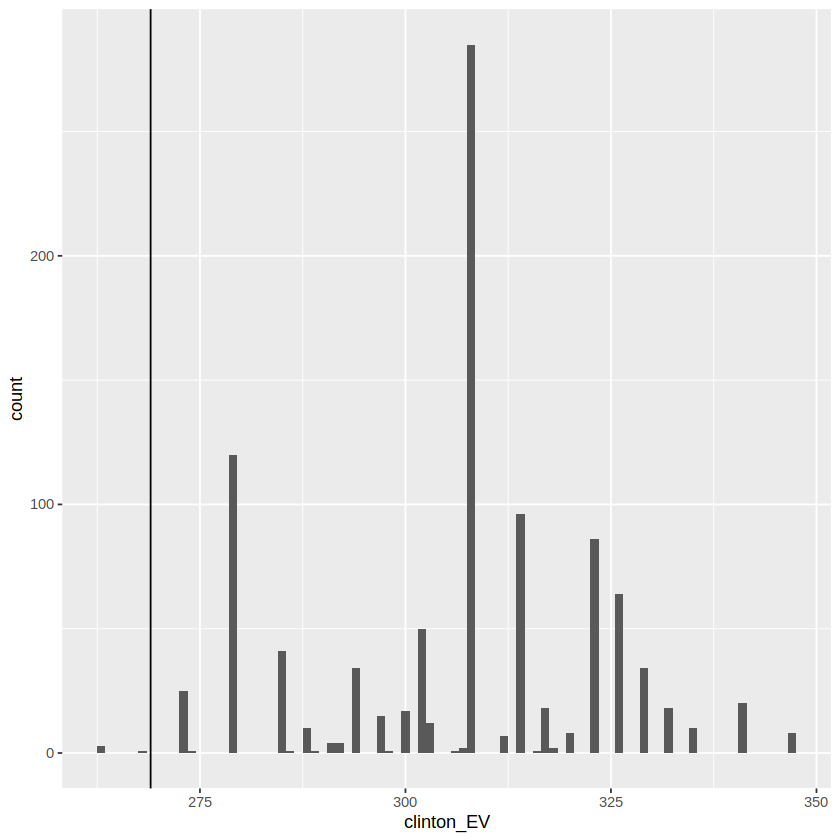

In [28]:
mean( clinton_EV > 269 )

data.frame( clinton_EV ) %>%
    ggplot( aes(clinton_EV) ) + 
    geom_histogram( binwidth=1 ) + 
    geom_vline( xintercept=269 )

Note that a similar prediction was made by the Princeton Election Consortium. We now know that that was quite off. So what happened?

The model that we just showed ignores the **general bias**. The general bias in 2016 was not that big it was between 1\% and 2\%. But because the election was close in several big states, and the large number of polls made the estimates of *standard error small*, by ignoring the variability introduced by the general bias, pollsters were overconfident of the polling data.

FiveThirtyEight, on the other hand, models the general bias in a rather sophisticated way and reported closer results.

We can simulate the results now using this *bias term*. For the state level, we're going to assume the general bias is larger. So we're going to set **sigma *b*** to be **0.03** ($\sigma_b = 0.03$). The code recomputes the Monte Carlo simulation, but accounting for the general bias.

[1] 0.83

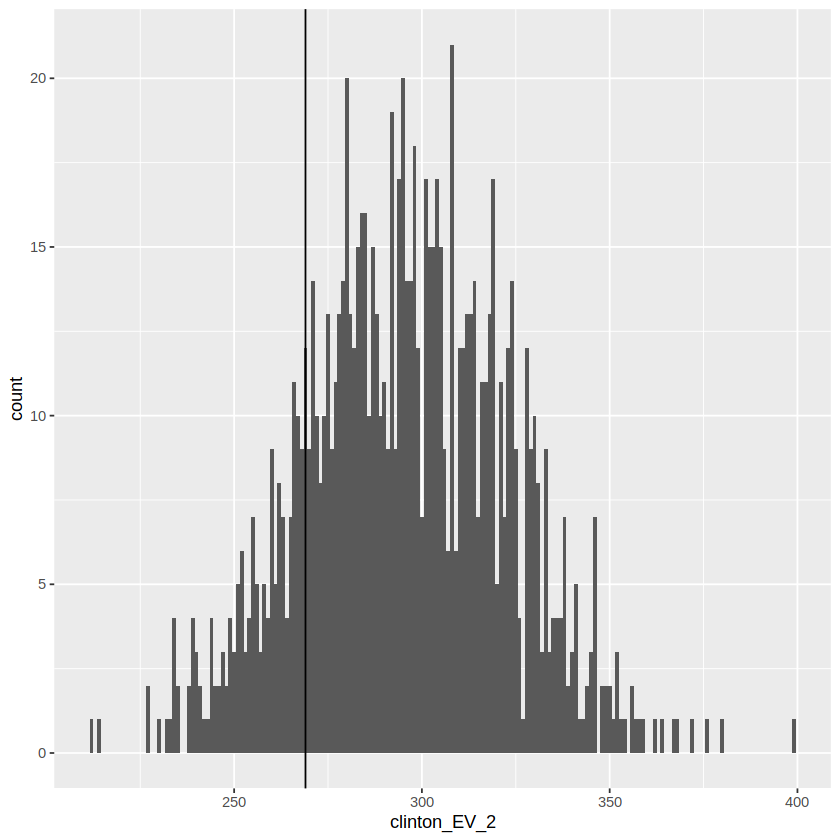

In [29]:
tau <- 0.02 
bias_sd <- 0.03

clinton_EV_2 <- replicate( 1000, {
    results %>% mutate( sigma=sqrt( sd^2/n + bias_sd^2 ),
                        B=sigma^2 / (sigma^2 + tau^2),
                        posterior_mean=(B*mu + (1-B)*avg),
                        posterior_se=sqrt(1/(1/sigma^2 + 1/tau^2)),
                        simulated_result=rnorm( length(posterior_mean), posterior_mean, posterior_se),
                        clinton=ifelse( simulated_result > 0, electoral_votes, 0)
                        ) %>%
                summarize( clinton=sum(clinton) ) %>%
                .$clinton+7
})

mean( clinton_EV_2 > 269 )

data.frame( clinton_EV_2 ) %>%
    ggplot( aes(clinton_EV_2) ) + 
    geom_histogram( binwidth=1 ) + 
    geom_vline( xintercept=269 )

When we do this, the probability of Clinton winning goes way down to 83\%. Looking at the outcomes of the simulation for these two approaches, we see how the *bias term* adds variability to the final results. You can see this in this plot.

<center><img src="images/sec05-07.png" /></center>



<hr/>

## Section 6: Election Forecasting (Pronóstico)



The predictions are adapted as new polls come out. An important question forecasters must ask is, how informative are polls taken several weeks before the election?

Here we study the variability of poll results across time. In our example, to mak sure that the variability we observe is not due to pollster effects, we're going to stick to just one pollster.

Using this code, we're going to look at Ipsos data.

In [2]:
# load libraries
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

data( "polls_us_election_2016" )

Select all national polls by on pollster, in this case **Ipsos**

In [4]:
one_pollster <- polls_us_election_2016 %>%
                    filter( pollster == "Ipsos" & state == "U.S." ) %>%
                    mutate( spread=rawpoll_clinton/100 - rawpoll_trump/100 )
head( one_pollster, 5 )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.0,39.0,6.0,NA,42.02638,38.81620,6.844734,NA,0.030
2,U.S.,2016-10-31,2016-11-04,Ipsos,A-,2244,lv,43.0,39.0,6.0,NA,43.12950,38.96855,6.757478,NA,0.040
3,U.S.,2016-10-30,2016-11-03,Ipsos,A-,2021,lv,43.2,38.3,5.9,NA,43.34223,38.39563,6.565732,NA,0.049
4,U.S.,2016-10-29,2016-11-02,Ipsos,A-,1922,lv,45.5,37.3,5.4,NA,45.64754,37.54281,5.964403,NA,0.082
5,U.S.,2016-10-28,2016-11-01,Ipsos,A-,1772,lv,44.7,37.4,5.3,NA,44.84936,37.84188,5.731620,NA,0.073


Since there's no pollster effect, perhaps the theoretical standard error will match the data-derived standard deviation. The observed **standard error (se)** is higher than theory predicts

In [6]:
se <- one_pollster %>%
        summarize( empirical=sd(spread), 
                    theoretical=(2*sqrt(mean(spread)*(1-mean(spread))/min(samplesize))) )
se

empirical,theoretical
<dbl>,<dbl>
0.04025194,0.03256719


Furthermore, the distribution of the data is not normal

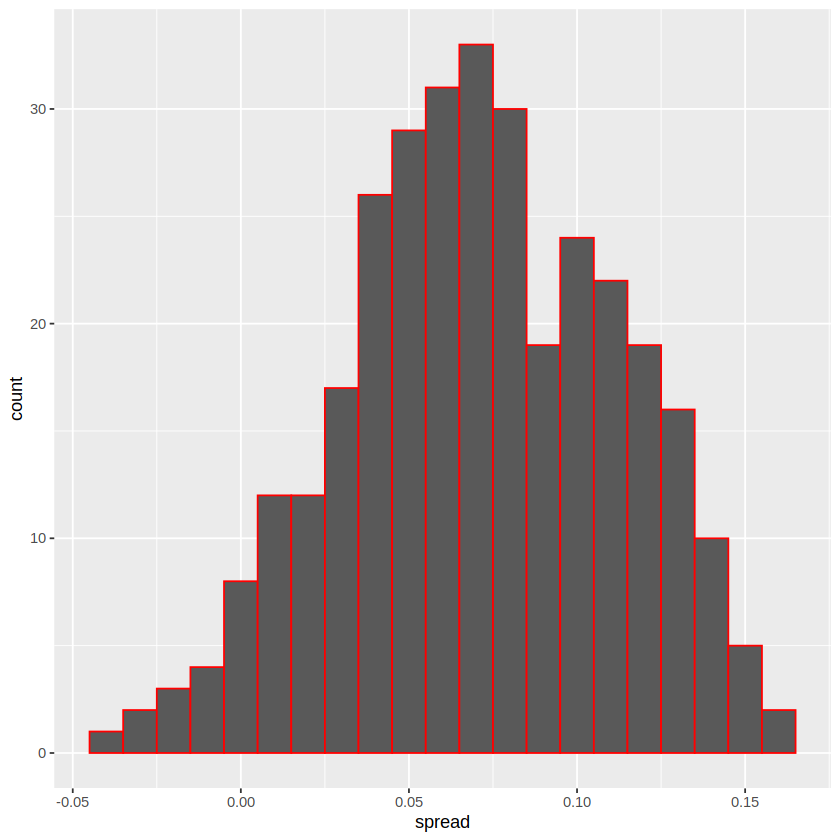

In [8]:
one_pollster %>%
    ggplot( aes(spread) ) + 
    geom_histogram( binwidth=0.01, color="red" )

Where is this extra variability coming from? This plot makes a strong case that the extra variability comes from time variation not accounted for by the theory, that assumes that *p* is fixed across time.

<center><img src="images/sec05-08.png" width=400 height=250/></center>

Some of the *peaks* and *valleys* we see coincide with events such as the party conventions, which tend to give the candidates a boost.

With this code we show the trend across time for several pollsters.

`geom_smooth()` using formula 'y ~ x'



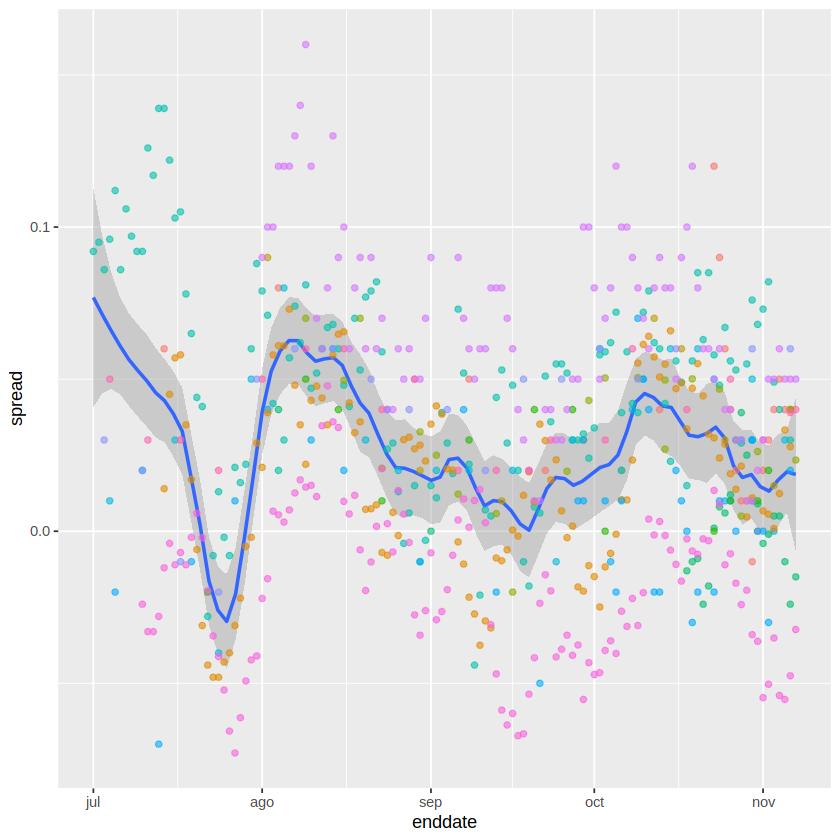

In [24]:
polls_us_election_2016 %>%
    filter( state=="U.S." & enddate >= "2016-07-01" ) %>%
    group_by( pollster ) %>%
    filter( n() >= 10 ) %>%
    ungroup() %>%
    mutate( spread=rawpoll_clinton/100 - rawpoll_trump/100 ) %>%
    ggplot( aes( enddate, spread ) ) + 
    geom_smooth( method="loess", span=0.1 ) + 
    geom_point( aes(color=pollster), show.legend=FALSE, alpha=0.6 )

This implies that if we're going to forecast, our model must include a term to model the time effect. We could write a model that includes a *bias term for time*. We just add the $b_t$ term that will account for the variability of changes through time. The *stanadard deviation (sd)* of $b_t$ would depend on time, since the closer we get to the election day, the smaller this variability should become.

Pollsters also try estimate trends. Let's call them *f(t)* here, the function *f of t*. They try to estimate them from the data and incorporate them into the predictions.

The blue lines in the plot are estimates of this *f(t)*. The model would then look like this:

$$Y_{ijt}\,=\,d + b + h_j + b_t + f(t) + \epsilon_{ijt}$$

In many pollsters' websites, we actually see the estimated *f(t)*, not for the difference but for the actual percentages for the two main candidates.


The following code will let you make a plot like that, which looks like this.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 22 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”


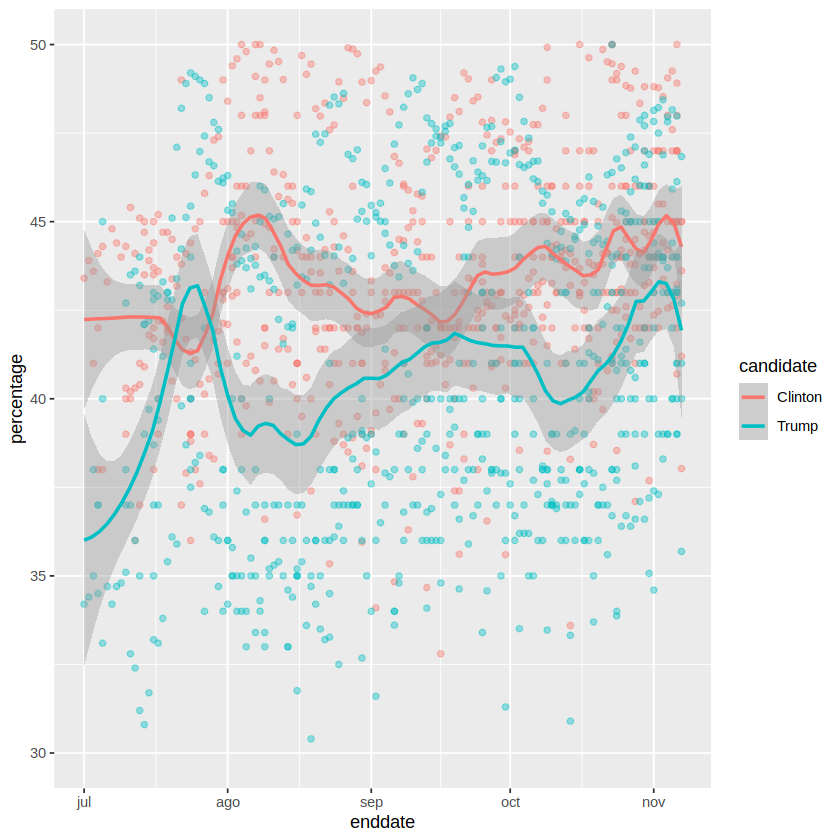

In [25]:
polls_us_election_2016 %>%
    filter( state=="U.S." & enddate >= "2016-07-01" ) %>%
    select( enddate, pollster, rawpoll_clinton, rawpoll_trump ) %>%
    rename( Clinton=rawpoll_clinton, Trump=rawpoll_trump ) %>%
    gather( candidate, percentage, -enddate, -pollster ) %>%
    mutate( candiadte=factor( candidate, levels=c("Trump","Clinton")) ) %>%
    group_by( pollster ) %>%
    filter( n() >= 10 ) %>%
    ungroup() %>%
    ggplot( aes( enddate, percentage, color=candidate ) ) + 
    geom_point( show.legend=FALSE, alpha=0.4 ) +
    geom_smooth( method="loess", span=0.15) + 
    scale_y_continuous( limits=c(30,50) )

One we decide on a model, like the one we just showed, we can use historical data and this year's data to estimate all the necessary parameters to make predictions.


### Assessment 6.1: Election Forecasting



#### Exercise 1: *Confidence Intervals of Polling Data*

For each poll in  the polling data set, use the *CLT* to create a 95\% confidence interval for the spread. Create a new table called **cis** that contains columns for the lower and upper limits of the confidence intervals.

**Instructions**

* Use pipes *%>%* to pass the **poll** object to the *mutate* function, which create new variables.
* Create a variable called **X_hat** that contains the *estimate of the proportion of Clinton voters* for each poll.
* Create a variable called **se** that contains the *standard error* of the spread.
* Calculate the confidence intervals using the *qnorm* function and your calculated **se**.
* Use the *select* function to keep the following columns:
  * state
  * startdate
  * enddate
  * pollster
  * grade
  * spread 
  * lower
  * upper

In [6]:
my_packages <- c( "dslabs", "tidyverse", "dplyr" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dplyr )
library( dslabs )

data( "polls_us_election_2016" )

Create a table called **polls** that filters by state, date, and reports the spread:

In [7]:
polls <- polls_us_election_2016 %>%
            filter( state != "U.S." & enddate >= "2016-10-31" ) %>%
            mutate( spread=rawpoll_clinton/100 - rawpoll_trump/100 )
head( polls, 5 )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,8439,lv,46,44,6,NA,44.82594,41.59978,7.870127,NA,0.02
2,Virginia,2016-11-03,2016-11-04,Public Policy Polling,B+,1238,lv,48,43,1,NA,47.43805,42.32751,2.207659,NA,0.05
3,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,800,lv,39,46,6,NA,39.37561,45.66917,6.062713,NA,-0.07
4,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,1255,lv,46,40,4,NA,46.10344,40.97982,2.897062,NA,0.06
5,North Carolina,2016-11-04,2016-11-06,Siena College,A,800,lv,44,44,3,NA,44.21875,45.08290,2.335250,NA,0.00


Create an object **cis** that has the columns indicated in the instructions

In [8]:
cis <- polls %>%
        mutate( 
                X_hat=(spread+1)/2, 
                se=2*sqrt(X_hat*(1-X_hat)/samplesize),
                lower=spread-qnorm(0.975)*se,
                upper=spread+qnorm(0.975)*se) %>%
        select( state, startdate, enddate, pollster, grade, spread, lower, upper )
cis

state,startdate,enddate,pollster,grade,spread,lower,upper
<fct>,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,0.020,-0.001331221,0.0413312213
Virginia,2016-11-03,2016-11-04,Public Policy Polling,B+,0.050,-0.005634504,0.1056345040
Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,-0.070,-0.139125210,-0.0008747905
Wisconsin,2016-10-26,2016-10-31,Marquette University,A,0.060,0.004774064,0.1152259363
North Carolina,2016-11-04,2016-11-06,Siena College,A,0.000,-0.069295191,0.0692951912
Georgia,2016-11-06,2016-11-06,Landmark Communications,B,-0.030,-0.086553820,0.0265538203
Florida,2016-11-03,2016-11-06,Quinnipiac University,A-,0.010,-0.055917426,0.0759174264
North Carolina,2016-11-03,2016-11-06,Quinnipiac University,A-,0.020,-0.046435711,0.0864357112
Georgia,2016-11-03,2016-11-06,Gravis Marketing,B-,-0.040,-0.083769173,0.0037691730


#### Exercise 2: *Compare to actual results*

You can add the final result to the *cis* table you just created using the *left_join* function as shown in the sample code.

Now determine how often the 95\% confidence interval includes the actual result.

**Instructions**

* Create an object called **p_hits** that contains the proportion of intervals that contain the actual spread using the following two steps.
  * Use the *mutate* function to create a new varible called **hit** that contains a logical vector for whether the *actual_spread* falls between the *lower* and *upper* confidence intervals.
  * Summarize the proportion of values in *hit* that are true using the *mean* function inside of *summarize*.

Add the actual results to the *cis* data set

In [9]:
add <- results_us_election_2016 %>%
        mutate( actual_spread=clinton/100 - trump/100 ) %>%
        select( state, actual_spread)

ci_data <- cis %>%
                mutate( state=as.character(state) ) %>%
                left_join( add, by="state" )
head( ci_data )

,state,startdate,enddate,pollster,grade,spread,lower,upper,actual_spread
,<chr>,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,0.02,-0.001331221,0.0413312213,0.083
2,Virginia,2016-11-03,2016-11-04,Public Policy Polling,B+,0.05,-0.005634504,0.1056345040,0.054
3,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,-0.07,-0.139125210,-0.0008747905,-0.094
4,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,0.06,0.004774064,0.1152259363,-0.007
5,North Carolina,2016-11-04,2016-11-06,Siena College,A,0.00,-0.069295191,0.0692951912,-0.036
6,Georgia,2016-11-06,2016-11-06,Landmark Communications,B,-0.03,-0.086553820,0.0265538203,-0.051


Create an object called **phits** that summarizes the proportion of values in *hit*.

In [10]:
p_hits <- ci_data %>%
            mutate( hit=lower <= actual_spread & upper >= actual_spread ) %>%
            summarize( proportion_hits = mean(hit) )
p_hits

proportion_hits
<dbl>
0.66133


#### Exercise 3: *Stratify by Pollster and Grade*

Now find the proportion of hits for each pollster. Show only pollsters with at least 5 polls and order them from best to worst. Show the number of polls conducted by each pollster and the *FiveThirtyEight* grade of each pollster.

**Instructions**

* Create an object called **p_hits** that contains the proportion of intervals that contain the actual spread using the following two steps.
  * Use the *mutate* function to create a new varible called **hit** that contains a logical vector for whether the *actual_spread* falls between the *lower* and *upper* confidence intervals.
  * Use the *group_by* function to group the data by pollster.
  * Uset the *filter* function to filter for pollsters that have at least 5 polls.
  * Summarize the proportion of values in *hit* that are true as a variable called **proportion_hits**. Also create new varibles for the number of polls by each pollster (*n*) using the *n()* function and the grade of ecah poll (*grade*) by taking the first row of the grade column.
  * Use the *arrange* function to arrange the *proportion_hits* in desdencing order.

In [11]:
p_hits <- ci_data %>%
            mutate( hit= lower <= actual_spread & upper >= actual_spread) %>%
            group_by( pollster ) %>%
            filter( n() >= 5 ) %>%
            summarize( proportion_hits = mean(hit), n=n(), grade=grade[1] ) %>%
            arrange( desc(proportion_hits) )
p_hits

pollster,proportion_hits,n,grade
<fct>,<dbl>,<int>,<fct>
Quinnipiac University,1.0000000,6,A-
Emerson College,0.9090909,11,B
Public Policy Polling,0.8888889,9,B+
University of New Hampshire,0.8571429,7,B+
Ipsos,0.8067227,119,A-
Mitchell Research & Communications,0.8000000,5,D
Gravis Marketing,0.7826087,23,B-
Trafalgar Group,0.7777778,9,C
Rasmussen Reports/Pulse Opinion Research,0.7741935,31,C+


#### Exercise 4: *Stratify by State*

Repeat the previous exercise, but instead of pollster, stratify by state

**Instructions**

* Create an object called **p_hits** that contains the proportion of intervals that contain the actual spread using the following two steps.
  * Use the *mutate* function to create a new varible called **hit** that contains a logical vector for whether the *actual_spread* falls between the *lower* and *upper* confidence intervals.
  * Use the *group_by* function to group the data by state.
  * Uset the *filter* function to filter for pollsters that have at least 5 polls.
  * Summarize the proportion of values in *hit* that are true as a variable called **proportion_hits**. Also create new varibles for the number of polls by each pollster (*n*) using the *n()* function and the grade of ecah poll (*grade*) by taking the first row of the grade column.
  * Use the *arrange* function to arrange the *proportion_hits* in desdencing order.

In [12]:
p_hits <- ci_data %>%
            mutate( hit= lower <= actual_spread & upper >= actual_spread ) %>%
            group_by( state ) %>%
            filter( n() >= 5 ) %>%
            summarize( proportion_hits = mean(hit), n=n() ) %>%
            arrange( desc(proportion_hits) )
head( p_hits )

state,proportion_hits,n
<chr>,<dbl>,<int>
Connecticut,1.0000000,13
Delaware,1.0000000,12
Rhode Island,1.0000000,10
New Mexico,0.9411765,17
Washington,0.9333333,15
Oregon,0.9285714,14


#### Exercise 5: *Plotting Prediction Results*

make a barplot bsed on the result from the previous exercise.

**Instructions**

* Reorder the states in order of the proportion hits.
* Using *ggplot*, set the aesthetic with state as the x-variable and proportion of hits as the y-varible.
* Use *geom_bar* to indicate that we want to plot a barplot. Specify *stat="identity"* to indicate that the height of the bar should match the value.
* Use *coord_flip* to flip the axes so the states are displayed from top to bottom and proportions are displayed from the left to right.

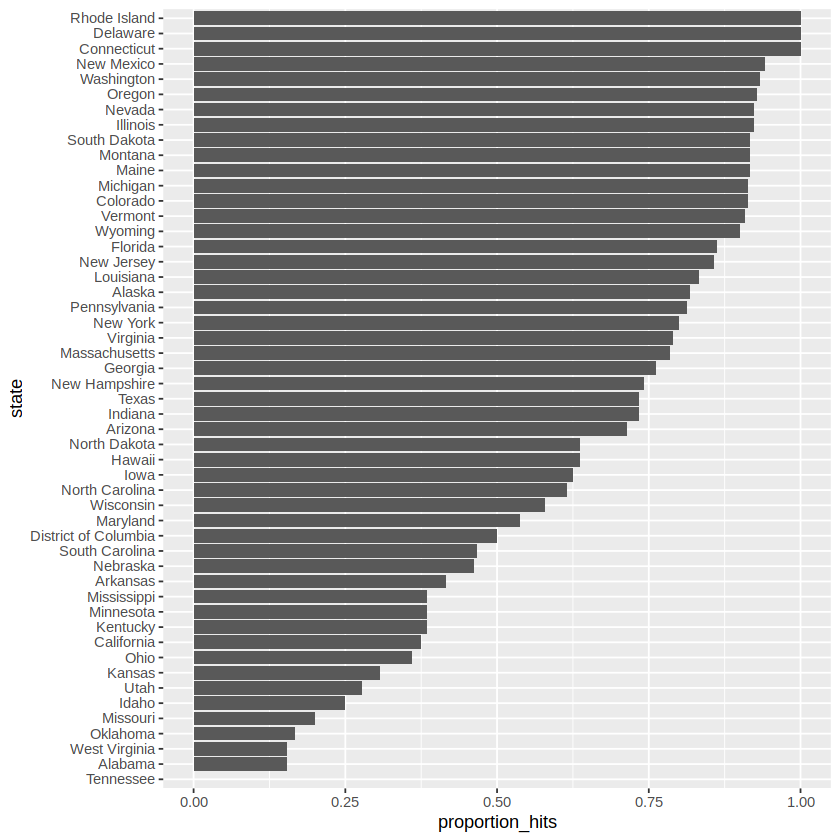

In [13]:
p_hits %>% 
    mutate( state=reorder( state, proportion_hits ) ) %>%
    ggplot( aes(state, proportion_hits) ) +
    geom_bar( stat = "identity" ) +
    coord_flip()

#### Exercise 6: *Predicting the winner*

Even if a forecaster's confidence interval is incorrect, the overall predictions will do better if they correctly called the right winner.

Add two columns to the **cis** table by computing, for each poll, the difference between the predicted spread and the actual spread, and define a column **hit** that is true if the signs are the same.

**Instructions**

* Use the *mutate* function to add two new variables to the *cis* object: **error** and **hit**.
* For the *error* varible, subtract the actual spread from the spread.
* For the *hit* variable, return *TRUE* if the poll predicted the actual winner. Use the *sign* function to check if their signs match, learn more with *?sign*
* Save the new table as an object called **errors**.
* Use the *tail* function to examine the last 6 rows of *errors*.

In [14]:
cis <- cis %>%
                mutate( state=as.character(state) ) %>%
                left_join( add, by="state" )
head( cis )

,state,startdate,enddate,pollster,grade,spread,lower,upper,actual_spread
,<chr>,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,0.02,-0.001331221,0.0413312213,0.083
2,Virginia,2016-11-03,2016-11-04,Public Policy Polling,B+,0.05,-0.005634504,0.1056345040,0.054
3,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,-0.07,-0.139125210,-0.0008747905,-0.094
4,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,0.06,0.004774064,0.1152259363,-0.007
5,North Carolina,2016-11-04,2016-11-06,Siena College,A,0.00,-0.069295191,0.0692951912,-0.036
6,Georgia,2016-11-06,2016-11-06,Landmark Communications,B,-0.03,-0.086553820,0.0265538203,-0.051


In [15]:
errors <- cis %>%
            mutate( error=spread-actual_spread, hit=sign(spread) == sign(actual_spread) )
tail( errors )

,state,startdate,enddate,pollster,grade,spread,lower,upper,actual_spread,error,hit
,<chr>,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
807,Utah,2016-10-04,2016-11-06,YouGov,B,-0.0910,-0.1660704570,-0.01592954,-0.180,0.0890,TRUE
808,Utah,2016-10-25,2016-10-31,Google Consumer Surveys,B,-0.0121,-0.1373083389,0.11310834,-0.180,0.1679,TRUE
809,South Dakota,2016-10-28,2016-11-02,Ipsos,A-,-0.1875,-0.3351563485,-0.03984365,-0.298,0.1105,TRUE
810,Washington,2016-10-21,2016-11-02,Ipsos,A-,0.0838,-0.0004028265,0.16800283,0.162,-0.0782,TRUE
811,Utah,2016-11-01,2016-11-07,Google Consumer Surveys,B,-0.1372,-0.2519991224,-0.02240088,-0.180,0.0428,TRUE
812,Oregon,2016-10-21,2016-11-02,Ipsos,A-,0.0905,-0.0019261469,0.18292615,0.110,-0.0195,TRUE


#### Exercise 7: *Plotting Prediction Results*

Create an object called **p_hits** that contains the proportion of instances when the sign of the actual spread matches the predicted spread ofr state with more than 5 polls.

Make a barpolot based on the result from the previous exercise that shows the proportion of times the sign of the spread matched the actual result for the data in *p_hits*.

**Instructions**

* Use the *group_by* function to group data by state.
* Use the *filter* function to filter for states that have more than 5 polls.
* Summarize the proportion of values in *hit* that are true as a variable called **proportion_hits**. Also create new variables for the number of polls in each state using the *n()* function.
* To make the plot, follow these steps:
  * reorder the states in order of the proportion of hits.
  * using *ggplot*, set the aesthetic with state as the x-variable and proportion of hits as the y-variable.
  * use *geom_bar* to indicate that we want to plot a barplot.
  * use *coord_flip* to flip the axes so the sttes are displayed from top to bottom and proportions are displayed from  left to right.

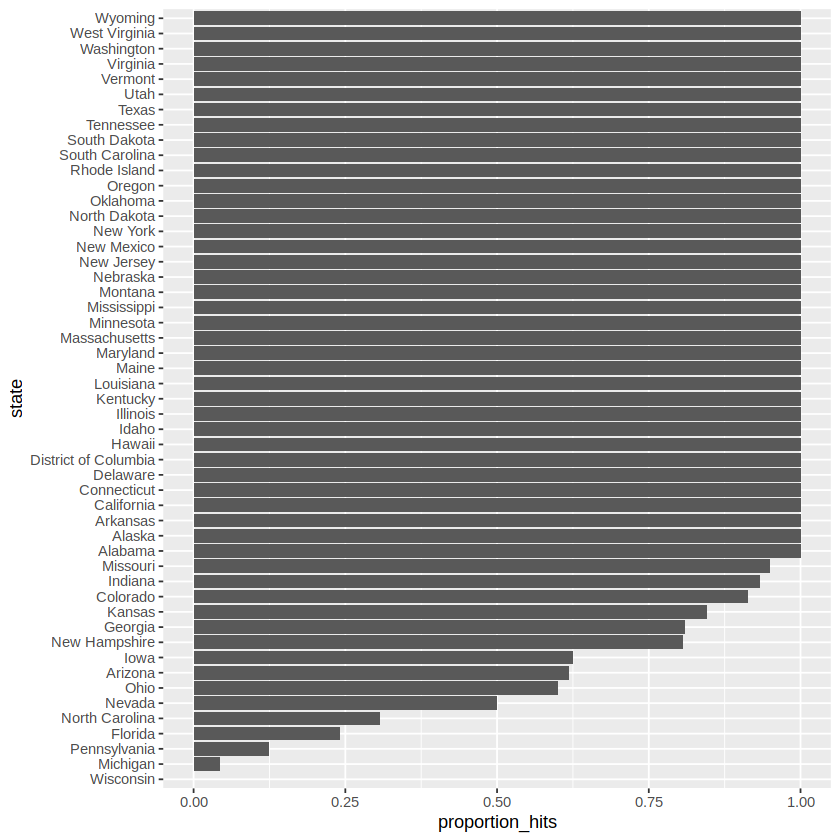

In [29]:
errors <- cis %>%
            mutate( error=spread-actual_spread, hit=sign(spread) == sign(actual_spread) )

p_hits <- errors %>%
            group_by( state ) %>%
            filter( n() >= 5 ) %>%
            summarize( proportion_hits=mean(hit), n=n() )

p_hits %>%
    mutate( state=reorder( state, proportion_hits ) ) %>%
    ggplot( aes(state, proportion_hits) ) +
    geom_bar( stat="identity" ) +
    coord_flip()
            

#### Exercise 8: *Plotting the Errors*

In the previous graph, we see that most states's polls predicted the correct winner, 100\% of the time. Only a few states polls' were incorrect more than 25\% of the time. Wisconsin got every single poll wrong.

Make the histogram of the errors. What is the **median** of these errors?.

**Instructions**

* Use *hist* function to generate histogram of the errors.
* Use the *median* function to compute the median error.

In [30]:
head( errors )

,state,startdate,enddate,pollster,grade,spread,lower,upper,actual_spread,error,hit
,<chr>,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,0.02,-0.001331221,0.0413312213,0.083,-0.063,TRUE
2,Virginia,2016-11-03,2016-11-04,Public Policy Polling,B+,0.05,-0.005634504,0.1056345040,0.054,-0.004,TRUE
3,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,-0.07,-0.139125210,-0.0008747905,-0.094,0.024,TRUE
4,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,0.06,0.004774064,0.1152259363,-0.007,0.067,FALSE
5,North Carolina,2016-11-04,2016-11-06,Siena College,A,0.00,-0.069295191,0.0692951912,-0.036,0.036,FALSE
6,Georgia,2016-11-06,2016-11-06,Landmark Communications,B,-0.03,-0.086553820,0.0265538203,-0.051,0.021,TRUE


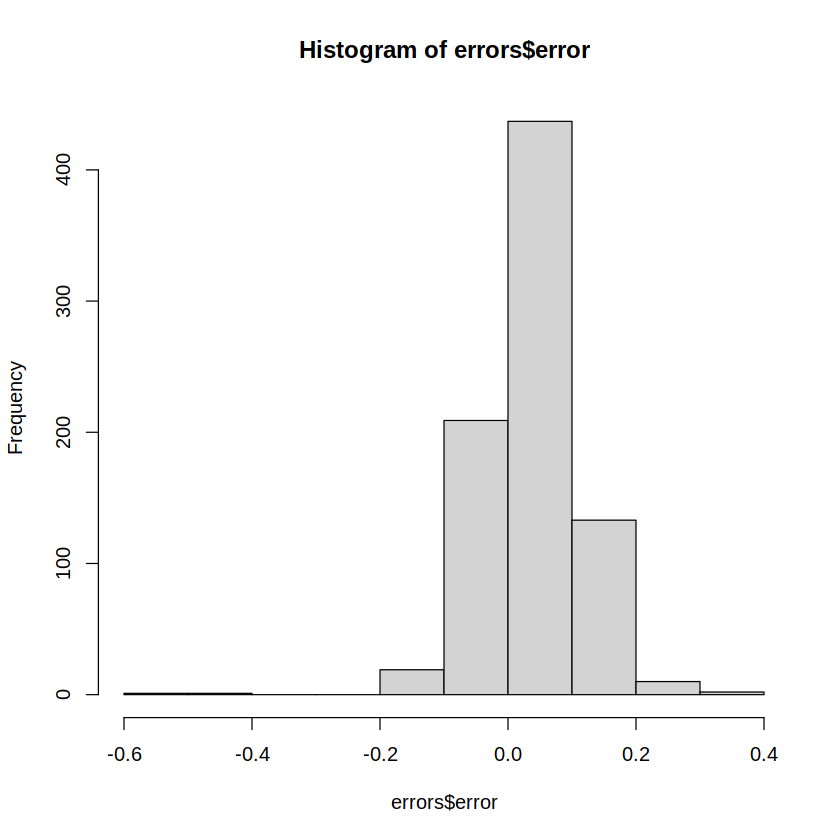

In [31]:
hist( errors$error )

In [32]:
median( errors$error )

[1] 0.037

#### Exercise 9: *Plot Bias by State*

We see that, at the state level, the *median error* was slightly in favor of Clinton. The distribution is not centered at 0, but at **0.037**. This value represents the general bias we described in an earlier section.

Create a boxplot to examine if the bias was general to all states or if it affected some states differently. Filter the data to include on ly pollsters with grades *B+* or *higher*.

**Instructions**

* Use the *filter* function to filter the data for polls with grades equal to *A+, A, A-, o B+*.
* Use the *reorder* function to order the state data by error.
* Use *ggplot*, set the aesthetic with state as the x-varible and error as the y-varible.
* Use *geom_boxplot* to indicate that we want to plot a boxplot.
* Use *geom_point* to add data points as a layer.

In [33]:
head( errors )

,state,startdate,enddate,pollster,grade,spread,lower,upper,actual_spread,error,hit
,<chr>,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,0.02,-0.001331221,0.0413312213,0.083,-0.063,TRUE
2,Virginia,2016-11-03,2016-11-04,Public Policy Polling,B+,0.05,-0.005634504,0.1056345040,0.054,-0.004,TRUE
3,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,-0.07,-0.139125210,-0.0008747905,-0.094,0.024,TRUE
4,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,0.06,0.004774064,0.1152259363,-0.007,0.067,FALSE
5,North Carolina,2016-11-04,2016-11-06,Siena College,A,0.00,-0.069295191,0.0692951912,-0.036,0.036,FALSE
6,Georgia,2016-11-06,2016-11-06,Landmark Communications,B,-0.03,-0.086553820,0.0265538203,-0.051,0.021,TRUE


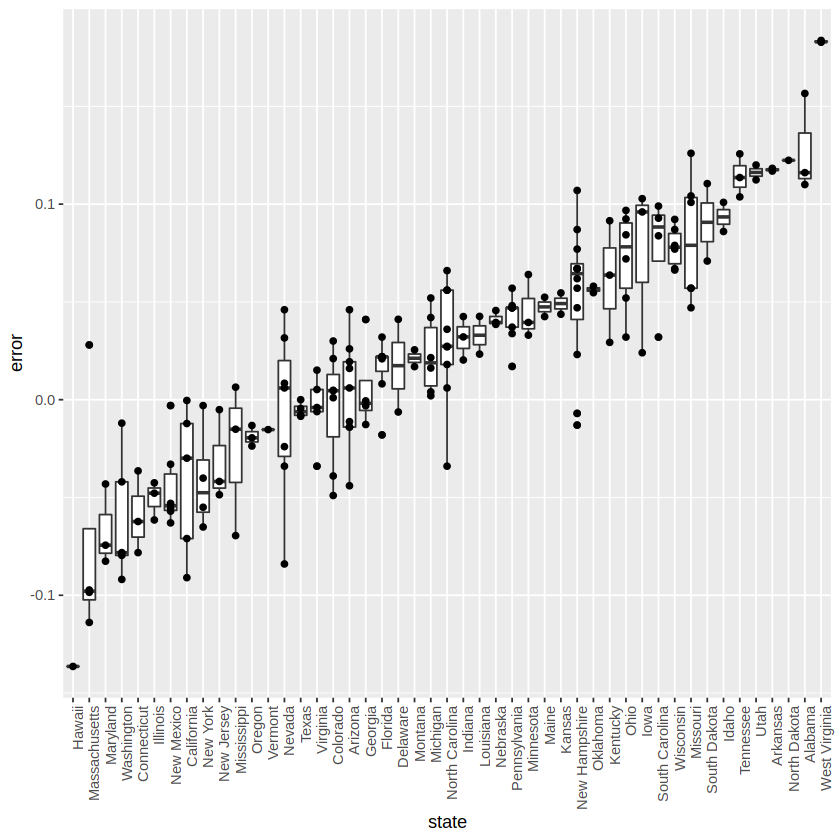

In [34]:
errors %>%
    filter( grade %in% c("A+","A","A-","B+") | is.na(grade) ) %>%
    mutate( state=reorder( state,error ) ) %>%
    ggplot( aes( state, error ) ) + 
    theme( axis.text.x=element_text(angle=90, hjust=1) ) +
    geom_boxplot() + 
    geom_point()

#### Exercise 10: *Filter Error Plot*

Some of these states only have a few polls. Repeat the previous exercise to plot the errors for each state, but only include states with five good polls or more.

**Instructions**

* Use the *filter* function to filter the data for polls with grades equal to *A+, A, A-, o B+*.
* Group the filtered data by state using *group_by*.
* Use the *reorder* function to order the state data by error.
* Use *ggplot*, set the aesthetic with state as the x-varible and error as the y-varible.
* Use *geom_boxplot* to indicate that we want to plot a boxplot.
* Use *geom_point* to add data points as a layer.

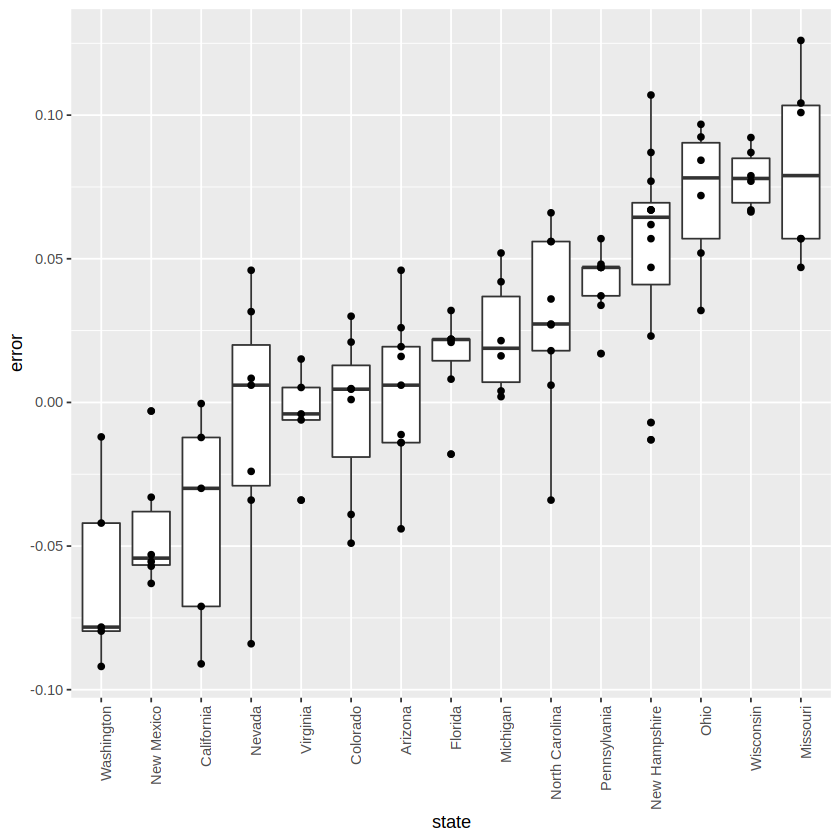

In [35]:
errors %>%
    filter( grade %in% c("A+","A","A-","B+") | is.na(grade) ) %>%
    group_by( state ) %>%
    filter( n() >= 5 ) %>%    
    ungroup() %>%
    mutate( state=reorder( state,error ) ) %>%
    ggplot( aes( state, error ) ) + 
    theme( axis.text.x=element_text(angle=90, hjust=1) ) +
    geom_boxplot() + 
    geom_point()

### The *t-distribution*



Previously, we made use of the *Central Limit Theorem (CLT)* with sample sizes as small as 15. Because, we're also estimating a second parameter, *sigma*($\sigma$), further variability is introduced into our *confidence interval*, and this results in a *confidence interval* that is *overconfident* because it doesn't account for that variability. For very large sample sizes, this extra variability is **negligible*.

In general, for values smaller than 30, we need to be cautious about using the *CLT*. However, if the data in the urn, its population, is known to follow a normal distribution, then we actually have a mathematical theory that tells us how much bigger we need to make the intervals to account for the *estimation of $\sigma$*.

Using this theory, we can construct confidence intervals for any urn but again, only if the data in the urn is known to follow a normal distribution.

So for the 0, 1 data of previous urn models, this theory definitely does not apply. We call the statistic on which confidence intervals for *d* is call *Z*. The *CLT* tells us that *Z* is approximately normally distributed with **expected value 0** and **standard error 1**.

$$Z\,=\,\frac{\overline{X} - d}{\frac{\sigma}{\sqrt{N}}}$$

But in practice, we don't know sigma, so we use **s** instead.

$$Z\,=\,\frac{\overline{X} - d}{\frac{s}{\sqrt{N}}}$$

But by doing this, we introduce some variability, is **estimated from data**.

This theory tht we mentioned tells us that *Z* follows what is called a **t-distribution** with what is called *N-1* degrees of freedom.

The **degrees of freedom** is a parameter that controls the variability via what are called fatter tails. You can see that in this figure, where we have *t-distributions* with degrees of freedom 3, 5, and 15.

<center><img src="images/sec06-01.png" with=75% height=75%/></center>

and you can see how the *tails*, the ends, go higher and higher, meaning that the large values have large probabilities for samaller values of the degrees of freedom.

In our case of pollster data, if we are willing to assume that the pollster effect data is normally distributed, then we can use this theory.

Here's a *q-q plot* showing us our sample data versus a normal distribution. It's not aperfect match, but is relatively close. 

<center><img src="images/sec06-02.png" with=250 height=150/></center>

So once we make that decision, then, perhaps a better confidence interval for *d* is constructed using the *t-distribution* instead of the *normal distribution*. So al we change is the **1.96**. We now change to the quantile coming from a *t-distribution*.

In [2]:
my_packages <- c( "dslabs", "tidyverse", "dplyr" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dplyr )
library( dslabs )

data( "polls_us_election_2016" )

In [10]:
polls <- polls_us_election_2016 %>%
    filter( state == "U.S." & enddate >= "2016-10-31" &
            (grade %in% c("A+", "A", "A-", "B+") | is.na(grade)))
               
one_poll_per_pollster <- polls %>%
                            group_by( pollster ) %>%
                            filter( enddate == max(enddate) ) %>%
                            ungroup() %>%
                            mutate(spread = rawpoll_clinton/100 - rawpoll_trump/100)

head( one_poll_per_pollster )

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.0,43.0,4.0,NA,45.20163,41.72430,4.626221,NA,0.040
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.0,39.0,6.0,NA,42.02638,38.81620,6.844734,NA,0.030
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.0,44.0,3.0,NA,49.02208,43.95631,3.057876,NA,0.040
U.S.,2016-11-02,2016-11-06,CBS News/New York Times,A-,1426,lv,45.0,41.0,5.0,NA,45.11649,40.92722,4.341786,NA,0.040
U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44.0,40.0,6.0,NA,43.58576,40.77325,5.365788,NA,0.040
U.S.,2016-11-04,2016-11-07,IBD/TIPP,A-,1107,lv,41.2,42.7,7.1,NA,42.92745,42.23545,6.316175,NA,-0.015


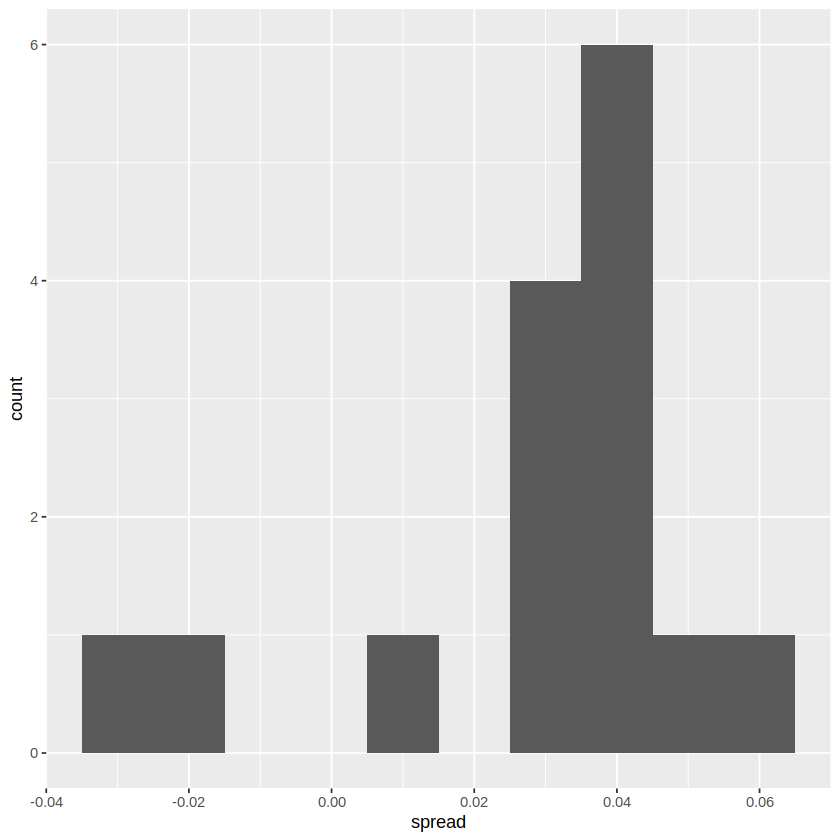

In [11]:
one_poll_per_pollster %>%
    ggplot( aes(spread) ) + geom_histogram( binwidth=0.01 )

We'll use the *qt()* function, this function returns the value of the inverse cumulative density function of the *Student's distribution* given a specific irregular variable *x* and levels of opportunity *df (degree of freedom)*.

You can use *qt* function to find out what the *t-score* of the pth quantil of the Student's distribution.

In [13]:
Z <- qt(0.975, nrow(one_poll_per_pollster) - 1 )
one_poll_per_pollster %>%
    summarize( avg=mean(spread), moe=Z*sd(spread)/sqrt(length(spread)) ) %>%
    mutate( start=avg-moe, end=avg+moe )

avg,moe,start,end
<dbl>,<dbl>,<dbl>,<dbl>
0.02898,0.01339802,0.01558198,0.04237802


So al we change is the **1.96**. We now change to the quantile coming from a *t-distribution* with *nrow(one_poll_per_pollster)-1)* what represent 14 degrees of freedom.

The new confience interval goes from *1.5\% to 4.2\%*. So it is a little bit bigger than the one we made using the *normal distribution*.

This is expected because the quantile from  the *t-distribution* is larger than the quantile from the normal distribution. FiveThirtyEight uses the *t-distribution* to generate errors that better model the deviation we see in election data.

For example, the devaition we saw in Wisconsin between the polls and the actual result, the actual result was that Trump won by **0.7\%**, is more in line with *t-distributed* data than *normal distributed* data.


### Assessment 6.2: The *t-Distribution*



#### Exercise 1: Using the *t-distribution*

We know that, with a normal distribution, only 5\% of values are more than **2 standard deviations** away from the mean. Calculate the probability of seeing *t-distributed random variables* being more than *2 in absolute value* when the *degrees of freedom (df) are **3***.

**Instruction** 

* Use the *pt* function to calculate the probability of seeing a value less than or equal to the argument. The *pt* function returns the value of the **cumulative density function (*cdf*)** of the *Student t distribution* given a certain random variable *x* and *degrees of freedom (df)*.

In [17]:
1 -  pt( 2, 3 ) + pt( -2, 3 ) 

[1] 0.139326

#### Exercise 2: Plotting the t-distribution

Now use *sapply* to compute the same probability for *degrees of freedom* from 3 to 50. Make a plot and notice when this probability converges to the normal distribution's 5\%.

**Instructions**

* Make a vector called **df** that contains a sequence of numbers from 3 to 50.
* Using *function*, make a function called **pt_func** that recreates the calculation for the probability that a value is greater than 2 as an abosolute value for any given degrees of freedom.
* Use *sapply* to apply the *pt_func* function across all values contained in *df*. Call these probabilities **probs**.
* Use the *plot* function to plot *df* on the x-axis and *probs* on the y-axis.


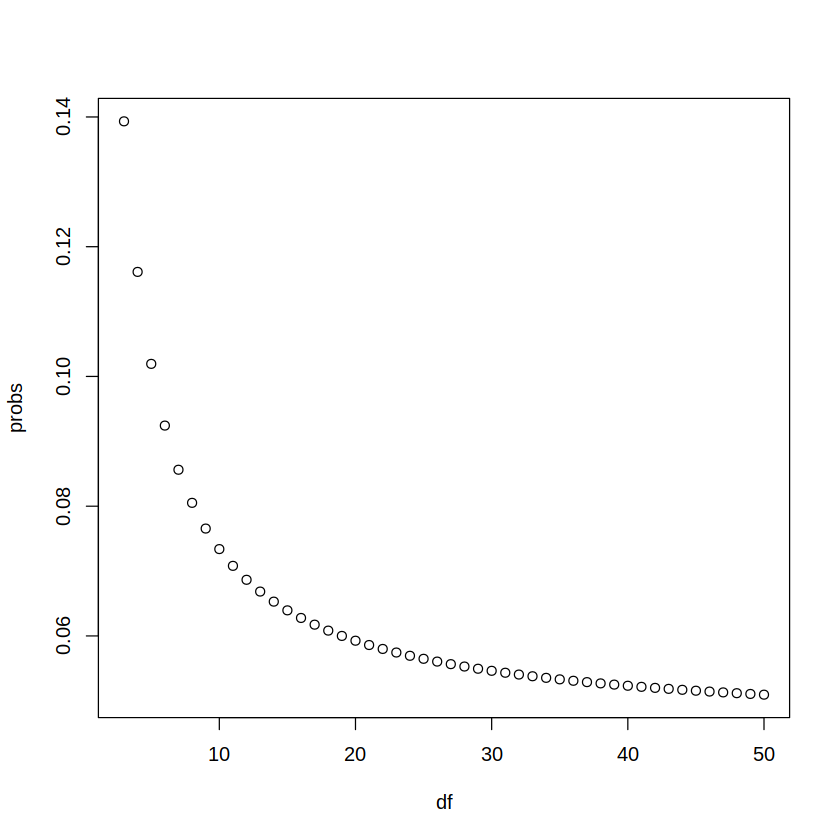

In [18]:
df <- seq( 3, 50 )

pt_func <- function(n) {
    1 - pt( 2, n ) + pt( -2, n )
}

probs <- sapply( df, pt_func )
plot( df, probs )

#### Exercise 3: Sampling from the Normal Distribution

In a previous section, we repeatedly took random samples of 50 heights from a distribution of heights. We noticed that about 95\% of the samples have confidence intervals spanning the true population mean.

Re-do this Monte Carlo simulation, but now instead of *N=50*, use *N=15*. Notice what happens to the proportion of hits.

**Instructions**

* Use the *replicate* function to carry out the simulation. Specify the number of times you want the code to run and, within brackets, the three lines of code that should run.
* First use the *sample* function to randomly sample *N* value from *x*.
* Second, create a vector called **interval** that calculates the 95\% confidence interval for the sample. You will use the *qnorm* function.
* Third, use the *between* function to determine if the population mean *mu* is contained between the confidence intervals.
* Save the results of the Monte Carlo Simulation function to a vector called **res**.
* Use the *mean* function to determine the proportion of hits in *res*.

In [4]:
my_packages <- c( "dslabs", "tidyverse", "dplyr" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dplyr )
library( dslabs )

data( heights )

In [5]:
x <- heights %>%
        filter( sex == "Male" ) %>%
        .$height

mu <- mean(x)
N  <- 15
B  <- 10000

set.seed(1)

Now, generate a logical vector **res** that contains the results of the *Monte Carlo simulation*

In [6]:
res <- replicate( B, {
    X <- sample( x, N, replace=TRUE )
    interval <- mean(X) + c(-1,1)*qnorm(0.975)*sd(X)/sqrt(N)
    between( mu, interval[1], interval[2] )
})

Calculate the proportion of times the simulation produced values within the 95\% confidence interval. Print this values to the console.

In [7]:
mean(res)

[1] 0.9331

In [8]:
res <- replicate( B, {
    s <- sample( x, N, replace=TRUE )
    interval <- c( mean(s) - qt( 0.975, N-1 )*sd(s)/sqrt(N),
                   mean(s) + qt( 0.975, N-1 )*sd(s)/sqrt(N))
    between( mu, interval[1], interval[2] )
})

mean( res )

[1] 0.9557

#### Exercise 5: Why the t-distribution?

Why did the *t-distribution* confidence intervals work so much better?

**Possible answers*

* The t-distribution takes the variability into account and generates large confidence intervals.
* Because the t-distribution shifts the intervals in the direction towards the actual mean.
* This was jus a chance occurrence. If we run it again, the CLT will work better.
* The t-distribution is always a better approximation than the normal distribution.

**Solution**

<center><b>The t-distribution takes the variability into account and generates large confidence intervals.</b></center>




<hr/>

## Section 7: Association Tests



### Fisher's exact test



The statistical tests we have covered up to now leave out a substantial portion of data types. Specifically, we have not discussed:
* inference for binary
* categorical
* ordinal data

Consider the following case study. A *2014 PNAS paper* analyzed success rates from *funding agencies* in the Netherlands and concluded that their *"results reveal gender bias favoring mal applicants over female applicants in the priorization of their quality of research"*. The main evidence for this conclusion down to a comparasion of the percentages.

The first table in the supplement of the paper includes the information we need. This information is included in the *dslabs package*.

In [3]:
my_packages <- c( "dslabs", "tidyverse", "dplyr" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dplyr )
library( dslabs )

In [5]:
data( research_funding_rates )
research_funding_rates

discipline,applications_total,applications_men,applications_women,awards_total,awards_men,awards_women,success_rates_total,success_rates_men,success_rates_women
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Chemical sciences,122,83,39,32,22,10,26.2,26.5,25.6
Physical sciences,174,135,39,35,26,9,20.1,19.3,23.1
Physics,76,67,9,20,18,2,26.3,26.9,22.2
Humanities,396,230,166,65,33,32,16.4,14.3,19.3
Technical sciences,251,189,62,43,30,13,17.1,15.9,21.0
Interdisciplinary,183,105,78,29,12,17,15.8,11.4,21.8
Earth/life sciences,282,156,126,56,38,18,19.9,24.4,14.3
Social sciences,834,425,409,112,65,47,13.4,15.3,11.5
Medical sciences,505,245,260,75,46,29,14.9,18.8,11.2


We can compute the differences in percentages for men and women. To do this, we'll compute the totals that were successful and the totals that wer not using this code.

Note: *select( -discipline )* select all columns except discipline column. The *dplyr.funs()* was deprectaed in 0.8.0 version, we  must use the function *list()* instead.

In [6]:
totals <- research_funding_rates %>%
            select( -discipline ) %>%
            summarize_all( list(sum) ) %>%
            summarize( 
                yes_men = awards_men,
                no_men = applications_men - awards_men, 
                yes_women = awards_women,
                no_women = applications_women - awards_women
            )
totals 


yes_men,no_men,yes_women,no_women
<dbl>,<dbl>,<dbl>,<dbl>
290,1345,177,1011


Compare percentage of men/women with awards:

In [7]:
totals %>% summarize( 
                percent_men = yes_men/(yes_men + no_men), 
                percent_women = yes_women/(yes_women + no_women) )

percent_men,percent_women
<dbl>,<dbl>
0.17737,0.1489899


We see that a large percent of men received awards than women. The percent for men was about *18\%*, for women was about *15\%*. Could this be due just to random variability?

We learn how to perform *inference for this type of data*. R.A. Fisher was one of the first to formalize hypothesis testing. 

The **Lady Tasting Tea** is one of the most famous examples. *Muriel Bristol*, a colleague of Fisher's, claimed that she could tell if *milk was added before or after tea was poured*. Fisher was skeptical.

He designed an experiment to test this claim:

* He gave her **4 pairs of cups of tea, one with milk poured first, the other after**. 
* The order of the two was randomized.
* The **null hypothesis** here is **that she was just guessing**.

Fisher derived the distribution of the number of correct picks on the assumption that the choices were random and independent.

Supposse she picked 3 out of 4 correctly. Do we believe she has a special ability based on this?. The basic question we ask it, if the tester actually guessing, what are the chances that she gets 3 or more correct?

We can compute a probability under the null hypothesis, that she's guessing four of each. We can think of this particular example as picking 4 beads out of an urn where 4 are blue. Those are the correct answers, and 4 are red, those are the incorrect answers.

<center><img src="images/sec07-01.png" width="150" height="150"/></center>

Remember that se knows that three are 4 before tea and 4 after. If she's simply guessing, each bead has the same chance of being picked. We can then use **combinatorics* to figure out each probability.

Th probbility of picking 3 can be derived using this mathematical formula that tells you that it's *16/10*.

$$
\begin{array}{l}
\frac{ \begin{pmatrix}4 \\ 3\end{pmatrix}\ast\begin{pmatrix}4 \\ 1\end{pmatrix}  }{ \begin{pmatrix}8 \\ 4\end{pmatrix} } = 
\frac{ \frac{4!}{3!(4-3)!} \ast \frac{4!}{1!(4-1)!} }{ \frac{8!}{4!(8-4)!} } = \frac{16}{70}
\end{array}
$$

The probability of picking 4 correct is given by this formula,

$$
\begin{array}{l}
\frac{ \begin{pmatrix}4 \\ 4\end{pmatrix}\ast\begin{pmatrix}4 \\ 0\end{pmatrix}  }{ \begin{pmatrix}8 \\ 4\end{pmatrix} } = 
\frac{1}{70}
\end{array}
$$

Thus the chance of observing 3 correct anwswers or more under the *null hypothesis* is approximately **0.24** this is the ***p*-value**


The procedure that produces *p-value* is called **Fisher's exact test**, and it uses the hypergeometric distribution to compute the probabilities.

In the real story, it turns out Muriel could tell if the milk was poured before or after every single time. So the *p-value was *1/70*.

The data from this type of experiment is usually summarized by a table like this:

In [8]:
tab <- matrix( c(3,1,1,3), 2, 2 )
rownames(tab) <- c( "Poured Before", "Poured After" )
colnames(tab) <- c( "Guessed before", "Guessed after" )

tab

,Guessed before,Guessed after
Poured Before,3,1
Poured After,1,3


These are referred to as two-by-two tables. They show, for each of the four combinations one can get with a pair of binary variables, the observed counts for each of these pairs.

The function *fisher.test* performs the inference calculations and can be applied to the two-by-two table using this simple piece of code:

In [9]:
fisher.test( tab, alternative="greater" )


	Fisher's Exact Test for Count Data

data:  tab
p-value = 0.2429
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 0.3135693       Inf
sample estimates:
odds ratio 
  6.408309 


Here we can see that the **p-value** is what we previously calculated.



### Chi-square test ($\chi$-squared)



In the tasting tea example, the number of blue and red beads is experimentally fixed. And the number of answers given for each category is also fixed. This is because Fisher made sure there were 4 before tea and 4 after tea, and the lady knew this so, the answer is would also have 4 and 4. In this case, the sums of the rows and the sum of the columns of the 2 by 2 table are fixed.

In general, this is not the case. There's another approach that's very similar, the **chi-squared test**. Imagine we have *2,823 individuals*. Some are men, and some are women. Some get funded, others don't. They **have to binary variables**. We saw thta the success rate for men and women were the following: 
* $\approx 18\%$ for men,
* $\approx 15\%$ for women

We can compute the *overall funding rate* using the following code:

In [11]:
overall_funding_rate <- totals %>%
                            summarize( percent_total = (yes_men + yes_women) / (yes_men + no_men + yes_women + no_women) ) %>%
                            .$percent_total 

overall_funding_rate

[1] 0.1654269

It's between *16\%* and *17\%*. So now the question is will we see a difference between men and women as big as  the one we see if funding was assigned at random using this rate?. The **chi-squared test** answer this question.

* First step is to create a 2 by 2 table just like before. We can use this code and construct the following 2 by 2 table for the research funding data. The general idea of a *chi-squared test* is  to compare this 2 by 2 table, the observed 2 by 2 table, to what you expect to see at the *overall funding rate*, which we can compute using this code.

In [12]:
two_by_two <- tibble( 
    awarded = c("no","ye"),
    men = c(totals$no_men, totals$yes_men),
    women = c(totals$no_women, totals$yes_women)
)
two_by_two

awarded,men,women
<chr>,<dbl>,<dbl>
no,1345,1011
ye,290,177


Note: *tibble* function constructs a data frame. Datasheets created with the *tibble* function are an improved version of the classic datasheets created with *data.frame* and are the currenct standard. This function is included in the package *tibble*, it is part of *tidyverse* so it is not necessary to load it individually if you have already loaded *tidyverse*. 

We can see that more men than expected and less women than expected received funding. Howerver, under the *null hypothesis*, this observation is a random variable. The *chi-squared test* tells us how likely it is to see a deviation like this, or larger, by chance. This test uses an **asymptotic result**, similar to the *central limit theorem*, related to the sums of independent binary outcomes in a context like this.

The *R* function *chisq.test* takes a 2 by 2 table and returns the results from this test. Here's the simple code.

In [14]:
two_by_two %>%
    select( -awarded ) %>%
    chisq.test()


	Pearson's Chi-squared test with Yates' continuity correction

data:  .
X-squared = 3.8111, df = 1, p-value = 0.05091


We see that the *p-value* is 0.051, this means that the probability of seeing a deviation like the one we see or bigger under the null that funding is assigned at random is 0.051.

So we described how to obtain *p-values*.

* Let's talk about **summary statistics**. An informative summary statistic associated with 2 by 2 tables is the **odds ratio**. Define the two variables $X=1$ if you are male or $0$ otherwise, and $Y=1$ if you're funded and 0 otherwise. The *odds of getting funded* if you're a man is defined 

$$Pr(Y=1\,|\,X=1)/Pr(Y=0\,|\,X=1)$$

The odds of being funded if you're a woman is given by this simple formular:
$$Pr(Y=1\,|\,X=0)/Pr(Y=0\,|\,X=0)$$

And both can be computed with this code

In [16]:
odds_men <- (two_by_two$men[2]/sum(two_by_two$men))/(two_by_two$men[1]/sum(two_by_two$men))

odds_women <- (two_by_two$women[2]/sum(two_by_two$women))/(two_by_two$women[1]/sum(two_by_two$women))


The **odds ratio** is the ratio of these two odds. How many times larger are the *odds* for men than for women?

In [17]:
odds_men / odds_women

[1] 1.231554

Reporting only *p-values* is not an appropiate way to report the results of data analysis. Note that the relationship between *odds ratios* and *p-values* is **not one-to-one**, it depends on the sample size.

A very small *p-values* does not necessarily mean a very large *odds ratio*.

Look at what happens to the *p-value* if we multiply our 2 by 2 table by 10, the *odds ratio* remains the same:

In [18]:
two_by_two %>%
    select( - awarded ) %>%
    mutate( men=men*10, women=women*10 ) %>%
    chisq.test()


	Pearson's Chi-squared test with Yates' continuity correction

data:  .
X-squared = 39.935, df = 1, p-value = 2.625e-10


Look at how small the *p-value* becomes. Earlier we mention that instead of *p-values*, it's more appropiate to report **confidence intervals**. However, computing confidence intervals for odds ratio is **not mathematically straighforward**.

Unlike other *statistics* for which we can derive useful approximations for the distribution, the *odds ratio* is not only a ratio, but a **ratio of ratios**.

One approach is to use the **theory of generalized linear models**.


### Assessment 7.1: The association and *chi-squared* ($\chi$-squared) Test



#### Exercise 1: Comparing proportions of hits

In a previous exercise, we determine whether or not each poll predicted the correct winner for their state in the 2016 U.S. presidentil election. Each poll was also assigned a grade by the poll aggregator. Now we're going to determine if polls rated **A-** made better predictions than polls rated **C-**.

Filter the errors data for just polls with grades **A-** and **C-**. Calculate the proportion of times each grade of poll predicted the correct winner.

**Instructions**

* Filter error for grades: **A-** and **C-**.
* Group the data by *grade* and *hit*.
* Summarize the number of hits for each grade.
* Generate a two-by-two table containing the number of hits and misses for each grade.
* Calculate the proportion of times each grade was correct.

In [16]:
errors <- cis %>%
            mutate( error=spread-actual_spread, hit=sign(spread) == sign(actual_spread) )
            
head( errors )

,state,startdate,enddate,pollster,grade,spread,lower,upper,actual_spread,error,hit
,<chr>,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,0.02,-0.001331221,0.0413312213,0.083,-0.063,TRUE
2,Virginia,2016-11-03,2016-11-04,Public Policy Polling,B+,0.05,-0.005634504,0.1056345040,0.054,-0.004,TRUE
3,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,-0.07,-0.139125210,-0.0008747905,-0.094,0.024,TRUE
4,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,0.06,0.004774064,0.1152259363,-0.007,0.067,FALSE
5,North Carolina,2016-11-04,2016-11-06,Siena College,A,0.00,-0.069295191,0.0692951912,-0.036,0.036,FALSE
6,Georgia,2016-11-06,2016-11-06,Landmark Communications,B,-0.03,-0.086553820,0.0265538203,-0.051,0.021,TRUE


Generate an object called **totals** that contains the number of good and bad predictions for polls rated **A-** and **C-**.

In [17]:
totals <- errors %>%
            filter( grade %in% c("A-", "C-") ) %>%
            group_by( grade, hit ) %>%
            summarize( num = n() ) %>%
            spread( grade, num )

totals

# print the proportion of hits for grade A- polls to the console
totals[[2,3]]/sum(totals[[3]])

# print the proportion of hits for grade C- polls to the console
totals[[2,2]]/sum(totals[[2]])

`summarise()` has grouped output by 'grade'. You can override using the
`.groups` argument.


hit,C-,A-
<lgl>,<int>,<int>
FALSE,50,26
TRUE,311,106


[1] 0.8030303

[1] 0.8614958

#### Exercise 2: Chi-squared test

We found that the **A-** polls predicted the correct winner about 80\% of the time in their states and **C-** polls predicted the correct winner about 86\% of the time.

Use *chi-squared test* to determine if these proportions are different.

**Instructions**

* Use the *chisq.test* function to peform the *chi-squared test*. Save the results to an object called **chisq_test**.
* Print the *p-value of the test to the console.

In [18]:
head( totals )

hit,C-,A-
<lgl>,<int>,<int>
FALSE,50,26
TRUE,311,106


In [19]:
chisq_test <- totals %>%
    select( -hit ) %>%
    chisq.test()

chisq_test

chisq_test$p.value


	Pearson's Chi-squared test with Yates' continuity correction

data:  .
X-squared = 2.1053, df = 1, p-value = 0.1468


[1] 0.1467902

#### Exercise 3: Odds Ratio calculation

It doesn't look like the grade **A-** polls performed significantly differently than the grade **C-** polls in their states. Calculate the *odds ratio* to determine the magnitude of the difference in performance between these two grades of polls.

**Instructions**

* Calculate the odds that a grade **C-** poll predicts the correct winner. Save this result to a variable called **odds_C**.
* Calculate the odds that a grade **A-** poll predicts the correct winner. Save this result to a variable called **odds_A**.
* Calculate the odds ratio that tells us how many times larger the odds of a grade **A-** poll is at predicting the winner than a grade **C-** poll.

In [20]:
odds_C <- (totals[[2,2]] / sum(totals[[2]])) / (totals[[1,2]] / sum(totals[[2]]))

odds_A <- (totals[[2,3]] / sum(totals[[3]])) / (totals[[1,3]] / sum(totals[[3]]))

odds_A / odds_C


[1] 0.6554539

#### Exercise 4: Significance

We did not find meaningful differences between the poll results from grade **A-** and grade **C-** polls in this subset of the data, which only contains polls for about a week before the election. Imagine we expanded our analysis to include all election polls and we repeat our analysis. In this hypothetical scenario, we get that the p-value for the difference in prediction success if 0.0015 and the odds ratio describing the effect size of the performance of grade A- over grade B- polls is 1.07.

Based on what we learned in the last section, which statement reflects the best interpretation of this result?

**Instructions**

* The p-value is below 0.05, so there is a significant difference. Grade A- polls are significantly better at predicting winners.
* The p-value is too close to 0.05 to call this a significant difference. We do not observe a difference in performance.
* The p-value is below 0.05, but the odds ratio is very close to 1. There is not a scientifically significant difference in performance.
* The p-value is below 0.05 and the odds ratio indicates that grade A- polls perform significantly better than grade C- polls.

**Solution**

<center><b>The p-value is below 0.05, but the odds ratio is very close to 1. There is not a scientifically significant difference in performance.</b></center>



<hr/>

## Course Wrap-up and Comprehensive Assessment: Brexit


### Brexit poll analysis - Part 1

Test your inference and modeling skills with this case study analyzing polls from the **Brexit referendum!**.

There're 12 multi-part problems in this comprehensive assessment that review concepts from the entire course. The problems are split over 3 pages. Make sure you read the instructions carefully an run all pre-exercise code.

You can visit the *"Brexit poll analysis"* discussion forum that follows the assessment. Some of these exercises use **dslabs** datasets that were added in a July 2019 update. Make sure your package is up to date with the command *install.packages("dslabs")*.

In June 2016, the United Kingdom (UK) held a referendum to determine whether the country would "Remain" in the European Union (EU) or "Leave" the EU. This referendum is commonly known as **Brexit**. Although the media and other interpreted poll results as forecasting "Remain" (*p>0.5*), the actual proportion that voted "Remain" was only 48,1\% (*p=0.481*) and the UK thus voted to leave the EU. Pollsters in the UK were criticized for overstimating support for "Remain".

In this project, you will analyze real Brexit polling data to develop polling models to forecast Brexit results. You will write your own code in R and enter the asnwers on the edX platform.

In [2]:
my_packages <- c( "dslabs", "tidyverse", "dplyr" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dplyr )
library( dslabs )

In [3]:
library( dslabs )

data( brexit_polls )
head( brexit_polls )

,startdate,enddate,pollster,poll_type,samplesize,remain,leave,undecided,spread
,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-06-23,2016-06-23,YouGov,Online,4772,0.52,0.48,0.00,0.04
2,2016-06-22,2016-06-22,Populus,Online,4700,0.55,0.45,0.00,0.10
3,2016-06-20,2016-06-22,YouGov,Online,3766,0.51,0.49,0.00,0.02
4,2016-06-20,2016-06-22,Ipsos MORI,Telephone,1592,0.49,0.46,0.01,0.03
5,2016-06-20,2016-06-22,Opinium,Online,3011,0.44,0.45,0.09,-0.01
6,2016-06-17,2016-06-22,ComRes,Telephone,1032,0.54,0.46,0.00,0.08


The Brexit parameters were: 
* *p = 0.481*, the official proportion voting "Remain"
* *d = 2*p - 1* the official spread.

In [4]:
p <- 0.481 
d <- (2*p) - 1

print( paste( "Proportion voting Remain: ", p ) )
print( paste( "          Oficial spread: ", d ) )

[1] "Proportion voting Remain:  0.481"
[1] "          Oficial spread:  -0.038"


In [5]:
brexit_polls <- brexit_polls %>%
                    mutate( x_hat = (spread+1)/2 )

head( brexit_polls, 5 )

,startdate,enddate,pollster,poll_type,samplesize,remain,leave,undecided,spread,x_hat
,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-06-23,2016-06-23,YouGov,Online,4772,0.52,0.48,0.00,0.04,0.520
2,2016-06-22,2016-06-22,Populus,Online,4700,0.55,0.45,0.00,0.10,0.550
3,2016-06-20,2016-06-22,YouGov,Online,3766,0.51,0.49,0.00,0.02,0.510
4,2016-06-20,2016-06-22,Ipsos MORI,Telephone,1592,0.49,0.46,0.01,0.03,0.515
5,2016-06-20,2016-06-22,Opinium,Online,3011,0.44,0.45,0.09,-0.01,0.495



#### Question 1: the final proportion of voters choosing *Remain* was *p=0.481*. Consider a poll with a sample of *N=1500* voters.

What is the *standard error (se)* of the **total number of voters** in the sample choosing *Remain*?

In [6]:
options( digits = 5 )

redondeo <- function( v,n ){
    format( round(v,n), nsmall=n )
}

N <- 1500 
se <- sqrt( N*p*(1-p) )

print( paste( "Standar Error total voters choosing Remain: ", redondeo( se, 1 ) ) )

[1] "Standar Error total voters choosing Remain:  19.4"


What is the **expected value** of $\hat{X}$ ($E(\hat{X})$), the proportion of *Remain voters*?

In [7]:
expv_x_hat <- p 
print( paste("Expected value of X_hat: " , redondeo( expv_x_hat,3 )) )

[1] "Expected value of X_hat:  0.481"


What is the **standard error* of $\hat{X}$ (x_hat), the proportion of *Remain voters*?

In [8]:
se_x_hat <- sqrt( p*(1-p)/N )
print( paste("Standard error of X_hat: " , redondeo( se_x_hat,4 )) )

[1] "Standard error of X_hat:  0.0129"


What is the expected value of *d*, the spread between the proportion of *Remain voters and leave voters*?.

In [9]:
expv_d <- 2*p - 1
print( paste("Expected value of d: " , redondeo( expv_d,3 )) )

[1] "Expected value of d:  -0.038"


What is the *standard error of d*, the spread between the proportion of *Remain voters and Leave voters?

In [10]:
se_d <- 2*sqrt(p*(1-p)/N)
print( paste("Standard error of d: " , redondeo( se_d,4 )) )

[1] "Standard error of d:  0.0258"



#### Question 2: Load and inspect the *brexit_polls* dataset from **dslabs**, whic contains actual polling data for the 6 months before the Brexit vote.

* Raw proportions of voters preferring *Remain*, *Leave*, and *Undecided* are available as *remain, leave, undecided*. The **spread** is also available in *spread*, which is *the difference in the raw proportion of voters choosing Remain and the raw proportion choosing Leave*.
* Calculate *x_hat* for each poll, the *estimate of proportion of voters choosing Remain* on the referendum day (*p=0.481*), given the observed *spread* and the relationship $\hat{d} = 2\hat{X} - 1$. 
* Use *mutate* function to add a variable *x_hat* to the *brexit_polls* object by filling in the sekeleton code below.

In [11]:
head( brexit_polls, 3 )

,startdate,enddate,pollster,poll_type,samplesize,remain,leave,undecided,spread,x_hat
,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-06-23,2016-06-23,YouGov,Online,4772,0.52,0.48,0,0.04,0.52
2,2016-06-22,2016-06-22,Populus,Online,4700,0.55,0.45,0,0.10,0.55
3,2016-06-20,2016-06-22,YouGov,Online,3766,0.51,0.49,0,0.02,0.51


In [12]:
brexit_polls <- brexit_polls %>%
                    mutate( x_hat = (spread + 1)/ 2 )

The **average** of the observed *spread*?

In [13]:
avg_spread <- mean( brexit_polls$spread )
print( paste( "The average of spreads: " , redondeo(avg_spread, 4) ) )

[1] "The average of spreads:  0.0201"


What is the **standard deviation** of the observed spreads?

In [14]:
sd_spread <- sd( brexit_polls$spread )
print( paste( "Standard deviation of spreads: " , redondeo(sd_spread, 4) ) )

[1] "Standard deviation of spreads:  0.0588"


What is the **average** of *x_hat*, the estimates of the parameter *p*?

In [15]:
avg_x_hat <- mean( brexit_polls$x_hat )
print( paste( "The average of x_hat: " , redondeo(avg_x_hat, 4) ) )

[1] "The average of x_hat:  0.5100"


What is the **standard deviation** of *x_hat*?

In [16]:
sd_x_hat <- sd( brexit_polls$x_hat )
print( paste( "The standard deviation of x_hat: " , redondeo(sd_x_hat, 4) ) )

[1] "The standard deviation of x_hat:  0.0294"



#### Question 3: Confidence Interval of a Brexit poll


Consider the first poll in *brexit_polls*, a *YouGov* poll run on the same day as the Brexit referendum

In [18]:
brexit_polls[1,]

,startdate,enddate,pollster,poll_type,samplesize,remain,leave,undecided,spread,x_hat
,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-06-23,2016-06-23,YouGov,Online,4772,0.52,0.48,0,0.04,0.52


Use *qnorm* to compute the **95\% confidence interval for** $\hat{X}$. What is the lower bound of the 95\% confidence interval?

In [19]:
x_hat <- brexit_polls[1,]$x_hat
N <- brexit_polls[1,]$samplesize

se_x_hat <- sqrt( x_hat * (1-x_hat)/N )
print( paste( "The standard error of x_hat: " , redondeo(se_x_hat, 4) ) )

[1] "The standard error of x_hat:  0.0072"


In [20]:
ci <- c(redondeo(x_hat - qnorm(0.975)*se_x_hat,3) , redondeo(x_hat + qnorm(0.975)*se_x_hat,3))
ci

[1] "0.506" "0.534"

What is the lower and upper bound of the 95\% confidence interval?

In [21]:
print( paste( "The lower bound of 95% confidence interval: " , ci[1] ) )
print( paste( "The upper bound of 95% confidence interval: " , ci[2] ) )

[1] "The lower bound of 95% confidence interval:  0.506"
[1] "The upper bound of 95% confidence interval:  0.534"


Does the 95\% confidence interval predict a winner (does not cover *p=0.5*)? Does the 95\% confidence interval cover the true value of *p* observed during the referendum?. We will use the *between* function to check this point.

In [22]:
p_observed <- 0.5
not_in_ci <- !between( p_observed, ci[1], ci[2])
in_ci <- between( p_observed, ci[1], ci[2])

print( paste( "The p observed is not in 95% confidence interval: " , not_in_ci ) )
print( paste( "    The p observed is in 95% confidence interval: " , in_ci ) )


[1] "The p observed is not in 95% confidence interval:  TRUE"
[1] "    The p observed is in 95% confidence interval:  FALSE"


**Answers**

* A. The interval predicts a winner and covers the true value of *p*.
* B. The interval predicst a winner but does not cover the true value of *p*.
* C. The interval does not predict a winner but does cover the true value of *p*.
* D. The interval does not predict a winner and does not cover the true value of *p*.

**Solution**
 The interval predicst a winner but does not cover the true value of *p*.



### Brexit poll analysis - Part 2


#### Question 4: Create the data frame **june_polls** containing only Brexit polls ending in June 2016 (*enddate* of *2016-06-01* and later).

* We will calculate confidence intervals for all polls and determine how many cover the true value of *d*.
  * Use *mutate* function to calculate a plug-in estimate *se_x_hat* for the *standard error of the estimate* ($\hat{SE}[X]$) for each poll given its sample size and value of $\hat{X}$ (*x_hat*).
  * Use *mutate* to calculate an estimate for the *standard error of the spread* for each poll given the value of *se_x_hat*. 
  * Use *mutate* to calculate *upper* and *lower* bounds for 95\% confidence intervals of the spread.
  * Add a column **hit** that indicates whether the confidence interval for each poll covers the correct spread *d= - 0.038*.

How many polls are in *june_polls*?.

In [23]:
date_filter <- "2016-06-01"
june_polls <- brexit_polls %>%
                filter( enddate >= date_filter )
print( paste( "Number of rows filter: " , nrow(june_polls) ) )

head( june_polls, 5 )

[1] "Number of rows filter:  32"


,startdate,enddate,pollster,poll_type,samplesize,remain,leave,undecided,spread,x_hat
,<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-06-23,2016-06-23,YouGov,Online,4772,0.52,0.48,0.00,0.04,0.520
2,2016-06-22,2016-06-22,Populus,Online,4700,0.55,0.45,0.00,0.10,0.550
3,2016-06-20,2016-06-22,YouGov,Online,3766,0.51,0.49,0.00,0.02,0.510
4,2016-06-20,2016-06-22,Ipsos MORI,Telephone,1592,0.49,0.46,0.01,0.03,0.515
5,2016-06-20,2016-06-22,Opinium,Online,3011,0.44,0.45,0.09,-0.01,0.495


What proportion of polls have a confidence interval that covers the value 0?.

In [24]:
june_polls <- june_polls %>%
                mutate( 
                    se_x_hat = sqrt(x_hat*(1-x_hat)/samplesize), 
                    se_spread= 2*se_x_hat,
                    ci_lower_spread = spread - qnorm(0.975)*se_spread,
                    ci_upper_spread = spread + qnorm(0.975)*se_spread
                )

mean( june_polls$ci_lower_spread < 0 & june_polls$ci_upper_spread > 0 )

[1] 0.625

What proportion of polls predict *Remain*, confidence interval entirely above 0?

In [25]:
mean( june_polls$ci_lower_spread > 0 )

[1] 0.125

What proportion of polls have a confidence interval covering the true value of *d*?

In [26]:
june_polls <- june_polls %>%
                mutate( hit=(2*p - 1 > ci_lower_spread) & (2*p - 1 < ci_upper_spread) )
mean( june_polls$hit )

[1] 0.5625


#### Question 5: Group and summarize the *june_polls* object by pollster to find the proportion of *hits* for each pollster and the number of polls per pollster.

We use *arrange* function to sort by *hit* rate.

In [27]:
june_polls %>%
    group_by( pollster ) %>%
    summarize( hit_rate=mean(hit), n() ) %>%
    ungroup() %>%
    arrange( hit_rate )

pollster,hit_rate,n()
<fct>,<dbl>,<int>
BMG Research,0.00000,2
ORB/Telegraph,0.00000,1
Populus,0.00000,1
ComRes,0.33333,3
Ipsos MORI,0.50000,2
Survation,0.50000,2
YouGov,0.55556,9
Opinium,0.66667,3
ORB,0.66667,3


Which of the following are TRUE?

* A. Unbiased polls and pollsters will theoretically cover the correct value of the spread 50\% of the time.
* B. Only one pollster had a 100\% success rate in generating confidence intervals that covered the correct value of the spread.
* C. The pollster with the highest number of polls covered the correct value of the spread in their confidence interval over 60\% of the time.
* D. All pollster produced confidence intervals covering the correct spread in at leas 1 of their polls.
* E. The results are consistent with a large general bias that affects all pollsters.

**Solution** 

<center><b>E.</><i> The results are consistent with a large general bias that affects all pollsters.</i></center>


#### Question 6: Boxplot of Brexit polls by poll type

Make a boxplot of the spread in *june_polls* by poll type.

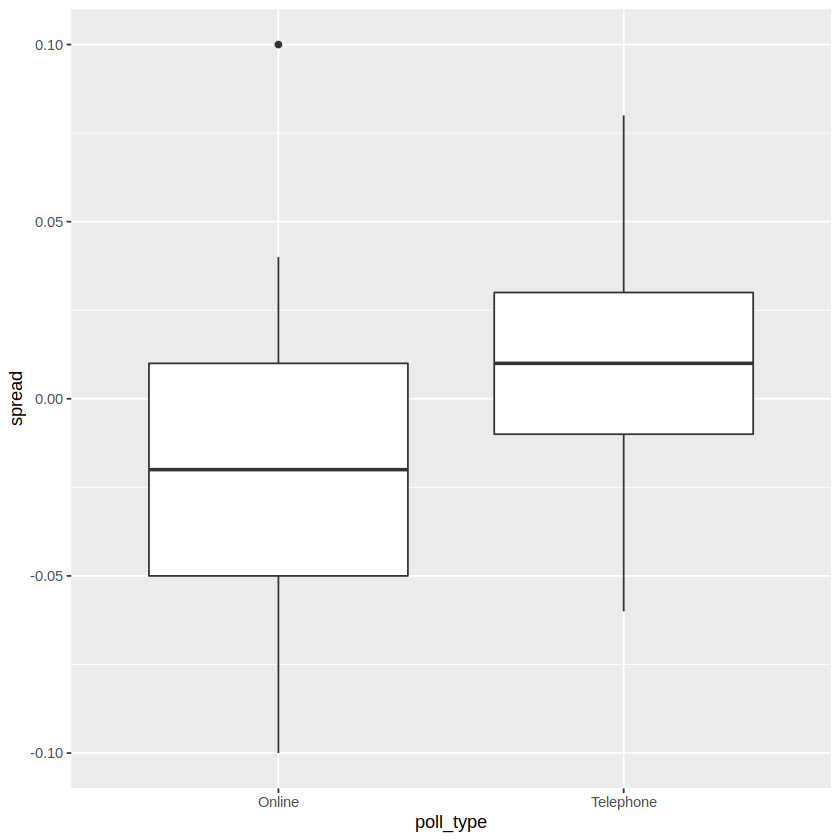

In [28]:
june_polls %>%
    group_by( poll_type ) %>%
    ggplot( aes(poll_type,spread) ) + geom_boxplot()

Which of the following are TRUE?

* A. Online polls tend to show support for *Remain*, *spread > 0*.
* B. Telephone polls tend to show support *Remain*, *spread > 0*.
* C. Telephone polls tend to show higher support for *Remain* than online polls, higher *spread*.
* D. Online polls have a larger *interquartile range* (*IRQ*) for the *spread* than telephone polls, indicating that they are more variable.
* E. Poll type introduces a bias that affects poll results.

**Solutions**

The solutions are: *B, C, D, and E*.

A boxplot is a standarized way of displaying the distribution of a data set based on its five-number summary of data points:

* the **minimum**
* **first quantile** (*Q1*)
* **median**
* **third quantile** (*Q3*)
* the **maximum**.

Here's an example:

<center><img src="images/boxplot.png" /></center>

Boxplot can tell you about:

* your outliers and what their values are.
* if your data is symmetrical
* how tightly your data is grouped
* how your data is skewed.

* *Median (Q2/50th percentile)*: the middle value of the data set.
* *First Quartile (Q1/25th percentile)*: the middle number between the smallest number (not the *minimum*) and the median of the data set.
* *Third Quartile (Q3/75th percentile)*: the middle value between the median and the highest value, not the *maximum*, of the dataset.
* *Interquartile Range (IQR)*: 25th to the 75th percentile.
* *Whiskers*, shown in blue. The left whisker shows the minimum data value and its variability in compararison to the *IQR*. The right whisker shows the maximum data value and its variability in comparison with *IRQ*. The whiskers also help present *outlier values* in comparison to the rest of the data.
* *Outliers*, shown as green circles. *Outliers* sit on the outside of whisker lines.
* *Minimum*: Q1 - 1.5*IQR.
* *Maximum*: Q3 + 1.5*IQR.

The image is a comparison of a *box-and-whisker plot* of a neraly normal distribution and the *probaility density function (PDF)*.

<center><img src="images/boxplot_norm.png" /></center>




#### Question 7: Calculate the confience intervals of the spread combined across all polls in *june_polls*, grouping by poll type.

To determine the *standard error of the spread (sd)*, we will need to double the *standard error of the estimate*. Use this code to begin our anlysis:

In [29]:
combined_by_type <- june_polls %>%
                    group_by( poll_type ) %>%
                    summarize( 
                        N = sum(samplesize),
                        spread = sum(spread*samplesize)/N,
                        p_hat = (spread + 1)/2
                    ) %>%
                    ungroup()

What is the lower bound of the 95\% confidence interval for online voters?

In [30]:
combined_by_type <- june_polls %>%
                    group_by( poll_type ) %>%
                    summarize( 
                        N = sum(samplesize),
                        spread = sum(spread*samplesize)/N,
                        p_hat = (spread + 1)/2,
                        se_spread = 2*sqrt(p_hat*(1-p_hat)/N),
                        spread_lower = spread - qnorm(.975)*se_spread,
                        spread_upper = spread + qnorm(.975)*se_spread
                    ) %>%
                    ungroup() 

spread_l <- redondeo( combined_by_type %>%
                        filter( poll_type=="Online" ) %>%
                        pull( spread_lower ), 4 )
print( paste( "The lower bound of the 95%: ", spread_l ) )

[1] "The lower bound of the 95%:  -0.0165"


In [31]:
spread_u <- redondeo( combined_by_type %>%
                        filter( poll_type=="Online" ) %>%
                        pull( spread_upper ), 4 )
print( paste( "The lower bound of the 95%: ", spread_u ) )

[1] "The lower bound of the 95%:  0.0017"



#### Question 8: Interpret the confidence intervals for the combined spreads for each poll type calculated in the previous problem.

Which of the follogin are TRUE about the confidence intervals of the combinae spreads for different poll types?. Select ALL correct answers.

* A. Neither set of combined polls makes a prediction about the outcom of the Brexit referendum, a prediction is possible if a confidence interval does not cover 0.
* B. The confidence interval for online polls is larger than the confidence interval for telephone polls.
* C. The confidence interval for telephone polls is covers more positive values.
* D. The condficence intervals for different poll types do not overlap.
* E. Neither confidence interval covers the true value of *d=-0.038*.

**Solutions** 

the solutions are: *A, C, and E*.



### Brexit poll analysis - Part 3



#### Question 9: Define *brexit_hit*, with the following code, which computes the confience intervals for all Brexit polls in 2016, and then calculates whether the confidence interval covers the actual value of the spread *d = -0.038*.

In [33]:
brexit_hit <- brexit_polls %>%
                mutate( 
                    p_hat = (spread + 1)/2,
                    se_spread = 2*sqrt(p_hat*(1-p_hat)/samplesize),
                    spread_lower = spread - qnorm(.975)*se_spread,
                    spread_upper = spread + qnorm(.975)*se_spread,
                    hit = spread_lower < d & spread_upper > d
                    ) %>%
                select( poll_type, hit )
head( brexit_hit )

,poll_type,hit
,<fct>,<lgl>
1,Online,FALSE
2,Online,FALSE
3,Online,FALSE
4,Telephone,FALSE
5,Online,TRUE
6,Telephone,FALSE


Use *brexit_hit* tom make a two-by-two table of poll type an hist status. Then use the *chisq.test* function to perform a *chi-squared test* to determine whether the difference in hit rate is significant.

What is the *p-value* of the *chi-squared test* comparing the hit rate of online and telephone polls?

In [36]:
brexit_chisq <- table( brexit_hit$poll_type, brexit_hit$hit )
redondeo( chisq.test( brexit_chisq )$p.value, 5 )

[1] "0.00101"

Determine which poll type has a higher probability of producing a confidence interval that covers the correct value of the spread. Also determine whether this difference is statistically significant at a *p-value* cutoff of **0.05**.

In [42]:
hit_rate <- brexit_hit %>%
                group_by( poll_type ) %>%
                summarize( avg=mean(hit) ) %>%
                ungroup()

hit_rate$avg[hit_rate$poll_type == "Online"] > hit_rate$avg[hit_rate$poll_type == "Telephone"]

chisq.test( brexit_chisq )$p.value < 0.05

[1] TRUE

[1] TRUE

Which of the following is true?

* A. Online polls are more likely to cover the correct value of the spread and this difference is statistically significant.
* B. Online polls are more likely to cover the correct value of the spread, but this difference is not statistically significant.
* C. Telephone polls are more likely to cover the correct value of the spread, and this difference is statistically significant.
* D. Telephone polls are more likely to cover the correct value of the spread, but this difference is not statistically significant.

**Solution**: The answer **A**.


#### Question 10: Use the two-by-two table constructed in the previous exercise to calculate the *odds ratio* between the *hit rate* of online and telephone polls to determine the magnitude of the difference in performance between the poll types.

Calculate the *odds* that an online poll generates a confidence interval that covers the actual value of the spread.

In [45]:
brexit_chisq <- table( brexit_hit$poll_type, brexit_hit$hit )

chisq_df <- as.data.frame( brexit_chisq )

online_true <- chisq_df$Freq[chisq_df$Var1 == "Online" & chisq_df$Var2 == "TRUE"]
online_false <- chisq_df$Freq[chisq_df$Var1 == "Online" & chisq_df$Var2 == "FALSE"]

online_odds <- online_true/online_false 
redondeo( online_odds, 1 )

[1] "1.3"

Calculate the *odds* that a telephone poll generates a confidence interval that covers the actual value of the spread.

In [46]:
phone_true <- chisq_df$Freq[chisq_df$Var1 == "Telephone" & chisq_df$Var2 == "TRUE"]
phone_false <- chisq_df$Freq[chisq_df$Var1 == "Telephone" & chisq_df$Var2 == "FALSE"]

phone_odds <- phone_true/phone_false 
redondeo( phone_odds, 1 )

[1] "0.3"

Calculate the *odds ratio* to determine how many times larger the odss are for online polls to hit versus telephone polls.

In [48]:
redondeo( online_odds/phone_odds, 2 )

[1] "4.15"


#### Question 11: Use the *brexit_polls* to make a plot of the *spread* over time *enddate* colored by *poll_type*.

Use *geom_smooth* function with *method="loess"* to plot smooth curves with a span of **0.4**. Include the individual data points colored by poll type. Add a horizontal line indicating the final value of *d = -0.038*.

`geom_smooth()` using formula 'y ~ x'



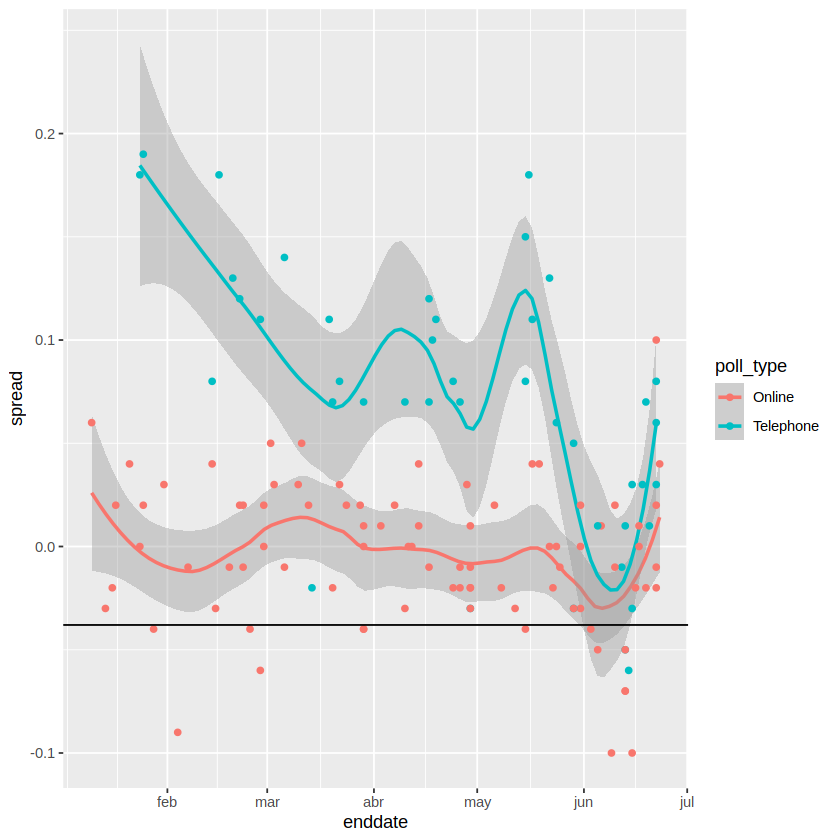

In [49]:
brexit_polls %>%
    ggplot( aes(enddate, spread, color=poll_type) ) + 
    geom_smooth( method="loess", span=0.4 ) + 
    geom_point() +
    geom_hline( aes(yintercept=-0.038) )


#### Question 12: Use the following code to create the object **brexit_long**, which has a column *vote* containing the three possible votes on a Brexit poll: *remain, leave, undecided*, and a column *proportion* containing the raw proportion choosing that vote option in the given poll.

In [51]:
brexit_long <- brexit_polls %>%
                gather( vote, proportion, "remain":"undecided" ) %>%
                mutate( vote=factor(vote) )
brexit_long

startdate,enddate,pollster,poll_type,samplesize,spread,x_hat,vote,proportion
<date>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2016-06-23,2016-06-23,YouGov,Online,4772,0.04,0.520,remain,0.52
2016-06-22,2016-06-22,Populus,Online,4700,0.10,0.550,remain,0.55
2016-06-20,2016-06-22,YouGov,Online,3766,0.02,0.510,remain,0.51
2016-06-20,2016-06-22,Ipsos MORI,Telephone,1592,0.03,0.515,remain,0.49
2016-06-20,2016-06-22,Opinium,Online,3011,-0.01,0.495,remain,0.44
2016-06-17,2016-06-22,ComRes,Telephone,1032,0.08,0.540,remain,0.54
2016-06-17,2016-06-22,ComRes,Telephone,1032,0.06,0.530,remain,0.48
2016-06-16,2016-06-22,TNS,Online,2320,-0.02,0.490,remain,0.41
2016-06-20,2016-06-20,Survation/IG Group,Telephone,1003,0.01,0.505,remain,0.45


Make a graph of proportion overe time colored by vote. Add a smooth trendline with *geom_smooth* and *method="loess" with a span of **0.3**.

`geom_smooth()` using formula 'y ~ x'



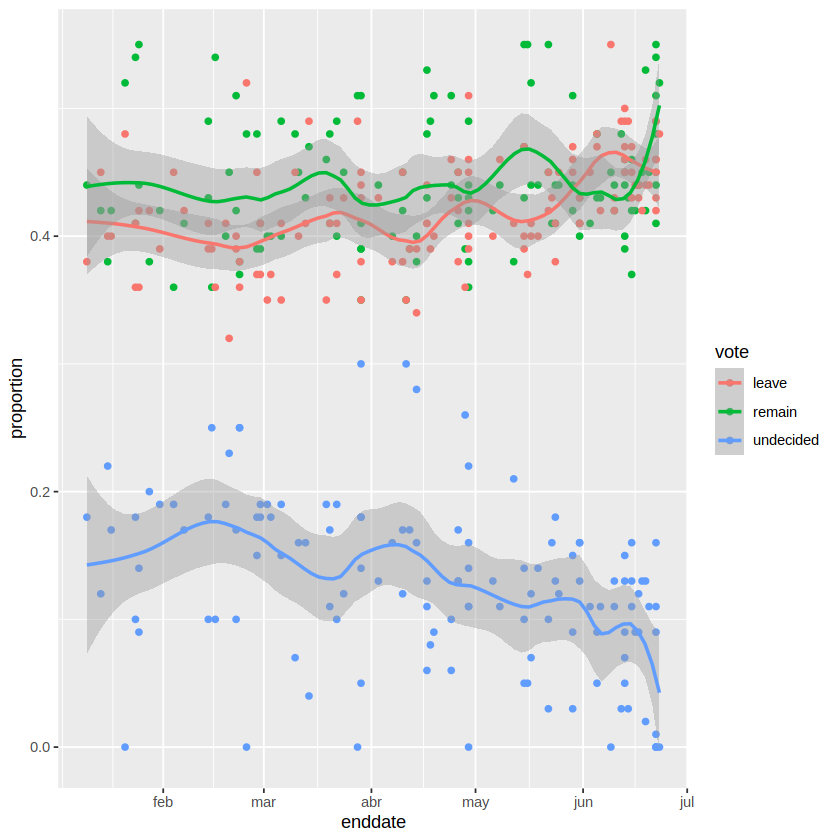

In [53]:
brexit_long %>%
    ggplot( aes(enddate, proportion, col=vote) ) +
    geom_point() +
    geom_smooth( method="loess", span=0.3 )

Which of the following are TRUE?

* A. The percentage of undecided voters declines over time but is still around 10\% throughout June.
* B. Over most of the date range, the confidence bands for *Leave* and *Remain* overlap.
* C. Over most of the date range, the confidence bands for *Leave* and *Remain* are below 50\%
* D. In the first half of June, *Leave* was polling higher than *Remain*, although this difference was within the confidence intervals.
* E. At the time of the election in late June, the percentage voting *Leave" is trending upwards.

**Solution** Answers: *A,B,C, and D*.